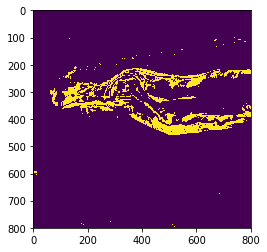

In [1]:
import cv2
import numpy as np
import dippykit as dip
import matplotlib.pyplot as plt
import pandas as pd


#PICKING AN IMAGE
im_original = cv2.imread("images/UW_400.png")
#im_original = cv2.imread("images/underwater-15.png")

#im_original = cv2.imread("images/24Zimmer-Refer-articleLarge.jpg")

#INITIAL EXPLORATION OF THE PICTURE

#Select pixels that are similar in color to skin
im_skin = np.copy(im_original)
for i in range(np.shape(im_original)[0]):
    for j in range(np.shape(im_original)[1]):
        #if im_original[i,j][2] < 60:
        if im_original[i,j][2] < 60 or im_original[i,j][0] > 200: #Zones mostly reddish, not blueish
            im_skin[i,j]=[0,0,0]

cv2.imwrite("temp_images/skin_color.png", im_skin)

#Select zones with high luminosity (probably zones iluminated by refracted light)
im_gray = cv2.cvtColor(im_original, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(im_gray,180,255,cv2.THRESH_BINARY)

cv2.imwrite("temp_images/binary.png", th1)

#Saliency detection
# initialize OpenCV's static fine grained saliency detector and compute the saliency map
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(im_original)

# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map

threshMap = cv2.threshold(saliencyMap*255, 80, 255,cv2.THRESH_BINARY)[1]

cv2.imwrite("temp_images/saliency.png", saliencyMap*255)


%matplotlib inline
dip.imshow(threshMap)
dip.show()




In [2]:
#Calculate average skin color           
aux_skin_value = [0,0,0]
num_pixels_for_skin = 0

for i in range(np.shape(im_skin)[0]):
    for j in range(np.shape(im_skin)[1]):
        aux_skin_value = aux_skin_value + im_skin[i,j]
        if (im_skin[i,j] > [0, 0, 0]).all():
            num_pixels_for_skin = num_pixels_for_skin + 1
            
avg_skin_color = aux_skin_value/num_pixels_for_skin

print(avg_skin_color)


[134.01728815 146.86209597 137.48590204]


In [3]:
#Make an histogram with the color of the pixels
im_skin_vec = np.reshape(im_skin, (np.shape(im_skin)[0]*np.shape(im_skin)[1],3))
df = pd.DataFrame(im_skin_vec, columns=['R', 'G', 'B']) 

df['Intensity'] = df.apply(lambda row: (row.R + row.G + row.B)/3, axis = 1) 

df_color = df[df['Intensity'] > 0]

df_color

/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


R    G   B  Intensity
84746   195  145  62  48.666667
88752   190  134  72  46.666667
88755   197  152  93  62.000000
88756   186  135  77  47.333333
88757   179  125  60  36.000000
91865   195  124  60  41.000000
91866   200  127  69  46.666667
93573   196  150  84  58.000000
94371   186  123  62  38.333333
95973   187  120  64  38.333333
98338   185  113  63  35.000000
130917  189  128  61  40.666667
131719  197  138  71  50.000000
134824  196  143  75  52.666667
172151  194  167  74  59.666667
172153  170  139  67  40.000000
172952  174  149  72  46.333333
172953  184  163  88  59.666667
172954  163  142  65  38.000000
172955  179  160  81  54.666667
173752  193  167  90  64.666667
174551  177  153  85  53.000000
175350  167  141  73  41.666667
175357  189  155  64  50.666667
175564  185  140  61  43.333333
175565  179  137  64  41.333333
175566  172  136  68  40.000000
175567  187  150  88  56.333333
175889  175  145  74  46.000000
175890  190  163  93  63.333333
...     ...  ...  ..        ...
635674  173  171  67  51.666667
635675  173  169  66  50.666667
635718  186  193  66  63.000000
635719  200  206  77  75.666667
635720  179  186  60  56.333333
635756  186  189  65  61.333333
636341  191  196  66  65.666667
636343  189  192  63  62.666667
636519  191  198  70  67.666667
636521  191  198  70  67.666667
636557  179  184  61  56.000000
637141  193  201  61  66.333333
637290  171  162  62  46.333333
637320  177  186  61  56.000000
637321  193  202  73  70.666667
637941  195  202  60  67.000000
638091  171  162  63  46.666667
638193  170  158  65  45.666667
638752  193  189  62  62.666667
638753  194  189  62  63.000000
638843  184  183  64  58.333333
638994  171  159  66  46.666667
639641  191  191  66  64.000000
639642  185  187  62  59.333333
639643  183  186  62  58.333333
639645  197  201  74  72.000000
639646  187  192  64  62.333333
639647  196  201  70  70.333333
639651  195  194  65  66.000000
639736  175  172  62  51.000000

[51958 rows x 4 columns]

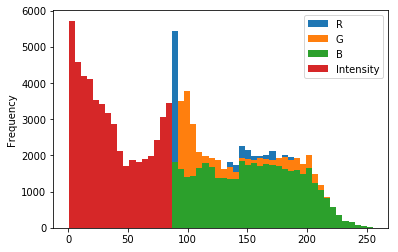

In [4]:
%matplotlib inline
df_color.plot.hist(bins = 50)

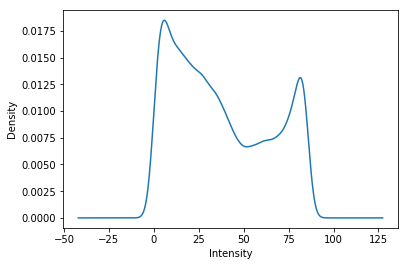

In [29]:
%matplotlib inline
plot = df_color.Intensity.plot(kind='kde')
plot.set_xlabel("Intensity")
plot.set_ylabel("Density")
plt.savefig('Intensity.png')

In [6]:
df_brigth_color = df[(df['Intensity'] > 40) & (df['Intensity'] < 60)]

sum_rgb = df_brigth_color.sum(axis=0)
average_rgb = sum_rgb/len(df_brigth_color)

c = [1,1,1] #For making the color brighter

avg_skin_color = (average_rgb[0]*c[0], average_rgb[1]*c[1], average_rgb[2]*c[2]) 
print(avg_skin_color)

(139.845987862441, 153.1305461901551, 144.27228590694537)


In [20]:
#Interpolation 

im_skin_interp = np.copy(im_skin)

#Step 1: Go over all the pixels of "Zones similar to skin color" using a square of 4 pixels

for i in range(np.shape(im_skin)[0] - 1):
    for j in range(np.shape(im_skin)[1] -1):
        
        pixel_upper_left = im_skin[i,j]
        pixel_upper_rigth = im_skin[i,j+1]
        pixel_bottom_left = im_skin[i+1 ,j]
        pixel_bottom_rigth = im_skin[i+1,j+1]
        
        pixel_array = [pixel_upper_left, pixel_upper_rigth, pixel_bottom_left, pixel_bottom_rigth]
        
        remove_pixel = [False, False, False, False]
        
                
        #Step 2: Check if at least one of the 4 pixels correspond to the body (i.e. it isn´t black)
        
        if (pixel_upper_left > ([0, 0, 0])).all() or (pixel_upper_rigth > ([0,0,0])).all or (pixel_bottom_left > ([0,0,0])).all() or (pixel_bottom_rigth > ([0,0,0])).all():
            
            #Step 3: Check if any of those pixels are marked as pixels to remove (i.e. they are white on image after binary threshold)
            if th1[i,j] == 255: 
                remove_pixel[0] = True
            if th1[i,j+1] == 255: 
                remove_pixel[1] = True
            if th1[i+1,j] == 255: 
                remove_pixel[2] = True
            if th1[i+1,j+1] == 255: 
                remove_pixel[3] = True
            
            #We need to remove the targeted pixels and substitute its value with the average of the surrounding pixels that are part of the body
            
            aux_pixel_value = [0,0,0]
            num_pixels_for_average = 0
            
            for p in range(np.shape(pixel_array)[0]):
                #if remove_pixel[p] == False and (pixel_array[p] > ([0, 0, 0])).all(): 
                if remove_pixel[p] == False: #Using this condition, the image has less false skin-coloured pixels
                    aux_pixel_value = aux_pixel_value + pixel_array[p]
                    num_pixels_for_average = num_pixels_for_average + 1
                    
            if num_pixels_for_average > 0: 
                avg_pixel_value = aux_pixel_value/num_pixels_for_average
            elif num_pixels_for_average == 0:
                avg_pixel_value = avg_skin_color
                
            
            for p in range(np.shape(pixel_array)[0]):
                if remove_pixel[p] == True: 
                    pixel_array[p] =  avg_pixel_value
                    
            if (im_skin[i,j] == [0,0,0]).all():
                im_skin_interp[i,j] = pixel_array[0]
            if (im_skin[i,j+1] == [0,0,0]).all():
                im_skin_interp[i,j+1] = pixel_array[1]
            if (im_skin[i+1,j] == [0,0,0]).all():
                im_skin_interp[i+1 ,j] = pixel_array[2]
            if (im_skin[i+1,j+1] == [0,0,0]).all():
                im_skin_interp[i+1,j+1] = pixel_array[3]
                
                
            """
            im_skin_interp[i,j] = pixel_array[0]
            im_skin_interp[i,j+1] = pixel_array[1]
            im_skin_interp[i+1 ,j] = pixel_array[2]
            im_skin_interp[i+1,j+1] = pixel_array[3]
            """


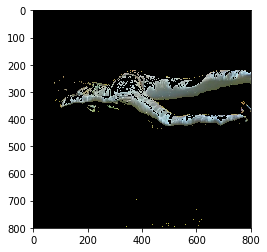

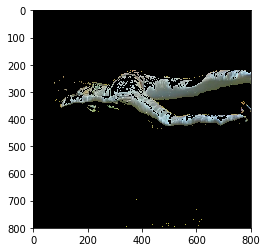

True

In [21]:
#Display only skin-coloured pixels on original image and interpolated skin 

%matplotlib inline
dip.imshow(im_skin)
dip.show()

%matplotlib inline
dip.imshow(im_skin_interp)
dip.show()

cv2.imwrite("temp_images/skin_color_interpolated.png", im_skin_interp)


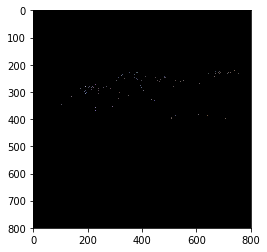

True

In [24]:
%matplotlib inline
dip.imshow(im_skin - im_skin_interp)
dip.show()


cv2.imwrite("temp_images/difference.png", im_skin - im_skin_interp)

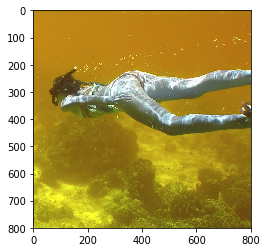

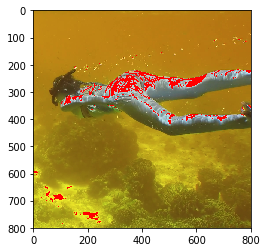

True

In [19]:
#Copying interpolated skin onto the original picture

im_res = np.copy(im_original)

%matplotlib inline
dip.imshow(im_original)
dip.show()

for i in range(np.shape(im_res)[0]):
    for j in range(np.shape(im_res)[1]):
        if (im_skin_interp[i,j] > [0, 0, 0]).any():
            im_res[i,j] = im_skin_interp[i,j]
            
%matplotlib inline
dip.imshow(im_res)
dip.show()

cv2.imwrite("temp_images/result.png", im_res)

In [10]:
#===================================================================================
#===================================================================================
#===================================================================================
#===================================================================================
#===================================================================================
#===================================================================================
#===================================================================================
#===================================================================================
#===================================================================================
#===================================================================================


In [11]:
#Interpolation 

im_skin_interp = np.copy(im_skin)

#Step 1: Go over all the pixels of "Zones similar to skin color" using a square of 4 pixels

for i in range(np.shape(im_skin)[0] - 1):
    for j in range(np.shape(im_skin)[1] -1):
        
        pixel_upper_left = im_skin[i,j]
        pixel_upper_rigth = im_skin[i,j+1]
        pixel_bottom_left = im_skin[i+1 ,j]
        pixel_bottom_rigth = im_skin[i+1,j+1]
        
        print(pixel_upper_left) #To know the value of the pixel   
        print("Position" + str(i), str(j))#To know the position of the pixel 
        
        pixel_array = [pixel_upper_left, pixel_upper_rigth, pixel_bottom_left, pixel_bottom_rigth]
        
        remove_pixel = [False, False, False, False]
        
                
        #Step 2: Check if all 4 pixels correspond to the body (i.e. none of them is black)
        
        if (pixel_upper_left > ([0, 0, 0])).all() and (pixel_upper_rigth > ([0,0,0])).all and (pixel_bottom_left > ([0,0,0])).all() and (pixel_bottom_rigth > ([0,0,0])).all():
            
            #Step 3: Check if any of those pixels are marked as pixels to remove (i.e. they are white on image after binary threshold)
            if th1[i,j] == 255: 
                remove_pixel[0] = True
            if th1[i,j+1] == 255: 
                remove_pixel[1] = True
            if th1[i+1,j] == 255: 
                remove_pixel[2] = True
            if th1[i+1,j+1] == 255: 
                remove_pixel[3] = True
           
            print(remove_pixel)
            
            pixel_value = [0,0,0]
            num_true = 0
            
            for p in range(np.shape(pixel_array)[0]):
                if remove_pixel[p] == False: 
                    pixel_value = pixel_value + pixel_array[p]
                    num_true = num_true + 1
                    
            avg_pixel_value = pixel_value/num_true
            
            for p in range(np.shape(pixel_array)[0]):
                if remove_pixel[p] == True: 
                    pixel_array[p] =  [255, 0, 0]#vg_pixel_value
            
            im_skin_interp[i,j] = pixel_array[0]
            im_skin_interp[i,j+1] = pixel_array[1]
            im_skin_interp[i+1 ,j] = pixel_array[2]
            im_skin_interp[i+1,j+1] = pixel_array[3]
            
#cv2.imshow("Skin Interpolated", im_skin_interp)      


[0 0 0]
Position0 0
[0 0 0]
Position0 1
[0 0 0]
Position0 2
[0 0 0]
Position0 3
[0 0 0]
Position0 4
[0 0 0]
Position0 5
[0 0 0]
Position0 6
[0 0 0]
Position0 7
[0 0 0]
Position0 8
[0 0 0]
Position0 9
[0 0 0]
Position0 10
[0 0 0]
Position0 11
[0 0 0]
Position0 12
[0 0 0]
Position0 13
[0 0 0]
Position0 14
[0 0 0]
Position0 15
[0 0 0]
Position0 16
[0 0 0]
Position0 17
[0 0 0]
Position0 18
[0 0 0]
Position0 19
[0 0 0]
Position0 20
[0 0 0]
Position0 21
[0 0 0]
Position0 22
[0 0 0]
Position0 23
[0 0 0]
Position0 24
[0 0 0]
Position0 25
[0 0 0]
Position0 26
[0 0 0]
Position0 27
[0 0 0]
Position0 28
[0 0 0]
Position0 29
[0 0 0]
Position0 30
[0 0 0]
Position0 31
[0 0 0]
Position0 32
[0 0 0]
Position0 33
[0 0 0]
Position0 34
[0 0 0]
Position0 35
[0 0 0]
Position0 36
[0 0 0]
Position0 37
[0 0 0]
Position0 38
[0 0 0]
Position0 39
[0 0 0]
Position0 40
[0 0 0]
Position0 41
[0 0 0]
Position0 42
[0 0 0]
Position0 43
[0 0 0]
Position0 44
[0 0 0]
Position0 45
[0 0 0]
Position0 46
[0 0 0]
Position0 47
[0

[0 0 0]
Position0 684
[0 0 0]
Position0 685
[0 0 0]
Position0 686
[0 0 0]
Position0 687
[0 0 0]
Position0 688
[0 0 0]
Position0 689
[0 0 0]
Position0 690
[0 0 0]
Position0 691
[0 0 0]
Position0 692
[0 0 0]
Position0 693
[0 0 0]
Position0 694
[0 0 0]
Position0 695
[0 0 0]
Position0 696
[0 0 0]
Position0 697
[0 0 0]
Position0 698
[0 0 0]
Position0 699
[0 0 0]
Position0 700
[0 0 0]
Position0 701
[0 0 0]
Position0 702
[0 0 0]
Position0 703
[0 0 0]
Position0 704
[0 0 0]
Position0 705
[0 0 0]
Position0 706
[0 0 0]
Position0 707
[0 0 0]
Position0 708
[0 0 0]
Position0 709
[0 0 0]
Position0 710
[0 0 0]
Position0 711
[0 0 0]
Position0 712
[0 0 0]
Position0 713
[0 0 0]
Position0 714
[0 0 0]
Position0 715
[0 0 0]
Position0 716
[0 0 0]
Position0 717
[0 0 0]
Position0 718
[0 0 0]
Position0 719
[0 0 0]
Position0 720
[0 0 0]
Position0 721
[0 0 0]
Position0 722
[0 0 0]
Position0 723
[0 0 0]
Position0 724
[0 0 0]
Position0 725
[0 0 0]
Position0 726
[0 0 0]
Position0 727
[0 0 0]
Position0 728
[0 0 0]
Po

Position1 499
[0 0 0]
Position1 500
[0 0 0]
Position1 501
[0 0 0]
Position1 502
[0 0 0]
Position1 503
[0 0 0]
Position1 504
[0 0 0]
Position1 505
[0 0 0]
Position1 506
[0 0 0]
Position1 507
[0 0 0]
Position1 508
[0 0 0]
Position1 509
[0 0 0]
Position1 510
[0 0 0]
Position1 511
[0 0 0]
Position1 512
[0 0 0]
Position1 513
[0 0 0]
Position1 514
[0 0 0]
Position1 515
[0 0 0]
Position1 516
[0 0 0]
Position1 517
[0 0 0]
Position1 518
[0 0 0]
Position1 519
[0 0 0]
Position1 520
[0 0 0]
Position1 521
[0 0 0]
Position1 522
[0 0 0]
Position1 523
[0 0 0]
Position1 524
[0 0 0]
Position1 525
[0 0 0]
Position1 526
[0 0 0]
Position1 527
[0 0 0]
Position1 528
[0 0 0]
Position1 529
[0 0 0]
Position1 530
[0 0 0]
Position1 531
[0 0 0]
Position1 532
[0 0 0]
Position1 533
[0 0 0]
Position1 534
[0 0 0]
Position1 535
[0 0 0]
Position1 536
[0 0 0]
Position1 537
[0 0 0]
Position1 538
[0 0 0]
Position1 539
[0 0 0]
Position1 540
[0 0 0]
Position1 541
[0 0 0]
Position1 542
[0 0 0]
Position1 543
[0 0 0]
Position1 

[0 0 0]
Position2 440
[0 0 0]
Position2 441
[0 0 0]
Position2 442
[0 0 0]
Position2 443
[0 0 0]
Position2 444
[0 0 0]
Position2 445
[0 0 0]
Position2 446
[0 0 0]
Position2 447
[0 0 0]
Position2 448
[0 0 0]
Position2 449
[0 0 0]
Position2 450
[0 0 0]
Position2 451
[0 0 0]
Position2 452
[0 0 0]
Position2 453
[0 0 0]
Position2 454
[0 0 0]
Position2 455
[0 0 0]
Position2 456
[0 0 0]
Position2 457
[0 0 0]
Position2 458
[0 0 0]
Position2 459
[0 0 0]
Position2 460
[0 0 0]
Position2 461
[0 0 0]
Position2 462
[0 0 0]
Position2 463
[0 0 0]
Position2 464
[0 0 0]
Position2 465
[0 0 0]
Position2 466
[0 0 0]
Position2 467
[0 0 0]
Position2 468
[0 0 0]
Position2 469
[0 0 0]
Position2 470
[0 0 0]
Position2 471
[0 0 0]
Position2 472
[0 0 0]
Position2 473
[0 0 0]
Position2 474
[0 0 0]
Position2 475
[0 0 0]
Position2 476
[0 0 0]
Position2 477
[0 0 0]
Position2 478
[0 0 0]
Position2 479
[0 0 0]
Position2 480
[0 0 0]
Position2 481
[0 0 0]
Position2 482
[0 0 0]
Position2 483
[0 0 0]
Position2 484
[0 0 0]
Po

[0 0 0]
Position3 447
[0 0 0]
Position3 448
[0 0 0]
Position3 449
[0 0 0]
Position3 450
[0 0 0]
Position3 451
[0 0 0]
Position3 452
[0 0 0]
Position3 453
[0 0 0]
Position3 454
[0 0 0]
Position3 455
[0 0 0]
Position3 456
[0 0 0]
Position3 457
[0 0 0]
Position3 458
[0 0 0]
Position3 459
[0 0 0]
Position3 460
[0 0 0]
Position3 461
[0 0 0]
Position3 462
[0 0 0]
Position3 463
[0 0 0]
Position3 464
[0 0 0]
Position3 465
[0 0 0]
Position3 466
[0 0 0]
Position3 467
[0 0 0]
Position3 468
[0 0 0]
Position3 469
[0 0 0]
Position3 470
[0 0 0]
Position3 471
[0 0 0]
Position3 472
[0 0 0]
Position3 473
[0 0 0]
Position3 474
[0 0 0]
Position3 475
[0 0 0]
Position3 476
[0 0 0]
Position3 477
[0 0 0]
Position3 478
[0 0 0]
Position3 479
[0 0 0]
Position3 480
[0 0 0]
Position3 481
[0 0 0]
Position3 482
[0 0 0]
Position3 483
[0 0 0]
Position3 484
[0 0 0]
Position3 485
[0 0 0]
Position3 486
[0 0 0]
Position3 487
[0 0 0]
Position3 488
[0 0 0]
Position3 489
[0 0 0]
Position3 490
[0 0 0]
Position3 491
[0 0 0]
Po

[0 0 0]
Position4 335
[0 0 0]
Position4 336
[0 0 0]
Position4 337
[0 0 0]
Position4 338
[0 0 0]
Position4 339
[0 0 0]
Position4 340
[0 0 0]
Position4 341
[0 0 0]
Position4 342
[0 0 0]
Position4 343
[0 0 0]
Position4 344
[0 0 0]
Position4 345
[0 0 0]
Position4 346
[0 0 0]
Position4 347
[0 0 0]
Position4 348
[0 0 0]
Position4 349
[0 0 0]
Position4 350
[0 0 0]
Position4 351
[0 0 0]
Position4 352
[0 0 0]
Position4 353
[0 0 0]
Position4 354
[0 0 0]
Position4 355
[0 0 0]
Position4 356
[0 0 0]
Position4 357
[0 0 0]
Position4 358
[0 0 0]
Position4 359
[0 0 0]
Position4 360
[0 0 0]
Position4 361
[0 0 0]
Position4 362
[0 0 0]
Position4 363
[0 0 0]
Position4 364
[0 0 0]
Position4 365
[0 0 0]
Position4 366
[0 0 0]
Position4 367
[0 0 0]
Position4 368
[0 0 0]
Position4 369
[0 0 0]
Position4 370
[0 0 0]
Position4 371
[0 0 0]
Position4 372
[0 0 0]
Position4 373
[0 0 0]
Position4 374
[0 0 0]
Position4 375
[0 0 0]
Position4 376
[0 0 0]
Position4 377
[0 0 0]
Position4 378
[0 0 0]
Position4 379
[0 0 0]
Po

[0 0 0]
Position5 258
[0 0 0]
Position5 259
[0 0 0]
Position5 260
[0 0 0]
Position5 261
[0 0 0]
Position5 262
[0 0 0]
Position5 263
[0 0 0]
Position5 264
[0 0 0]
Position5 265
[0 0 0]
Position5 266
[0 0 0]
Position5 267
[0 0 0]
Position5 268
[0 0 0]
Position5 269
[0 0 0]
Position5 270
[0 0 0]
Position5 271
[0 0 0]
Position5 272
[0 0 0]
Position5 273
[0 0 0]
Position5 274
[0 0 0]
Position5 275
[0 0 0]
Position5 276
[0 0 0]
Position5 277
[0 0 0]
Position5 278
[0 0 0]
Position5 279
[0 0 0]
Position5 280
[0 0 0]
Position5 281
[0 0 0]
Position5 282
[0 0 0]
Position5 283
[0 0 0]
Position5 284
[0 0 0]
Position5 285
[0 0 0]
Position5 286
[0 0 0]
Position5 287
[0 0 0]
Position5 288
[0 0 0]
Position5 289
[0 0 0]
Position5 290
[0 0 0]
Position5 291
[0 0 0]
Position5 292
[0 0 0]
Position5 293
[0 0 0]
Position5 294
[0 0 0]
Position5 295
[0 0 0]
Position5 296
[0 0 0]
Position5 297
[0 0 0]
Position5 298
[0 0 0]
Position5 299
[0 0 0]
Position5 300
[0 0 0]
Position5 301
[0 0 0]
Position5 302
[0 0 0]
Po

Position6 113
[0 0 0]
Position6 114
[0 0 0]
Position6 115
[0 0 0]
Position6 116
[0 0 0]
Position6 117
[0 0 0]
Position6 118
[0 0 0]
Position6 119
[0 0 0]
Position6 120
[0 0 0]
Position6 121
[0 0 0]
Position6 122
[0 0 0]
Position6 123
[0 0 0]
Position6 124
[0 0 0]
Position6 125
[0 0 0]
Position6 126
[0 0 0]
Position6 127
[0 0 0]
Position6 128
[0 0 0]
Position6 129
[0 0 0]
Position6 130
[0 0 0]
Position6 131
[0 0 0]
Position6 132
[0 0 0]
Position6 133
[0 0 0]
Position6 134
[0 0 0]
Position6 135
[0 0 0]
Position6 136
[0 0 0]
Position6 137
[0 0 0]
Position6 138
[0 0 0]
Position6 139
[0 0 0]
Position6 140
[0 0 0]
Position6 141
[0 0 0]
Position6 142
[0 0 0]
Position6 143
[0 0 0]
Position6 144
[0 0 0]
Position6 145
[0 0 0]
Position6 146
[0 0 0]
Position6 147
[0 0 0]
Position6 148
[0 0 0]
Position6 149
[0 0 0]
Position6 150
[0 0 0]
Position6 151
[0 0 0]
Position6 152
[0 0 0]
Position6 153
[0 0 0]
Position6 154
[0 0 0]
Position6 155
[0 0 0]
Position6 156
[0 0 0]
Position6 157
[0 0 0]
Position6 

[0 0 0]
Position7 31
[0 0 0]
Position7 32
[0 0 0]
Position7 33
[0 0 0]
Position7 34
[0 0 0]
Position7 35
[0 0 0]
Position7 36
[0 0 0]
Position7 37
[0 0 0]
Position7 38
[0 0 0]
Position7 39
[0 0 0]
Position7 40
[0 0 0]
Position7 41
[0 0 0]
Position7 42
[0 0 0]
Position7 43
[0 0 0]
Position7 44
[0 0 0]
Position7 45
[0 0 0]
Position7 46
[0 0 0]
Position7 47
[0 0 0]
Position7 48
[0 0 0]
Position7 49
[0 0 0]
Position7 50
[0 0 0]
Position7 51
[0 0 0]
Position7 52
[0 0 0]
Position7 53
[0 0 0]
Position7 54
[0 0 0]
Position7 55
[0 0 0]
Position7 56
[0 0 0]
Position7 57
[0 0 0]
Position7 58
[0 0 0]
Position7 59
[0 0 0]
Position7 60
[0 0 0]
Position7 61
[0 0 0]
Position7 62
[0 0 0]
Position7 63
[0 0 0]
Position7 64
[0 0 0]
Position7 65
[0 0 0]
Position7 66
[0 0 0]
Position7 67
[0 0 0]
Position7 68
[0 0 0]
Position7 69
[0 0 0]
Position7 70
[0 0 0]
Position7 71
[0 0 0]
Position7 72
[0 0 0]
Position7 73
[0 0 0]
Position7 74
[0 0 0]
Position7 75
[0 0 0]
Position7 76
[0 0 0]
Position7 77
[0 0 0]
Posit

Position7 722
[0 0 0]
Position7 723
[0 0 0]
Position7 724
[0 0 0]
Position7 725
[0 0 0]
Position7 726
[0 0 0]
Position7 727
[0 0 0]
Position7 728
[0 0 0]
Position7 729
[0 0 0]
Position7 730
[0 0 0]
Position7 731
[0 0 0]
Position7 732
[0 0 0]
Position7 733
[0 0 0]
Position7 734
[0 0 0]
Position7 735
[0 0 0]
Position7 736
[0 0 0]
Position7 737
[0 0 0]
Position7 738
[0 0 0]
Position7 739
[0 0 0]
Position7 740
[0 0 0]
Position7 741
[0 0 0]
Position7 742
[0 0 0]
Position7 743
[0 0 0]
Position7 744
[0 0 0]
Position7 745
[0 0 0]
Position7 746
[0 0 0]
Position7 747
[0 0 0]
Position7 748
[0 0 0]
Position7 749
[0 0 0]
Position7 750
[0 0 0]
Position7 751
[0 0 0]
Position7 752
[0 0 0]
Position7 753
[0 0 0]
Position7 754
[0 0 0]
Position7 755
[0 0 0]
Position7 756
[0 0 0]
Position7 757
[0 0 0]
Position7 758
[0 0 0]
Position7 759
[0 0 0]
Position7 760
[0 0 0]
Position7 761
[0 0 0]
Position7 762
[0 0 0]
Position7 763
[0 0 0]
Position7 764
[0 0 0]
Position7 765
[0 0 0]
Position7 766
[0 0 0]
Position7 

[0 0 0]
Position8 579
[0 0 0]
Position8 580
[0 0 0]
Position8 581
[0 0 0]
Position8 582
[0 0 0]
Position8 583
[0 0 0]
Position8 584
[0 0 0]
Position8 585
[0 0 0]
Position8 586
[0 0 0]
Position8 587
[0 0 0]
Position8 588
[0 0 0]
Position8 589
[0 0 0]
Position8 590
[0 0 0]
Position8 591
[0 0 0]
Position8 592
[0 0 0]
Position8 593
[0 0 0]
Position8 594
[0 0 0]
Position8 595
[0 0 0]
Position8 596
[0 0 0]
Position8 597
[0 0 0]
Position8 598
[0 0 0]
Position8 599
[0 0 0]
Position8 600
[0 0 0]
Position8 601
[0 0 0]
Position8 602
[0 0 0]
Position8 603
[0 0 0]
Position8 604
[0 0 0]
Position8 605
[0 0 0]
Position8 606
[0 0 0]
Position8 607
[0 0 0]
Position8 608
[0 0 0]
Position8 609
[0 0 0]
Position8 610
[0 0 0]
Position8 611
[0 0 0]
Position8 612
[0 0 0]
Position8 613
[0 0 0]
Position8 614
[0 0 0]
Position8 615
[0 0 0]
Position8 616
[0 0 0]
Position8 617
[0 0 0]
Position8 618
[0 0 0]
Position8 619
[0 0 0]
Position8 620
[0 0 0]
Position8 621
[0 0 0]
Position8 622
[0 0 0]
Position8 623
[0 0 0]
Po

Position9 502
[0 0 0]
Position9 503
[0 0 0]
Position9 504
[0 0 0]
Position9 505
[0 0 0]
Position9 506
[0 0 0]
Position9 507
[0 0 0]
Position9 508
[0 0 0]
Position9 509
[0 0 0]
Position9 510
[0 0 0]
Position9 511
[0 0 0]
Position9 512
[0 0 0]
Position9 513
[0 0 0]
Position9 514
[0 0 0]
Position9 515
[0 0 0]
Position9 516
[0 0 0]
Position9 517
[0 0 0]
Position9 518
[0 0 0]
Position9 519
[0 0 0]
Position9 520
[0 0 0]
Position9 521
[0 0 0]
Position9 522
[0 0 0]
Position9 523
[0 0 0]
Position9 524
[0 0 0]
Position9 525
[0 0 0]
Position9 526
[0 0 0]
Position9 527
[0 0 0]
Position9 528
[0 0 0]
Position9 529
[0 0 0]
Position9 530
[0 0 0]
Position9 531
[0 0 0]
Position9 532
[0 0 0]
Position9 533
[0 0 0]
Position9 534
[0 0 0]
Position9 535
[0 0 0]
Position9 536
[0 0 0]
Position9 537
[0 0 0]
Position9 538
[0 0 0]
Position9 539
[0 0 0]
Position9 540
[0 0 0]
Position9 541
[0 0 0]
Position9 542
[0 0 0]
Position9 543
[0 0 0]
Position9 544
[0 0 0]
Position9 545
[0 0 0]
Position9 546
[0 0 0]
Position9 

[0 0 0]
Position10 440
[0 0 0]
Position10 441
[0 0 0]
Position10 442
[0 0 0]
Position10 443
[0 0 0]
Position10 444
[0 0 0]
Position10 445
[0 0 0]
Position10 446
[0 0 0]
Position10 447
[0 0 0]
Position10 448
[0 0 0]
Position10 449
[0 0 0]
Position10 450
[0 0 0]
Position10 451
[0 0 0]
Position10 452
[0 0 0]
Position10 453
[0 0 0]
Position10 454
[0 0 0]
Position10 455
[0 0 0]
Position10 456
[0 0 0]
Position10 457
[0 0 0]
Position10 458
[0 0 0]
Position10 459
[0 0 0]
Position10 460
[0 0 0]
Position10 461
[0 0 0]
Position10 462
[0 0 0]
Position10 463
[0 0 0]
Position10 464
[0 0 0]
Position10 465
[0 0 0]
Position10 466
[0 0 0]
Position10 467
[0 0 0]
Position10 468
[0 0 0]
Position10 469
[0 0 0]
Position10 470
[0 0 0]
Position10 471
[0 0 0]
Position10 472
[0 0 0]
Position10 473
[0 0 0]
Position10 474
[0 0 0]
Position10 475
[0 0 0]
Position10 476
[0 0 0]
Position10 477
[0 0 0]
Position10 478
[0 0 0]
Position10 479
[0 0 0]
Position10 480
[0 0 0]
Position10 481
[0 0 0]
Position10 482
[0 0 0]
Pos

Position11 266
[0 0 0]
Position11 267
[0 0 0]
Position11 268
[0 0 0]
Position11 269
[0 0 0]
Position11 270
[0 0 0]
Position11 271
[0 0 0]
Position11 272
[0 0 0]
Position11 273
[0 0 0]
Position11 274
[0 0 0]
Position11 275
[0 0 0]
Position11 276
[0 0 0]
Position11 277
[0 0 0]
Position11 278
[0 0 0]
Position11 279
[0 0 0]
Position11 280
[0 0 0]
Position11 281
[0 0 0]
Position11 282
[0 0 0]
Position11 283
[0 0 0]
Position11 284
[0 0 0]
Position11 285
[0 0 0]
Position11 286
[0 0 0]
Position11 287
[0 0 0]
Position11 288
[0 0 0]
Position11 289
[0 0 0]
Position11 290
[0 0 0]
Position11 291
[0 0 0]
Position11 292
[0 0 0]
Position11 293
[0 0 0]
Position11 294
[0 0 0]
Position11 295
[0 0 0]
Position11 296
[0 0 0]
Position11 297
[0 0 0]
Position11 298
[0 0 0]
Position11 299
[0 0 0]
Position11 300
[0 0 0]
Position11 301
[0 0 0]
Position11 302
[0 0 0]
Position11 303
[0 0 0]
Position11 304
[0 0 0]
Position11 305
[0 0 0]
Position11 306
[0 0 0]
Position11 307
[0 0 0]
Position11 308
[0 0 0]
Position11 

[0 0 0]
Position12 198
[0 0 0]
Position12 199
[0 0 0]
Position12 200
[0 0 0]
Position12 201
[0 0 0]
Position12 202
[0 0 0]
Position12 203
[0 0 0]
Position12 204
[0 0 0]
Position12 205
[0 0 0]
Position12 206
[0 0 0]
Position12 207
[0 0 0]
Position12 208
[0 0 0]
Position12 209
[0 0 0]
Position12 210
[0 0 0]
Position12 211
[0 0 0]
Position12 212
[0 0 0]
Position12 213
[0 0 0]
Position12 214
[0 0 0]
Position12 215
[0 0 0]
Position12 216
[0 0 0]
Position12 217
[0 0 0]
Position12 218
[0 0 0]
Position12 219
[0 0 0]
Position12 220
[0 0 0]
Position12 221
[0 0 0]
Position12 222
[0 0 0]
Position12 223
[0 0 0]
Position12 224
[0 0 0]
Position12 225
[0 0 0]
Position12 226
[0 0 0]
Position12 227
[0 0 0]
Position12 228
[0 0 0]
Position12 229
[0 0 0]
Position12 230
[0 0 0]
Position12 231
[0 0 0]
Position12 232
[0 0 0]
Position12 233
[0 0 0]
Position12 234
[0 0 0]
Position12 235
[0 0 0]
Position12 236
[0 0 0]
Position12 237
[0 0 0]
Position12 238
[0 0 0]
Position12 239
[0 0 0]
Position12 240
[0 0 0]
Pos

[0 0 0]
Position13 169
[0 0 0]
Position13 170
[0 0 0]
Position13 171
[0 0 0]
Position13 172
[0 0 0]
Position13 173
[0 0 0]
Position13 174
[0 0 0]
Position13 175
[0 0 0]
Position13 176
[0 0 0]
Position13 177
[0 0 0]
Position13 178
[0 0 0]
Position13 179
[0 0 0]
Position13 180
[0 0 0]
Position13 181
[0 0 0]
Position13 182
[0 0 0]
Position13 183
[0 0 0]
Position13 184
[0 0 0]
Position13 185
[0 0 0]
Position13 186
[0 0 0]
Position13 187
[0 0 0]
Position13 188
[0 0 0]
Position13 189
[0 0 0]
Position13 190
[0 0 0]
Position13 191
[0 0 0]
Position13 192
[0 0 0]
Position13 193
[0 0 0]
Position13 194
[0 0 0]
Position13 195
[0 0 0]
Position13 196
[0 0 0]
Position13 197
[0 0 0]
Position13 198
[0 0 0]
Position13 199
[0 0 0]
Position13 200
[0 0 0]
Position13 201
[0 0 0]
Position13 202
[0 0 0]
Position13 203
[0 0 0]
Position13 204
[0 0 0]
Position13 205
[0 0 0]
Position13 206
[0 0 0]
Position13 207
[0 0 0]
Position13 208
[0 0 0]
Position13 209
[0 0 0]
Position13 210
[0 0 0]
Position13 211
[0 0 0]
Pos

Position13 798
[0 0 0]
Position14 0
[0 0 0]
Position14 1
[0 0 0]
Position14 2
[0 0 0]
Position14 3
[0 0 0]
Position14 4
[0 0 0]
Position14 5
[0 0 0]
Position14 6
[0 0 0]
Position14 7
[0 0 0]
Position14 8
[0 0 0]
Position14 9
[0 0 0]
Position14 10
[0 0 0]
Position14 11
[0 0 0]
Position14 12
[0 0 0]
Position14 13
[0 0 0]
Position14 14
[0 0 0]
Position14 15
[0 0 0]
Position14 16
[0 0 0]
Position14 17
[0 0 0]
Position14 18
[0 0 0]
Position14 19
[0 0 0]
Position14 20
[0 0 0]
Position14 21
[0 0 0]
Position14 22
[0 0 0]
Position14 23
[0 0 0]
Position14 24
[0 0 0]
Position14 25
[0 0 0]
Position14 26
[0 0 0]
Position14 27
[0 0 0]
Position14 28
[0 0 0]
Position14 29
[0 0 0]
Position14 30
[0 0 0]
Position14 31
[0 0 0]
Position14 32
[0 0 0]
Position14 33
[0 0 0]
Position14 34
[0 0 0]
Position14 35
[0 0 0]
Position14 36
[0 0 0]
Position14 37
[0 0 0]
Position14 38
[0 0 0]
Position14 39
[0 0 0]
Position14 40
[0 0 0]
Position14 41
[0 0 0]
Position14 42
[0 0 0]
Position14 43
[0 0 0]
Position14 44
[0 0 

Position14 682
[0 0 0]
Position14 683
[0 0 0]
Position14 684
[0 0 0]
Position14 685
[0 0 0]
Position14 686
[0 0 0]
Position14 687
[0 0 0]
Position14 688
[0 0 0]
Position14 689
[0 0 0]
Position14 690
[0 0 0]
Position14 691
[0 0 0]
Position14 692
[0 0 0]
Position14 693
[0 0 0]
Position14 694
[0 0 0]
Position14 695
[0 0 0]
Position14 696
[0 0 0]
Position14 697
[0 0 0]
Position14 698
[0 0 0]
Position14 699
[0 0 0]
Position14 700
[0 0 0]
Position14 701
[0 0 0]
Position14 702
[0 0 0]
Position14 703
[0 0 0]
Position14 704
[0 0 0]
Position14 705
[0 0 0]
Position14 706
[0 0 0]
Position14 707
[0 0 0]
Position14 708
[0 0 0]
Position14 709
[0 0 0]
Position14 710
[0 0 0]
Position14 711
[0 0 0]
Position14 712
[0 0 0]
Position14 713
[0 0 0]
Position14 714
[0 0 0]
Position14 715
[0 0 0]
Position14 716
[0 0 0]
Position14 717
[0 0 0]
Position14 718
[0 0 0]
Position14 719
[0 0 0]
Position14 720
[0 0 0]
Position14 721
[0 0 0]
Position14 722
[0 0 0]
Position14 723
[0 0 0]
Position14 724
[0 0 0]
Position14 

[0 0 0]
Position15 556
[0 0 0]
Position15 557
[0 0 0]
Position15 558
[0 0 0]
Position15 559
[0 0 0]
Position15 560
[0 0 0]
Position15 561
[0 0 0]
Position15 562
[0 0 0]
Position15 563
[0 0 0]
Position15 564
[0 0 0]
Position15 565
[0 0 0]
Position15 566
[0 0 0]
Position15 567
[0 0 0]
Position15 568
[0 0 0]
Position15 569
[0 0 0]
Position15 570
[0 0 0]
Position15 571
[0 0 0]
Position15 572
[0 0 0]
Position15 573
[0 0 0]
Position15 574
[0 0 0]
Position15 575
[0 0 0]
Position15 576
[0 0 0]
Position15 577
[0 0 0]
Position15 578
[0 0 0]
Position15 579
[0 0 0]
Position15 580
[0 0 0]
Position15 581
[0 0 0]
Position15 582
[0 0 0]
Position15 583
[0 0 0]
Position15 584
[0 0 0]
Position15 585
[0 0 0]
Position15 586
[0 0 0]
Position15 587
[0 0 0]
Position15 588
[0 0 0]
Position15 589
[0 0 0]
Position15 590
[0 0 0]
Position15 591
[0 0 0]
Position15 592
[0 0 0]
Position15 593
[0 0 0]
Position15 594
[0 0 0]
Position15 595
[0 0 0]
Position15 596
[0 0 0]
Position15 597
[0 0 0]
Position15 598
[0 0 0]
Pos

[0 0 0]
Position16 469
[0 0 0]
Position16 470
[0 0 0]
Position16 471
[0 0 0]
Position16 472
[0 0 0]
Position16 473
[0 0 0]
Position16 474
[0 0 0]
Position16 475
[0 0 0]
Position16 476
[0 0 0]
Position16 477
[0 0 0]
Position16 478
[0 0 0]
Position16 479
[0 0 0]
Position16 480
[0 0 0]
Position16 481
[0 0 0]
Position16 482
[0 0 0]
Position16 483
[0 0 0]
Position16 484
[0 0 0]
Position16 485
[0 0 0]
Position16 486
[0 0 0]
Position16 487
[0 0 0]
Position16 488
[0 0 0]
Position16 489
[0 0 0]
Position16 490
[0 0 0]
Position16 491
[0 0 0]
Position16 492
[0 0 0]
Position16 493
[0 0 0]
Position16 494
[0 0 0]
Position16 495
[0 0 0]
Position16 496
[0 0 0]
Position16 497
[0 0 0]
Position16 498
[0 0 0]
Position16 499
[0 0 0]
Position16 500
[0 0 0]
Position16 501
[0 0 0]
Position16 502
[0 0 0]
Position16 503
[0 0 0]
Position16 504
[0 0 0]
Position16 505
[0 0 0]
Position16 506
[0 0 0]
Position16 507
[0 0 0]
Position16 508
[0 0 0]
Position16 509
[0 0 0]
Position16 510
[0 0 0]
Position16 511
[0 0 0]
Pos

[0 0 0]
Position17 323
[0 0 0]
Position17 324
[0 0 0]
Position17 325
[0 0 0]
Position17 326
[0 0 0]
Position17 327
[0 0 0]
Position17 328
[0 0 0]
Position17 329
[0 0 0]
Position17 330
[0 0 0]
Position17 331
[0 0 0]
Position17 332
[0 0 0]
Position17 333
[0 0 0]
Position17 334
[0 0 0]
Position17 335
[0 0 0]
Position17 336
[0 0 0]
Position17 337
[0 0 0]
Position17 338
[0 0 0]
Position17 339
[0 0 0]
Position17 340
[0 0 0]
Position17 341
[0 0 0]
Position17 342
[0 0 0]
Position17 343
[0 0 0]
Position17 344
[0 0 0]
Position17 345
[0 0 0]
Position17 346
[0 0 0]
Position17 347
[0 0 0]
Position17 348
[0 0 0]
Position17 349
[0 0 0]
Position17 350
[0 0 0]
Position17 351
[0 0 0]
Position17 352
[0 0 0]
Position17 353
[0 0 0]
Position17 354
[0 0 0]
Position17 355
[0 0 0]
Position17 356
[0 0 0]
Position17 357
[0 0 0]
Position17 358
[0 0 0]
Position17 359
[0 0 0]
Position17 360
[0 0 0]
Position17 361
[0 0 0]
Position17 362
[0 0 0]
Position17 363
[0 0 0]
Position17 364
[0 0 0]
Position17 365
[0 0 0]
Pos

[0 0 0]
Position18 302
[0 0 0]
Position18 303
[0 0 0]
Position18 304
[0 0 0]
Position18 305
[0 0 0]
Position18 306
[0 0 0]
Position18 307
[0 0 0]
Position18 308
[0 0 0]
Position18 309
[0 0 0]
Position18 310
[0 0 0]
Position18 311
[0 0 0]
Position18 312
[0 0 0]
Position18 313
[0 0 0]
Position18 314
[0 0 0]
Position18 315
[0 0 0]
Position18 316
[0 0 0]
Position18 317
[0 0 0]
Position18 318
[0 0 0]
Position18 319
[0 0 0]
Position18 320
[0 0 0]
Position18 321
[0 0 0]
Position18 322
[0 0 0]
Position18 323
[0 0 0]
Position18 324
[0 0 0]
Position18 325
[0 0 0]
Position18 326
[0 0 0]
Position18 327
[0 0 0]
Position18 328
[0 0 0]
Position18 329
[0 0 0]
Position18 330
[0 0 0]
Position18 331
[0 0 0]
Position18 332
[0 0 0]
Position18 333
[0 0 0]
Position18 334
[0 0 0]
Position18 335
[0 0 0]
Position18 336
[0 0 0]
Position18 337
[0 0 0]
Position18 338
[0 0 0]
Position18 339
[0 0 0]
Position18 340
[0 0 0]
Position18 341
[0 0 0]
Position18 342
[0 0 0]
Position18 343
[0 0 0]
Position18 344
[0 0 0]
Pos

[0 0 0]
Position19 250
[0 0 0]
Position19 251
[0 0 0]
Position19 252
[0 0 0]
Position19 253
[0 0 0]
Position19 254
[0 0 0]
Position19 255
[0 0 0]
Position19 256
[0 0 0]
Position19 257
[0 0 0]
Position19 258
[0 0 0]
Position19 259
[0 0 0]
Position19 260
[0 0 0]
Position19 261
[0 0 0]
Position19 262
[0 0 0]
Position19 263
[0 0 0]
Position19 264
[0 0 0]
Position19 265
[0 0 0]
Position19 266
[0 0 0]
Position19 267
[0 0 0]
Position19 268
[0 0 0]
Position19 269
[0 0 0]
Position19 270
[0 0 0]
Position19 271
[0 0 0]
Position19 272
[0 0 0]
Position19 273
[0 0 0]
Position19 274
[0 0 0]
Position19 275
[0 0 0]
Position19 276
[0 0 0]
Position19 277
[0 0 0]
Position19 278
[0 0 0]
Position19 279
[0 0 0]
Position19 280
[0 0 0]
Position19 281
[0 0 0]
Position19 282
[0 0 0]
Position19 283
[0 0 0]
Position19 284
[0 0 0]
Position19 285
[0 0 0]
Position19 286
[0 0 0]
Position19 287
[0 0 0]
Position19 288
[0 0 0]
Position19 289
[0 0 0]
Position19 290
[0 0 0]
Position19 291
[0 0 0]
Position19 292
[0 0 0]
Pos

Position20 40
[0 0 0]
Position20 41
[0 0 0]
Position20 42
[0 0 0]
Position20 43
[0 0 0]
Position20 44
[0 0 0]
Position20 45
[0 0 0]
Position20 46
[0 0 0]
Position20 47
[0 0 0]
Position20 48
[0 0 0]
Position20 49
[0 0 0]
Position20 50
[0 0 0]
Position20 51
[0 0 0]
Position20 52
[0 0 0]
Position20 53
[0 0 0]
Position20 54
[0 0 0]
Position20 55
[0 0 0]
Position20 56
[0 0 0]
Position20 57
[0 0 0]
Position20 58
[0 0 0]
Position20 59
[0 0 0]
Position20 60
[0 0 0]
Position20 61
[0 0 0]
Position20 62
[0 0 0]
Position20 63
[0 0 0]
Position20 64
[0 0 0]
Position20 65
[0 0 0]
Position20 66
[0 0 0]
Position20 67
[0 0 0]
Position20 68
[0 0 0]
Position20 69
[0 0 0]
Position20 70
[0 0 0]
Position20 71
[0 0 0]
Position20 72
[0 0 0]
Position20 73
[0 0 0]
Position20 74
[0 0 0]
Position20 75
[0 0 0]
Position20 76
[0 0 0]
Position20 77
[0 0 0]
Position20 78
[0 0 0]
Position20 79
[0 0 0]
Position20 80
[0 0 0]
Position20 81
[0 0 0]
Position20 82
[0 0 0]
Position20 83
[0 0 0]
Position20 84
[0 0 0]
Position20

[0 0 0]
Position20 709
[0 0 0]
Position20 710
[0 0 0]
Position20 711
[0 0 0]
Position20 712
[0 0 0]
Position20 713
[0 0 0]
Position20 714
[0 0 0]
Position20 715
[0 0 0]
Position20 716
[0 0 0]
Position20 717
[0 0 0]
Position20 718
[0 0 0]
Position20 719
[0 0 0]
Position20 720
[0 0 0]
Position20 721
[0 0 0]
Position20 722
[0 0 0]
Position20 723
[0 0 0]
Position20 724
[0 0 0]
Position20 725
[0 0 0]
Position20 726
[0 0 0]
Position20 727
[0 0 0]
Position20 728
[0 0 0]
Position20 729
[0 0 0]
Position20 730
[0 0 0]
Position20 731
[0 0 0]
Position20 732
[0 0 0]
Position20 733
[0 0 0]
Position20 734
[0 0 0]
Position20 735
[0 0 0]
Position20 736
[0 0 0]
Position20 737
[0 0 0]
Position20 738
[0 0 0]
Position20 739
[0 0 0]
Position20 740
[0 0 0]
Position20 741
[0 0 0]
Position20 742
[0 0 0]
Position20 743
[0 0 0]
Position20 744
[0 0 0]
Position20 745
[0 0 0]
Position20 746
[0 0 0]
Position20 747
[0 0 0]
Position20 748
[0 0 0]
Position20 749
[0 0 0]
Position20 750
[0 0 0]
Position20 751
[0 0 0]
Pos

[0 0 0]
Position21 656
[0 0 0]
Position21 657
[0 0 0]
Position21 658
[0 0 0]
Position21 659
[0 0 0]
Position21 660
[0 0 0]
Position21 661
[0 0 0]
Position21 662
[0 0 0]
Position21 663
[0 0 0]
Position21 664
[0 0 0]
Position21 665
[0 0 0]
Position21 666
[0 0 0]
Position21 667
[0 0 0]
Position21 668
[0 0 0]
Position21 669
[0 0 0]
Position21 670
[0 0 0]
Position21 671
[0 0 0]
Position21 672
[0 0 0]
Position21 673
[0 0 0]
Position21 674
[0 0 0]
Position21 675
[0 0 0]
Position21 676
[0 0 0]
Position21 677
[0 0 0]
Position21 678
[0 0 0]
Position21 679
[0 0 0]
Position21 680
[0 0 0]
Position21 681
[0 0 0]
Position21 682
[0 0 0]
Position21 683
[0 0 0]
Position21 684
[0 0 0]
Position21 685
[0 0 0]
Position21 686
[0 0 0]
Position21 687
[0 0 0]
Position21 688
[0 0 0]
Position21 689
[0 0 0]
Position21 690
[0 0 0]
Position21 691
[0 0 0]
Position21 692
[0 0 0]
Position21 693
[0 0 0]
Position21 694
[0 0 0]
Position21 695
[0 0 0]
Position21 696
[0 0 0]
Position21 697
[0 0 0]
Position21 698
[0 0 0]
Pos

Position22 625
[0 0 0]
Position22 626
[0 0 0]
Position22 627
[0 0 0]
Position22 628
[0 0 0]
Position22 629
[0 0 0]
Position22 630
[0 0 0]
Position22 631
[0 0 0]
Position22 632
[0 0 0]
Position22 633
[0 0 0]
Position22 634
[0 0 0]
Position22 635
[0 0 0]
Position22 636
[0 0 0]
Position22 637
[0 0 0]
Position22 638
[0 0 0]
Position22 639
[0 0 0]
Position22 640
[0 0 0]
Position22 641
[0 0 0]
Position22 642
[0 0 0]
Position22 643
[0 0 0]
Position22 644
[0 0 0]
Position22 645
[0 0 0]
Position22 646
[0 0 0]
Position22 647
[0 0 0]
Position22 648
[0 0 0]
Position22 649
[0 0 0]
Position22 650
[0 0 0]
Position22 651
[0 0 0]
Position22 652
[0 0 0]
Position22 653
[0 0 0]
Position22 654
[0 0 0]
Position22 655
[0 0 0]
Position22 656
[0 0 0]
Position22 657
[0 0 0]
Position22 658
[0 0 0]
Position22 659
[0 0 0]
Position22 660
[0 0 0]
Position22 661
[0 0 0]
Position22 662
[0 0 0]
Position22 663
[0 0 0]
Position22 664
[0 0 0]
Position22 665
[0 0 0]
Position22 666
[0 0 0]
Position22 667
[0 0 0]
Position22 

[0 0 0]
Position23 492
[0 0 0]
Position23 493
[0 0 0]
Position23 494
[0 0 0]
Position23 495
[0 0 0]
Position23 496
[0 0 0]
Position23 497
[0 0 0]
Position23 498
[0 0 0]
Position23 499
[0 0 0]
Position23 500
[0 0 0]
Position23 501
[0 0 0]
Position23 502
[0 0 0]
Position23 503
[0 0 0]
Position23 504
[0 0 0]
Position23 505
[0 0 0]
Position23 506
[0 0 0]
Position23 507
[0 0 0]
Position23 508
[0 0 0]
Position23 509
[0 0 0]
Position23 510
[0 0 0]
Position23 511
[0 0 0]
Position23 512
[0 0 0]
Position23 513
[0 0 0]
Position23 514
[0 0 0]
Position23 515
[0 0 0]
Position23 516
[0 0 0]
Position23 517
[0 0 0]
Position23 518
[0 0 0]
Position23 519
[0 0 0]
Position23 520
[0 0 0]
Position23 521
[0 0 0]
Position23 522
[0 0 0]
Position23 523
[0 0 0]
Position23 524
[0 0 0]
Position23 525
[0 0 0]
Position23 526
[0 0 0]
Position23 527
[0 0 0]
Position23 528
[0 0 0]
Position23 529
[0 0 0]
Position23 530
[0 0 0]
Position23 531
[0 0 0]
Position23 532
[0 0 0]
Position23 533
[0 0 0]
Position23 534
[0 0 0]
Pos

[0 0 0]
Position24 391
[0 0 0]
Position24 392
[0 0 0]
Position24 393
[0 0 0]
Position24 394
[0 0 0]
Position24 395
[0 0 0]
Position24 396
[0 0 0]
Position24 397
[0 0 0]
Position24 398
[0 0 0]
Position24 399
[0 0 0]
Position24 400
[0 0 0]
Position24 401
[0 0 0]
Position24 402
[0 0 0]
Position24 403
[0 0 0]
Position24 404
[0 0 0]
Position24 405
[0 0 0]
Position24 406
[0 0 0]
Position24 407
[0 0 0]
Position24 408
[0 0 0]
Position24 409
[0 0 0]
Position24 410
[0 0 0]
Position24 411
[0 0 0]
Position24 412
[0 0 0]
Position24 413
[0 0 0]
Position24 414
[0 0 0]
Position24 415
[0 0 0]
Position24 416
[0 0 0]
Position24 417
[0 0 0]
Position24 418
[0 0 0]
Position24 419
[0 0 0]
Position24 420
[0 0 0]
Position24 421
[0 0 0]
Position24 422
[0 0 0]
Position24 423
[0 0 0]
Position24 424
[0 0 0]
Position24 425
[0 0 0]
Position24 426
[0 0 0]
Position24 427
[0 0 0]
Position24 428
[0 0 0]
Position24 429
[0 0 0]
Position24 430
[0 0 0]
Position24 431
[0 0 0]
Position24 432
[0 0 0]
Position24 433
[0 0 0]
Pos

[0 0 0]
Position25 354
[0 0 0]
Position25 355
[0 0 0]
Position25 356
[0 0 0]
Position25 357
[0 0 0]
Position25 358
[0 0 0]
Position25 359
[0 0 0]
Position25 360
[0 0 0]
Position25 361
[0 0 0]
Position25 362
[0 0 0]
Position25 363
[0 0 0]
Position25 364
[0 0 0]
Position25 365
[0 0 0]
Position25 366
[0 0 0]
Position25 367
[0 0 0]
Position25 368
[0 0 0]
Position25 369
[0 0 0]
Position25 370
[0 0 0]
Position25 371
[0 0 0]
Position25 372
[0 0 0]
Position25 373
[0 0 0]
Position25 374
[0 0 0]
Position25 375
[0 0 0]
Position25 376
[0 0 0]
Position25 377
[0 0 0]
Position25 378
[0 0 0]
Position25 379
[0 0 0]
Position25 380
[0 0 0]
Position25 381
[0 0 0]
Position25 382
[0 0 0]
Position25 383
[0 0 0]
Position25 384
[0 0 0]
Position25 385
[0 0 0]
Position25 386
[0 0 0]
Position25 387
[0 0 0]
Position25 388
[0 0 0]
Position25 389
[0 0 0]
Position25 390
[0 0 0]
Position25 391
[0 0 0]
Position25 392
[0 0 0]
Position25 393
[0 0 0]
Position25 394
[0 0 0]
Position25 395
[0 0 0]
Position25 396
[0 0 0]
Pos

[0 0 0]
Position26 234
[0 0 0]
Position26 235
[0 0 0]
Position26 236
[0 0 0]
Position26 237
[0 0 0]
Position26 238
[0 0 0]
Position26 239
[0 0 0]
Position26 240
[0 0 0]
Position26 241
[0 0 0]
Position26 242
[0 0 0]
Position26 243
[0 0 0]
Position26 244
[0 0 0]
Position26 245
[0 0 0]
Position26 246
[0 0 0]
Position26 247
[0 0 0]
Position26 248
[0 0 0]
Position26 249
[0 0 0]
Position26 250
[0 0 0]
Position26 251
[0 0 0]
Position26 252
[0 0 0]
Position26 253
[0 0 0]
Position26 254
[0 0 0]
Position26 255
[0 0 0]
Position26 256
[0 0 0]
Position26 257
[0 0 0]
Position26 258
[0 0 0]
Position26 259
[0 0 0]
Position26 260
[0 0 0]
Position26 261
[0 0 0]
Position26 262
[0 0 0]
Position26 263
[0 0 0]
Position26 264
[0 0 0]
Position26 265
[0 0 0]
Position26 266
[0 0 0]
Position26 267
[0 0 0]
Position26 268
[0 0 0]
Position26 269
[0 0 0]
Position26 270
[0 0 0]
Position26 271
[0 0 0]
Position26 272
[0 0 0]
Position26 273
[0 0 0]
Position26 274
[0 0 0]
Position26 275
[0 0 0]
Position26 276
[0 0 0]
Pos

Position27 133
[0 0 0]
Position27 134
[0 0 0]
Position27 135
[0 0 0]
Position27 136
[0 0 0]
Position27 137
[0 0 0]
Position27 138
[0 0 0]
Position27 139
[0 0 0]
Position27 140
[0 0 0]
Position27 141
[0 0 0]
Position27 142
[0 0 0]
Position27 143
[0 0 0]
Position27 144
[0 0 0]
Position27 145
[0 0 0]
Position27 146
[0 0 0]
Position27 147
[0 0 0]
Position27 148
[0 0 0]
Position27 149
[0 0 0]
Position27 150
[0 0 0]
Position27 151
[0 0 0]
Position27 152
[0 0 0]
Position27 153
[0 0 0]
Position27 154
[0 0 0]
Position27 155
[0 0 0]
Position27 156
[0 0 0]
Position27 157
[0 0 0]
Position27 158
[0 0 0]
Position27 159
[0 0 0]
Position27 160
[0 0 0]
Position27 161
[0 0 0]
Position27 162
[0 0 0]
Position27 163
[0 0 0]
Position27 164
[0 0 0]
Position27 165
[0 0 0]
Position27 166
[0 0 0]
Position27 167
[0 0 0]
Position27 168
[0 0 0]
Position27 169
[0 0 0]
Position27 170
[0 0 0]
Position27 171
[0 0 0]
Position27 172
[0 0 0]
Position27 173
[0 0 0]
Position27 174
[0 0 0]
Position27 175
[0 0 0]
Position27 

Position28 4
[0 0 0]
Position28 5
[0 0 0]
Position28 6
[0 0 0]
Position28 7
[0 0 0]
Position28 8
[0 0 0]
Position28 9
[0 0 0]
Position28 10
[0 0 0]
Position28 11
[0 0 0]
Position28 12
[0 0 0]
Position28 13
[0 0 0]
Position28 14
[0 0 0]
Position28 15
[0 0 0]
Position28 16
[0 0 0]
Position28 17
[0 0 0]
Position28 18
[0 0 0]
Position28 19
[0 0 0]
Position28 20
[0 0 0]
Position28 21
[0 0 0]
Position28 22
[0 0 0]
Position28 23
[0 0 0]
Position28 24
[0 0 0]
Position28 25
[0 0 0]
Position28 26
[0 0 0]
Position28 27
[0 0 0]
Position28 28
[0 0 0]
Position28 29
[0 0 0]
Position28 30
[0 0 0]
Position28 31
[0 0 0]
Position28 32
[0 0 0]
Position28 33
[0 0 0]
Position28 34
[0 0 0]
Position28 35
[0 0 0]
Position28 36
[0 0 0]
Position28 37
[0 0 0]
Position28 38
[0 0 0]
Position28 39
[0 0 0]
Position28 40
[0 0 0]
Position28 41
[0 0 0]
Position28 42
[0 0 0]
Position28 43
[0 0 0]
Position28 44
[0 0 0]
Position28 45
[0 0 0]
Position28 46
[0 0 0]
Position28 47
[0 0 0]
Position28 48
[0 0 0]
Position28 49
[0

Position28 675
[0 0 0]
Position28 676
[0 0 0]
Position28 677
[0 0 0]
Position28 678
[0 0 0]
Position28 679
[0 0 0]
Position28 680
[0 0 0]
Position28 681
[0 0 0]
Position28 682
[0 0 0]
Position28 683
[0 0 0]
Position28 684
[0 0 0]
Position28 685
[0 0 0]
Position28 686
[0 0 0]
Position28 687
[0 0 0]
Position28 688
[0 0 0]
Position28 689
[0 0 0]
Position28 690
[0 0 0]
Position28 691
[0 0 0]
Position28 692
[0 0 0]
Position28 693
[0 0 0]
Position28 694
[0 0 0]
Position28 695
[0 0 0]
Position28 696
[0 0 0]
Position28 697
[0 0 0]
Position28 698
[0 0 0]
Position28 699
[0 0 0]
Position28 700
[0 0 0]
Position28 701
[0 0 0]
Position28 702
[0 0 0]
Position28 703
[0 0 0]
Position28 704
[0 0 0]
Position28 705
[0 0 0]
Position28 706
[0 0 0]
Position28 707
[0 0 0]
Position28 708
[0 0 0]
Position28 709
[0 0 0]
Position28 710
[0 0 0]
Position28 711
[0 0 0]
Position28 712
[0 0 0]
Position28 713
[0 0 0]
Position28 714
[0 0 0]
Position28 715
[0 0 0]
Position28 716
[0 0 0]
Position28 717
[0 0 0]
Position28 

[0 0 0]
Position29 642
[0 0 0]
Position29 643
[0 0 0]
Position29 644
[0 0 0]
Position29 645
[0 0 0]
Position29 646
[0 0 0]
Position29 647
[0 0 0]
Position29 648
[0 0 0]
Position29 649
[0 0 0]
Position29 650
[0 0 0]
Position29 651
[0 0 0]
Position29 652
[0 0 0]
Position29 653
[0 0 0]
Position29 654
[0 0 0]
Position29 655
[0 0 0]
Position29 656
[0 0 0]
Position29 657
[0 0 0]
Position29 658
[0 0 0]
Position29 659
[0 0 0]
Position29 660
[0 0 0]
Position29 661
[0 0 0]
Position29 662
[0 0 0]
Position29 663
[0 0 0]
Position29 664
[0 0 0]
Position29 665
[0 0 0]
Position29 666
[0 0 0]
Position29 667
[0 0 0]
Position29 668
[0 0 0]
Position29 669
[0 0 0]
Position29 670
[0 0 0]
Position29 671
[0 0 0]
Position29 672
[0 0 0]
Position29 673
[0 0 0]
Position29 674
[0 0 0]
Position29 675
[0 0 0]
Position29 676
[0 0 0]
Position29 677
[0 0 0]
Position29 678
[0 0 0]
Position29 679
[0 0 0]
Position29 680
[0 0 0]
Position29 681
[0 0 0]
Position29 682
[0 0 0]
Position29 683
[0 0 0]
Position29 684
[0 0 0]
Pos

Position30 470
[0 0 0]
Position30 471
[0 0 0]
Position30 472
[0 0 0]
Position30 473
[0 0 0]
Position30 474
[0 0 0]
Position30 475
[0 0 0]
Position30 476
[0 0 0]
Position30 477
[0 0 0]
Position30 478
[0 0 0]
Position30 479
[0 0 0]
Position30 480
[0 0 0]
Position30 481
[0 0 0]
Position30 482
[0 0 0]
Position30 483
[0 0 0]
Position30 484
[0 0 0]
Position30 485
[0 0 0]
Position30 486
[0 0 0]
Position30 487
[0 0 0]
Position30 488
[0 0 0]
Position30 489
[0 0 0]
Position30 490
[0 0 0]
Position30 491
[0 0 0]
Position30 492
[0 0 0]
Position30 493
[0 0 0]
Position30 494
[0 0 0]
Position30 495
[0 0 0]
Position30 496
[0 0 0]
Position30 497
[0 0 0]
Position30 498
[0 0 0]
Position30 499
[0 0 0]
Position30 500
[0 0 0]
Position30 501
[0 0 0]
Position30 502
[0 0 0]
Position30 503
[0 0 0]
Position30 504
[0 0 0]
Position30 505
[0 0 0]
Position30 506
[0 0 0]
Position30 507
[0 0 0]
Position30 508
[0 0 0]
Position30 509
[0 0 0]
Position30 510
[0 0 0]
Position30 511
[0 0 0]
Position30 512
[0 0 0]
Position30 

[0 0 0]
Position31 369
[0 0 0]
Position31 370
[0 0 0]
Position31 371
[0 0 0]
Position31 372
[0 0 0]
Position31 373
[0 0 0]
Position31 374
[0 0 0]
Position31 375
[0 0 0]
Position31 376
[0 0 0]
Position31 377
[0 0 0]
Position31 378
[0 0 0]
Position31 379
[0 0 0]
Position31 380
[0 0 0]
Position31 381
[0 0 0]
Position31 382
[0 0 0]
Position31 383
[0 0 0]
Position31 384
[0 0 0]
Position31 385
[0 0 0]
Position31 386
[0 0 0]
Position31 387
[0 0 0]
Position31 388
[0 0 0]
Position31 389
[0 0 0]
Position31 390
[0 0 0]
Position31 391
[0 0 0]
Position31 392
[0 0 0]
Position31 393
[0 0 0]
Position31 394
[0 0 0]
Position31 395
[0 0 0]
Position31 396
[0 0 0]
Position31 397
[0 0 0]
Position31 398
[0 0 0]
Position31 399
[0 0 0]
Position31 400
[0 0 0]
Position31 401
[0 0 0]
Position31 402
[0 0 0]
Position31 403
[0 0 0]
Position31 404
[0 0 0]
Position31 405
[0 0 0]
Position31 406
[0 0 0]
Position31 407
[0 0 0]
Position31 408
[0 0 0]
Position31 409
[0 0 0]
Position31 410
[0 0 0]
Position31 411
[0 0 0]
Pos

Position32 294
[0 0 0]
Position32 295
[0 0 0]
Position32 296
[0 0 0]
Position32 297
[0 0 0]
Position32 298
[0 0 0]
Position32 299
[0 0 0]
Position32 300
[0 0 0]
Position32 301
[0 0 0]
Position32 302
[0 0 0]
Position32 303
[0 0 0]
Position32 304
[0 0 0]
Position32 305
[0 0 0]
Position32 306
[0 0 0]
Position32 307
[0 0 0]
Position32 308
[0 0 0]
Position32 309
[0 0 0]
Position32 310
[0 0 0]
Position32 311
[0 0 0]
Position32 312
[0 0 0]
Position32 313
[0 0 0]
Position32 314
[0 0 0]
Position32 315
[0 0 0]
Position32 316
[0 0 0]
Position32 317
[0 0 0]
Position32 318
[0 0 0]
Position32 319
[0 0 0]
Position32 320
[0 0 0]
Position32 321
[0 0 0]
Position32 322
[0 0 0]
Position32 323
[0 0 0]
Position32 324
[0 0 0]
Position32 325
[0 0 0]
Position32 326
[0 0 0]
Position32 327
[0 0 0]
Position32 328
[0 0 0]
Position32 329
[0 0 0]
Position32 330
[0 0 0]
Position32 331
[0 0 0]
Position32 332
[0 0 0]
Position32 333
[0 0 0]
Position32 334
[0 0 0]
Position32 335
[0 0 0]
Position32 336
[0 0 0]
Position32 

[0 0 0]
Position33 268
[0 0 0]
Position33 269
[0 0 0]
Position33 270
[0 0 0]
Position33 271
[0 0 0]
Position33 272
[0 0 0]
Position33 273
[0 0 0]
Position33 274
[0 0 0]
Position33 275
[0 0 0]
Position33 276
[0 0 0]
Position33 277
[0 0 0]
Position33 278
[0 0 0]
Position33 279
[0 0 0]
Position33 280
[0 0 0]
Position33 281
[0 0 0]
Position33 282
[0 0 0]
Position33 283
[0 0 0]
Position33 284
[0 0 0]
Position33 285
[0 0 0]
Position33 286
[0 0 0]
Position33 287
[0 0 0]
Position33 288
[0 0 0]
Position33 289
[0 0 0]
Position33 290
[0 0 0]
Position33 291
[0 0 0]
Position33 292
[0 0 0]
Position33 293
[0 0 0]
Position33 294
[0 0 0]
Position33 295
[0 0 0]
Position33 296
[0 0 0]
Position33 297
[0 0 0]
Position33 298
[0 0 0]
Position33 299
[0 0 0]
Position33 300
[0 0 0]
Position33 301
[0 0 0]
Position33 302
[0 0 0]
Position33 303
[0 0 0]
Position33 304
[0 0 0]
Position33 305
[0 0 0]
Position33 306
[0 0 0]
Position33 307
[0 0 0]
Position33 308
[0 0 0]
Position33 309
[0 0 0]
Position33 310
[0 0 0]
Pos

[0 0 0]
Position34 208
[0 0 0]
Position34 209
[0 0 0]
Position34 210
[0 0 0]
Position34 211
[0 0 0]
Position34 212
[0 0 0]
Position34 213
[0 0 0]
Position34 214
[0 0 0]
Position34 215
[0 0 0]
Position34 216
[0 0 0]
Position34 217
[0 0 0]
Position34 218
[0 0 0]
Position34 219
[0 0 0]
Position34 220
[0 0 0]
Position34 221
[0 0 0]
Position34 222
[0 0 0]
Position34 223
[0 0 0]
Position34 224
[0 0 0]
Position34 225
[0 0 0]
Position34 226
[0 0 0]
Position34 227
[0 0 0]
Position34 228
[0 0 0]
Position34 229
[0 0 0]
Position34 230
[0 0 0]
Position34 231
[0 0 0]
Position34 232
[0 0 0]
Position34 233
[0 0 0]
Position34 234
[0 0 0]
Position34 235
[0 0 0]
Position34 236
[0 0 0]
Position34 237
[0 0 0]
Position34 238
[0 0 0]
Position34 239
[0 0 0]
Position34 240
[0 0 0]
Position34 241
[0 0 0]
Position34 242
[0 0 0]
Position34 243
[0 0 0]
Position34 244
[0 0 0]
Position34 245
[0 0 0]
Position34 246
[0 0 0]
Position34 247
[0 0 0]
Position34 248
[0 0 0]
Position34 249
[0 0 0]
Position34 250
[0 0 0]
Pos

[0 0 0]
Position35 117
[0 0 0]
Position35 118
[0 0 0]
Position35 119
[0 0 0]
Position35 120
[0 0 0]
Position35 121
[0 0 0]
Position35 122
[0 0 0]
Position35 123
[0 0 0]
Position35 124
[0 0 0]
Position35 125
[0 0 0]
Position35 126
[0 0 0]
Position35 127
[0 0 0]
Position35 128
[0 0 0]
Position35 129
[0 0 0]
Position35 130
[0 0 0]
Position35 131
[0 0 0]
Position35 132
[0 0 0]
Position35 133
[0 0 0]
Position35 134
[0 0 0]
Position35 135
[0 0 0]
Position35 136
[0 0 0]
Position35 137
[0 0 0]
Position35 138
[0 0 0]
Position35 139
[0 0 0]
Position35 140
[0 0 0]
Position35 141
[0 0 0]
Position35 142
[0 0 0]
Position35 143
[0 0 0]
Position35 144
[0 0 0]
Position35 145
[0 0 0]
Position35 146
[0 0 0]
Position35 147
[0 0 0]
Position35 148
[0 0 0]
Position35 149
[0 0 0]
Position35 150
[0 0 0]
Position35 151
[0 0 0]
Position35 152
[0 0 0]
Position35 153
[0 0 0]
Position35 154
[0 0 0]
Position35 155
[0 0 0]
Position35 156
[0 0 0]
Position35 157
[0 0 0]
Position35 158
[0 0 0]
Position35 159
[0 0 0]
Pos

Position35 741
[0 0 0]
Position35 742
[0 0 0]
Position35 743
[0 0 0]
Position35 744
[0 0 0]
Position35 745
[0 0 0]
Position35 746
[0 0 0]
Position35 747
[0 0 0]
Position35 748
[0 0 0]
Position35 749
[0 0 0]
Position35 750
[0 0 0]
Position35 751
[0 0 0]
Position35 752
[0 0 0]
Position35 753
[0 0 0]
Position35 754
[0 0 0]
Position35 755
[0 0 0]
Position35 756
[0 0 0]
Position35 757
[0 0 0]
Position35 758
[0 0 0]
Position35 759
[0 0 0]
Position35 760
[0 0 0]
Position35 761
[0 0 0]
Position35 762
[0 0 0]
Position35 763
[0 0 0]
Position35 764
[0 0 0]
Position35 765
[0 0 0]
Position35 766
[0 0 0]
Position35 767
[0 0 0]
Position35 768
[0 0 0]
Position35 769
[0 0 0]
Position35 770
[0 0 0]
Position35 771
[0 0 0]
Position35 772
[0 0 0]
Position35 773
[0 0 0]
Position35 774
[0 0 0]
Position35 775
[0 0 0]
Position35 776
[0 0 0]
Position35 777
[0 0 0]
Position35 778
[0 0 0]
Position35 779
[0 0 0]
Position35 780
[0 0 0]
Position35 781
[0 0 0]
Position35 782
[0 0 0]
Position35 783
[0 0 0]
Position35 

[0 0 0]
Position36 652
[0 0 0]
Position36 653
[0 0 0]
Position36 654
[0 0 0]
Position36 655
[0 0 0]
Position36 656
[0 0 0]
Position36 657
[0 0 0]
Position36 658
[0 0 0]
Position36 659
[0 0 0]
Position36 660
[0 0 0]
Position36 661
[0 0 0]
Position36 662
[0 0 0]
Position36 663
[0 0 0]
Position36 664
[0 0 0]
Position36 665
[0 0 0]
Position36 666
[0 0 0]
Position36 667
[0 0 0]
Position36 668
[0 0 0]
Position36 669
[0 0 0]
Position36 670
[0 0 0]
Position36 671
[0 0 0]
Position36 672
[0 0 0]
Position36 673
[0 0 0]
Position36 674
[0 0 0]
Position36 675
[0 0 0]
Position36 676
[0 0 0]
Position36 677
[0 0 0]
Position36 678
[0 0 0]
Position36 679
[0 0 0]
Position36 680
[0 0 0]
Position36 681
[0 0 0]
Position36 682
[0 0 0]
Position36 683
[0 0 0]
Position36 684
[0 0 0]
Position36 685
[0 0 0]
Position36 686
[0 0 0]
Position36 687
[0 0 0]
Position36 688
[0 0 0]
Position36 689
[0 0 0]
Position36 690
[0 0 0]
Position36 691
[0 0 0]
Position36 692
[0 0 0]
Position36 693
[0 0 0]
Position36 694
[0 0 0]
Pos

[0 0 0]
Position37 493
[0 0 0]
Position37 494
[0 0 0]
Position37 495
[0 0 0]
Position37 496
[0 0 0]
Position37 497
[0 0 0]
Position37 498
[0 0 0]
Position37 499
[0 0 0]
Position37 500
[0 0 0]
Position37 501
[0 0 0]
Position37 502
[0 0 0]
Position37 503
[0 0 0]
Position37 504
[0 0 0]
Position37 505
[0 0 0]
Position37 506
[0 0 0]
Position37 507
[0 0 0]
Position37 508
[0 0 0]
Position37 509
[0 0 0]
Position37 510
[0 0 0]
Position37 511
[0 0 0]
Position37 512
[0 0 0]
Position37 513
[0 0 0]
Position37 514
[0 0 0]
Position37 515
[0 0 0]
Position37 516
[0 0 0]
Position37 517
[0 0 0]
Position37 518
[0 0 0]
Position37 519
[0 0 0]
Position37 520
[0 0 0]
Position37 521
[0 0 0]
Position37 522
[0 0 0]
Position37 523
[0 0 0]
Position37 524
[0 0 0]
Position37 525
[0 0 0]
Position37 526
[0 0 0]
Position37 527
[0 0 0]
Position37 528
[0 0 0]
Position37 529
[0 0 0]
Position37 530
[0 0 0]
Position37 531
[0 0 0]
Position37 532
[0 0 0]
Position37 533
[0 0 0]
Position37 534
[0 0 0]
Position37 535
[0 0 0]
Pos

Position38 430
[0 0 0]
Position38 431
[0 0 0]
Position38 432
[0 0 0]
Position38 433
[0 0 0]
Position38 434
[0 0 0]
Position38 435
[0 0 0]
Position38 436
[0 0 0]
Position38 437
[0 0 0]
Position38 438
[0 0 0]
Position38 439
[0 0 0]
Position38 440
[0 0 0]
Position38 441
[0 0 0]
Position38 442
[0 0 0]
Position38 443
[0 0 0]
Position38 444
[0 0 0]
Position38 445
[0 0 0]
Position38 446
[0 0 0]
Position38 447
[0 0 0]
Position38 448
[0 0 0]
Position38 449
[0 0 0]
Position38 450
[0 0 0]
Position38 451
[0 0 0]
Position38 452
[0 0 0]
Position38 453
[0 0 0]
Position38 454
[0 0 0]
Position38 455
[0 0 0]
Position38 456
[0 0 0]
Position38 457
[0 0 0]
Position38 458
[0 0 0]
Position38 459
[0 0 0]
Position38 460
[0 0 0]
Position38 461
[0 0 0]
Position38 462
[0 0 0]
Position38 463
[0 0 0]
Position38 464
[0 0 0]
Position38 465
[0 0 0]
Position38 466
[0 0 0]
Position38 467
[0 0 0]
Position38 468
[0 0 0]
Position38 469
[0 0 0]
Position38 470
[0 0 0]
Position38 471
[0 0 0]
Position38 472
[0 0 0]
Position38 

[0 0 0]
Position39 273
[0 0 0]
Position39 274
[0 0 0]
Position39 275
[0 0 0]
Position39 276
[0 0 0]
Position39 277
[0 0 0]
Position39 278
[0 0 0]
Position39 279
[0 0 0]
Position39 280
[0 0 0]
Position39 281
[0 0 0]
Position39 282
[0 0 0]
Position39 283
[0 0 0]
Position39 284
[0 0 0]
Position39 285
[0 0 0]
Position39 286
[0 0 0]
Position39 287
[0 0 0]
Position39 288
[0 0 0]
Position39 289
[0 0 0]
Position39 290
[0 0 0]
Position39 291
[0 0 0]
Position39 292
[0 0 0]
Position39 293
[0 0 0]
Position39 294
[0 0 0]
Position39 295
[0 0 0]
Position39 296
[0 0 0]
Position39 297
[0 0 0]
Position39 298
[0 0 0]
Position39 299
[0 0 0]
Position39 300
[0 0 0]
Position39 301
[0 0 0]
Position39 302
[0 0 0]
Position39 303
[0 0 0]
Position39 304
[0 0 0]
Position39 305
[0 0 0]
Position39 306
[0 0 0]
Position39 307
[0 0 0]
Position39 308
[0 0 0]
Position39 309
[0 0 0]
Position39 310
[0 0 0]
Position39 311
[0 0 0]
Position39 312
[0 0 0]
Position39 313
[0 0 0]
Position39 314
[0 0 0]
Position39 315
[0 0 0]
Pos

[0 0 0]
Position40 264
[0 0 0]
Position40 265
[0 0 0]
Position40 266
[0 0 0]
Position40 267
[0 0 0]
Position40 268
[0 0 0]
Position40 269
[0 0 0]
Position40 270
[0 0 0]
Position40 271
[0 0 0]
Position40 272
[0 0 0]
Position40 273
[0 0 0]
Position40 274
[0 0 0]
Position40 275
[0 0 0]
Position40 276
[0 0 0]
Position40 277
[0 0 0]
Position40 278
[0 0 0]
Position40 279
[0 0 0]
Position40 280
[0 0 0]
Position40 281
[0 0 0]
Position40 282
[0 0 0]
Position40 283
[0 0 0]
Position40 284
[0 0 0]
Position40 285
[0 0 0]
Position40 286
[0 0 0]
Position40 287
[0 0 0]
Position40 288
[0 0 0]
Position40 289
[0 0 0]
Position40 290
[0 0 0]
Position40 291
[0 0 0]
Position40 292
[0 0 0]
Position40 293
[0 0 0]
Position40 294
[0 0 0]
Position40 295
[0 0 0]
Position40 296
[0 0 0]
Position40 297
[0 0 0]
Position40 298
[0 0 0]
Position40 299
[0 0 0]
Position40 300
[0 0 0]
Position40 301
[0 0 0]
Position40 302
[0 0 0]
Position40 303
[0 0 0]
Position40 304
[0 0 0]
Position40 305
[0 0 0]
Position40 306
[0 0 0]
Pos

Position41 120
[0 0 0]
Position41 121
[0 0 0]
Position41 122
[0 0 0]
Position41 123
[0 0 0]
Position41 124
[0 0 0]
Position41 125
[0 0 0]
Position41 126
[0 0 0]
Position41 127
[0 0 0]
Position41 128
[0 0 0]
Position41 129
[0 0 0]
Position41 130
[0 0 0]
Position41 131
[0 0 0]
Position41 132
[0 0 0]
Position41 133
[0 0 0]
Position41 134
[0 0 0]
Position41 135
[0 0 0]
Position41 136
[0 0 0]
Position41 137
[0 0 0]
Position41 138
[0 0 0]
Position41 139
[0 0 0]
Position41 140
[0 0 0]
Position41 141
[0 0 0]
Position41 142
[0 0 0]
Position41 143
[0 0 0]
Position41 144
[0 0 0]
Position41 145
[0 0 0]
Position41 146
[0 0 0]
Position41 147
[0 0 0]
Position41 148
[0 0 0]
Position41 149
[0 0 0]
Position41 150
[0 0 0]
Position41 151
[0 0 0]
Position41 152
[0 0 0]
Position41 153
[0 0 0]
Position41 154
[0 0 0]
Position41 155
[0 0 0]
Position41 156
[0 0 0]
Position41 157
[0 0 0]
Position41 158
[0 0 0]
Position41 159
[0 0 0]
Position41 160
[0 0 0]
Position41 161
[0 0 0]
Position41 162
[0 0 0]
Position41 

Position42 30
[0 0 0]
Position42 31
[0 0 0]
Position42 32
[0 0 0]
Position42 33
[0 0 0]
Position42 34
[0 0 0]
Position42 35
[0 0 0]
Position42 36
[0 0 0]
Position42 37
[0 0 0]
Position42 38
[0 0 0]
Position42 39
[0 0 0]
Position42 40
[0 0 0]
Position42 41
[0 0 0]
Position42 42
[0 0 0]
Position42 43
[0 0 0]
Position42 44
[0 0 0]
Position42 45
[0 0 0]
Position42 46
[0 0 0]
Position42 47
[0 0 0]
Position42 48
[0 0 0]
Position42 49
[0 0 0]
Position42 50
[0 0 0]
Position42 51
[0 0 0]
Position42 52
[0 0 0]
Position42 53
[0 0 0]
Position42 54
[0 0 0]
Position42 55
[0 0 0]
Position42 56
[0 0 0]
Position42 57
[0 0 0]
Position42 58
[0 0 0]
Position42 59
[0 0 0]
Position42 60
[0 0 0]
Position42 61
[0 0 0]
Position42 62
[0 0 0]
Position42 63
[0 0 0]
Position42 64
[0 0 0]
Position42 65
[0 0 0]
Position42 66
[0 0 0]
Position42 67
[0 0 0]
Position42 68
[0 0 0]
Position42 69
[0 0 0]
Position42 70
[0 0 0]
Position42 71
[0 0 0]
Position42 72
[0 0 0]
Position42 73
[0 0 0]
Position42 74
[0 0 0]
Position42

[0 0 0]
Position42 732
[0 0 0]
Position42 733
[0 0 0]
Position42 734
[0 0 0]
Position42 735
[0 0 0]
Position42 736
[0 0 0]
Position42 737
[0 0 0]
Position42 738
[0 0 0]
Position42 739
[0 0 0]
Position42 740
[0 0 0]
Position42 741
[0 0 0]
Position42 742
[0 0 0]
Position42 743
[0 0 0]
Position42 744
[0 0 0]
Position42 745
[0 0 0]
Position42 746
[0 0 0]
Position42 747
[0 0 0]
Position42 748
[0 0 0]
Position42 749
[0 0 0]
Position42 750
[0 0 0]
Position42 751
[0 0 0]
Position42 752
[0 0 0]
Position42 753
[0 0 0]
Position42 754
[0 0 0]
Position42 755
[0 0 0]
Position42 756
[0 0 0]
Position42 757
[0 0 0]
Position42 758
[0 0 0]
Position42 759
[0 0 0]
Position42 760
[0 0 0]
Position42 761
[0 0 0]
Position42 762
[0 0 0]
Position42 763
[0 0 0]
Position42 764
[0 0 0]
Position42 765
[0 0 0]
Position42 766
[0 0 0]
Position42 767
[0 0 0]
Position42 768
[0 0 0]
Position42 769
[0 0 0]
Position42 770
[0 0 0]
Position42 771
[0 0 0]
Position42 772
[0 0 0]
Position42 773
[0 0 0]
Position42 774
[0 0 0]
Pos

Position43 593
[0 0 0]
Position43 594
[0 0 0]
Position43 595
[0 0 0]
Position43 596
[0 0 0]
Position43 597
[0 0 0]
Position43 598
[0 0 0]
Position43 599
[0 0 0]
Position43 600
[0 0 0]
Position43 601
[0 0 0]
Position43 602
[0 0 0]
Position43 603
[0 0 0]
Position43 604
[0 0 0]
Position43 605
[0 0 0]
Position43 606
[0 0 0]
Position43 607
[0 0 0]
Position43 608
[0 0 0]
Position43 609
[0 0 0]
Position43 610
[0 0 0]
Position43 611
[0 0 0]
Position43 612
[0 0 0]
Position43 613
[0 0 0]
Position43 614
[0 0 0]
Position43 615
[0 0 0]
Position43 616
[0 0 0]
Position43 617
[0 0 0]
Position43 618
[0 0 0]
Position43 619
[0 0 0]
Position43 620
[0 0 0]
Position43 621
[0 0 0]
Position43 622
[0 0 0]
Position43 623
[0 0 0]
Position43 624
[0 0 0]
Position43 625
[0 0 0]
Position43 626
[0 0 0]
Position43 627
[0 0 0]
Position43 628
[0 0 0]
Position43 629
[0 0 0]
Position43 630
[0 0 0]
Position43 631
[0 0 0]
Position43 632
[0 0 0]
Position43 633
[0 0 0]
Position43 634
[0 0 0]
Position43 635
[0 0 0]
Position43 

Position44 482
[0 0 0]
Position44 483
[0 0 0]
Position44 484
[0 0 0]
Position44 485
[0 0 0]
Position44 486
[0 0 0]
Position44 487
[0 0 0]
Position44 488
[0 0 0]
Position44 489
[0 0 0]
Position44 490
[0 0 0]
Position44 491
[0 0 0]
Position44 492
[0 0 0]
Position44 493
[0 0 0]
Position44 494
[0 0 0]
Position44 495
[0 0 0]
Position44 496
[0 0 0]
Position44 497
[0 0 0]
Position44 498
[0 0 0]
Position44 499
[0 0 0]
Position44 500
[0 0 0]
Position44 501
[0 0 0]
Position44 502
[0 0 0]
Position44 503
[0 0 0]
Position44 504
[0 0 0]
Position44 505
[0 0 0]
Position44 506
[0 0 0]
Position44 507
[0 0 0]
Position44 508
[0 0 0]
Position44 509
[0 0 0]
Position44 510
[0 0 0]
Position44 511
[0 0 0]
Position44 512
[0 0 0]
Position44 513
[0 0 0]
Position44 514
[0 0 0]
Position44 515
[0 0 0]
Position44 516
[0 0 0]
Position44 517
[0 0 0]
Position44 518
[0 0 0]
Position44 519
[0 0 0]
Position44 520
[0 0 0]
Position44 521
[0 0 0]
Position44 522
[0 0 0]
Position44 523
[0 0 0]
Position44 524
[0 0 0]
Position44 

[0 0 0]
Position45 378
[0 0 0]
Position45 379
[0 0 0]
Position45 380
[0 0 0]
Position45 381
[0 0 0]
Position45 382
[0 0 0]
Position45 383
[0 0 0]
Position45 384
[0 0 0]
Position45 385
[0 0 0]
Position45 386
[0 0 0]
Position45 387
[0 0 0]
Position45 388
[0 0 0]
Position45 389
[0 0 0]
Position45 390
[0 0 0]
Position45 391
[0 0 0]
Position45 392
[0 0 0]
Position45 393
[0 0 0]
Position45 394
[0 0 0]
Position45 395
[0 0 0]
Position45 396
[0 0 0]
Position45 397
[0 0 0]
Position45 398
[0 0 0]
Position45 399
[0 0 0]
Position45 400
[0 0 0]
Position45 401
[0 0 0]
Position45 402
[0 0 0]
Position45 403
[0 0 0]
Position45 404
[0 0 0]
Position45 405
[0 0 0]
Position45 406
[0 0 0]
Position45 407
[0 0 0]
Position45 408
[0 0 0]
Position45 409
[0 0 0]
Position45 410
[0 0 0]
Position45 411
[0 0 0]
Position45 412
[0 0 0]
Position45 413
[0 0 0]
Position45 414
[0 0 0]
Position45 415
[0 0 0]
Position45 416
[0 0 0]
Position45 417
[0 0 0]
Position45 418
[0 0 0]
Position45 419
[0 0 0]
Position45 420
[0 0 0]
Pos

[0 0 0]
Position46 292
[0 0 0]
Position46 293
[0 0 0]
Position46 294
[0 0 0]
Position46 295
[0 0 0]
Position46 296
[0 0 0]
Position46 297
[0 0 0]
Position46 298
[0 0 0]
Position46 299
[0 0 0]
Position46 300
[0 0 0]
Position46 301
[0 0 0]
Position46 302
[0 0 0]
Position46 303
[0 0 0]
Position46 304
[0 0 0]
Position46 305
[0 0 0]
Position46 306
[0 0 0]
Position46 307
[0 0 0]
Position46 308
[0 0 0]
Position46 309
[0 0 0]
Position46 310
[0 0 0]
Position46 311
[0 0 0]
Position46 312
[0 0 0]
Position46 313
[0 0 0]
Position46 314
[0 0 0]
Position46 315
[0 0 0]
Position46 316
[0 0 0]
Position46 317
[0 0 0]
Position46 318
[0 0 0]
Position46 319
[0 0 0]
Position46 320
[0 0 0]
Position46 321
[0 0 0]
Position46 322
[0 0 0]
Position46 323
[0 0 0]
Position46 324
[0 0 0]
Position46 325
[0 0 0]
Position46 326
[0 0 0]
Position46 327
[0 0 0]
Position46 328
[0 0 0]
Position46 329
[0 0 0]
Position46 330
[0 0 0]
Position46 331
[0 0 0]
Position46 332
[0 0 0]
Position46 333
[0 0 0]
Position46 334
[0 0 0]
Pos

[0 0 0]
Position47 111
[0 0 0]
Position47 112
[0 0 0]
Position47 113
[0 0 0]
Position47 114
[0 0 0]
Position47 115
[0 0 0]
Position47 116
[0 0 0]
Position47 117
[0 0 0]
Position47 118
[0 0 0]
Position47 119
[0 0 0]
Position47 120
[0 0 0]
Position47 121
[0 0 0]
Position47 122
[0 0 0]
Position47 123
[0 0 0]
Position47 124
[0 0 0]
Position47 125
[0 0 0]
Position47 126
[0 0 0]
Position47 127
[0 0 0]
Position47 128
[0 0 0]
Position47 129
[0 0 0]
Position47 130
[0 0 0]
Position47 131
[0 0 0]
Position47 132
[0 0 0]
Position47 133
[0 0 0]
Position47 134
[0 0 0]
Position47 135
[0 0 0]
Position47 136
[0 0 0]
Position47 137
[0 0 0]
Position47 138
[0 0 0]
Position47 139
[0 0 0]
Position47 140
[0 0 0]
Position47 141
[0 0 0]
Position47 142
[0 0 0]
Position47 143
[0 0 0]
Position47 144
[0 0 0]
Position47 145
[0 0 0]
Position47 146
[0 0 0]
Position47 147
[0 0 0]
Position47 148
[0 0 0]
Position47 149
[0 0 0]
Position47 150
[0 0 0]
Position47 151
[0 0 0]
Position47 152
[0 0 0]
Position47 153
[0 0 0]
Pos

[0 0 0]
Position48 66
[0 0 0]
Position48 67
[0 0 0]
Position48 68
[0 0 0]
Position48 69
[0 0 0]
Position48 70
[0 0 0]
Position48 71
[0 0 0]
Position48 72
[0 0 0]
Position48 73
[0 0 0]
Position48 74
[0 0 0]
Position48 75
[0 0 0]
Position48 76
[0 0 0]
Position48 77
[0 0 0]
Position48 78
[0 0 0]
Position48 79
[0 0 0]
Position48 80
[0 0 0]
Position48 81
[0 0 0]
Position48 82
[0 0 0]
Position48 83
[0 0 0]
Position48 84
[0 0 0]
Position48 85
[0 0 0]
Position48 86
[0 0 0]
Position48 87
[0 0 0]
Position48 88
[0 0 0]
Position48 89
[0 0 0]
Position48 90
[0 0 0]
Position48 91
[0 0 0]
Position48 92
[0 0 0]
Position48 93
[0 0 0]
Position48 94
[0 0 0]
Position48 95
[0 0 0]
Position48 96
[0 0 0]
Position48 97
[0 0 0]
Position48 98
[0 0 0]
Position48 99
[0 0 0]
Position48 100
[0 0 0]
Position48 101
[0 0 0]
Position48 102
[0 0 0]
Position48 103
[0 0 0]
Position48 104
[0 0 0]
Position48 105
[0 0 0]
Position48 106
[0 0 0]
Position48 107
[0 0 0]
Position48 108
[0 0 0]
Position48 109
[0 0 0]
Position48 110

[0 0 0]
Position49 39
[0 0 0]
Position49 40
[0 0 0]
Position49 41
[0 0 0]
Position49 42
[0 0 0]
Position49 43
[0 0 0]
Position49 44
[0 0 0]
Position49 45
[0 0 0]
Position49 46
[0 0 0]
Position49 47
[0 0 0]
Position49 48
[0 0 0]
Position49 49
[0 0 0]
Position49 50
[0 0 0]
Position49 51
[0 0 0]
Position49 52
[0 0 0]
Position49 53
[0 0 0]
Position49 54
[0 0 0]
Position49 55
[0 0 0]
Position49 56
[0 0 0]
Position49 57
[0 0 0]
Position49 58
[0 0 0]
Position49 59
[0 0 0]
Position49 60
[0 0 0]
Position49 61
[0 0 0]
Position49 62
[0 0 0]
Position49 63
[0 0 0]
Position49 64
[0 0 0]
Position49 65
[0 0 0]
Position49 66
[0 0 0]
Position49 67
[0 0 0]
Position49 68
[0 0 0]
Position49 69
[0 0 0]
Position49 70
[0 0 0]
Position49 71
[0 0 0]
Position49 72
[0 0 0]
Position49 73
[0 0 0]
Position49 74
[0 0 0]
Position49 75
[0 0 0]
Position49 76
[0 0 0]
Position49 77
[0 0 0]
Position49 78
[0 0 0]
Position49 79
[0 0 0]
Position49 80
[0 0 0]
Position49 81
[0 0 0]
Position49 82
[0 0 0]
Position49 83
[0 0 0]
Po

[0 0 0]
Position49 715
[0 0 0]
Position49 716
[0 0 0]
Position49 717
[0 0 0]
Position49 718
[0 0 0]
Position49 719
[0 0 0]
Position49 720
[0 0 0]
Position49 721
[0 0 0]
Position49 722
[0 0 0]
Position49 723
[0 0 0]
Position49 724
[0 0 0]
Position49 725
[0 0 0]
Position49 726
[0 0 0]
Position49 727
[0 0 0]
Position49 728
[0 0 0]
Position49 729
[0 0 0]
Position49 730
[0 0 0]
Position49 731
[0 0 0]
Position49 732
[0 0 0]
Position49 733
[0 0 0]
Position49 734
[0 0 0]
Position49 735
[0 0 0]
Position49 736
[0 0 0]
Position49 737
[0 0 0]
Position49 738
[0 0 0]
Position49 739
[0 0 0]
Position49 740
[0 0 0]
Position49 741
[0 0 0]
Position49 742
[0 0 0]
Position49 743
[0 0 0]
Position49 744
[0 0 0]
Position49 745
[0 0 0]
Position49 746
[0 0 0]
Position49 747
[0 0 0]
Position49 748
[0 0 0]
Position49 749
[0 0 0]
Position49 750
[0 0 0]
Position49 751
[0 0 0]
Position49 752
[0 0 0]
Position49 753
[0 0 0]
Position49 754
[0 0 0]
Position49 755
[0 0 0]
Position49 756
[0 0 0]
Position49 757
[0 0 0]
Pos

[0 0 0]
Position50 675
[0 0 0]
Position50 676
[0 0 0]
Position50 677
[0 0 0]
Position50 678
[0 0 0]
Position50 679
[0 0 0]
Position50 680
[0 0 0]
Position50 681
[0 0 0]
Position50 682
[0 0 0]
Position50 683
[0 0 0]
Position50 684
[0 0 0]
Position50 685
[0 0 0]
Position50 686
[0 0 0]
Position50 687
[0 0 0]
Position50 688
[0 0 0]
Position50 689
[0 0 0]
Position50 690
[0 0 0]
Position50 691
[0 0 0]
Position50 692
[0 0 0]
Position50 693
[0 0 0]
Position50 694
[0 0 0]
Position50 695
[0 0 0]
Position50 696
[0 0 0]
Position50 697
[0 0 0]
Position50 698
[0 0 0]
Position50 699
[0 0 0]
Position50 700
[0 0 0]
Position50 701
[0 0 0]
Position50 702
[0 0 0]
Position50 703
[0 0 0]
Position50 704
[0 0 0]
Position50 705
[0 0 0]
Position50 706
[0 0 0]
Position50 707
[0 0 0]
Position50 708
[0 0 0]
Position50 709
[0 0 0]
Position50 710
[0 0 0]
Position50 711
[0 0 0]
Position50 712
[0 0 0]
Position50 713
[0 0 0]
Position50 714
[0 0 0]
Position50 715
[0 0 0]
Position50 716
[0 0 0]
Position50 717
[0 0 0]
Pos

Position51 523
[0 0 0]
Position51 524
[0 0 0]
Position51 525
[0 0 0]
Position51 526
[0 0 0]
Position51 527
[0 0 0]
Position51 528
[0 0 0]
Position51 529
[0 0 0]
Position51 530
[0 0 0]
Position51 531
[0 0 0]
Position51 532
[0 0 0]
Position51 533
[0 0 0]
Position51 534
[0 0 0]
Position51 535
[0 0 0]
Position51 536
[0 0 0]
Position51 537
[0 0 0]
Position51 538
[0 0 0]
Position51 539
[0 0 0]
Position51 540
[0 0 0]
Position51 541
[0 0 0]
Position51 542
[0 0 0]
Position51 543
[0 0 0]
Position51 544
[0 0 0]
Position51 545
[0 0 0]
Position51 546
[0 0 0]
Position51 547
[0 0 0]
Position51 548
[0 0 0]
Position51 549
[0 0 0]
Position51 550
[0 0 0]
Position51 551
[0 0 0]
Position51 552
[0 0 0]
Position51 553
[0 0 0]
Position51 554
[0 0 0]
Position51 555
[0 0 0]
Position51 556
[0 0 0]
Position51 557
[0 0 0]
Position51 558
[0 0 0]
Position51 559
[0 0 0]
Position51 560
[0 0 0]
Position51 561
[0 0 0]
Position51 562
[0 0 0]
Position51 563
[0 0 0]
Position51 564
[0 0 0]
Position51 565
[0 0 0]
Position51 

[0 0 0]
Position52 455
[0 0 0]
Position52 456
[0 0 0]
Position52 457
[0 0 0]
Position52 458
[0 0 0]
Position52 459
[0 0 0]
Position52 460
[0 0 0]
Position52 461
[0 0 0]
Position52 462
[0 0 0]
Position52 463
[0 0 0]
Position52 464
[0 0 0]
Position52 465
[0 0 0]
Position52 466
[0 0 0]
Position52 467
[0 0 0]
Position52 468
[0 0 0]
Position52 469
[0 0 0]
Position52 470
[0 0 0]
Position52 471
[0 0 0]
Position52 472
[0 0 0]
Position52 473
[0 0 0]
Position52 474
[0 0 0]
Position52 475
[0 0 0]
Position52 476
[0 0 0]
Position52 477
[0 0 0]
Position52 478
[0 0 0]
Position52 479
[0 0 0]
Position52 480
[0 0 0]
Position52 481
[0 0 0]
Position52 482
[0 0 0]
Position52 483
[0 0 0]
Position52 484
[0 0 0]
Position52 485
[0 0 0]
Position52 486
[0 0 0]
Position52 487
[0 0 0]
Position52 488
[0 0 0]
Position52 489
[0 0 0]
Position52 490
[0 0 0]
Position52 491
[0 0 0]
Position52 492
[0 0 0]
Position52 493
[0 0 0]
Position52 494
[0 0 0]
Position52 495
[0 0 0]
Position52 496
[0 0 0]
Position52 497
[0 0 0]
Pos

[0 0 0]
Position53 454
[0 0 0]
Position53 455
[0 0 0]
Position53 456
[0 0 0]
Position53 457
[0 0 0]
Position53 458
[0 0 0]
Position53 459
[0 0 0]
Position53 460
[0 0 0]
Position53 461
[0 0 0]
Position53 462
[0 0 0]
Position53 463
[0 0 0]
Position53 464
[0 0 0]
Position53 465
[0 0 0]
Position53 466
[0 0 0]
Position53 467
[0 0 0]
Position53 468
[0 0 0]
Position53 469
[0 0 0]
Position53 470
[0 0 0]
Position53 471
[0 0 0]
Position53 472
[0 0 0]
Position53 473
[0 0 0]
Position53 474
[0 0 0]
Position53 475
[0 0 0]
Position53 476
[0 0 0]
Position53 477
[0 0 0]
Position53 478
[0 0 0]
Position53 479
[0 0 0]
Position53 480
[0 0 0]
Position53 481
[0 0 0]
Position53 482
[0 0 0]
Position53 483
[0 0 0]
Position53 484
[0 0 0]
Position53 485
[0 0 0]
Position53 486
[0 0 0]
Position53 487
[0 0 0]
Position53 488
[0 0 0]
Position53 489
[0 0 0]
Position53 490
[0 0 0]
Position53 491
[0 0 0]
Position53 492
[0 0 0]
Position53 493
[0 0 0]
Position53 494
[0 0 0]
Position53 495
[0 0 0]
Position53 496
[0 0 0]
Pos

Position54 343
[0 0 0]
Position54 344
[0 0 0]
Position54 345
[0 0 0]
Position54 346
[0 0 0]
Position54 347
[0 0 0]
Position54 348
[0 0 0]
Position54 349
[0 0 0]
Position54 350
[0 0 0]
Position54 351
[0 0 0]
Position54 352
[0 0 0]
Position54 353
[0 0 0]
Position54 354
[0 0 0]
Position54 355
[0 0 0]
Position54 356
[0 0 0]
Position54 357
[0 0 0]
Position54 358
[0 0 0]
Position54 359
[0 0 0]
Position54 360
[0 0 0]
Position54 361
[0 0 0]
Position54 362
[0 0 0]
Position54 363
[0 0 0]
Position54 364
[0 0 0]
Position54 365
[0 0 0]
Position54 366
[0 0 0]
Position54 367
[0 0 0]
Position54 368
[0 0 0]
Position54 369
[0 0 0]
Position54 370
[0 0 0]
Position54 371
[0 0 0]
Position54 372
[0 0 0]
Position54 373
[0 0 0]
Position54 374
[0 0 0]
Position54 375
[0 0 0]
Position54 376
[0 0 0]
Position54 377
[0 0 0]
Position54 378
[0 0 0]
Position54 379
[0 0 0]
Position54 380
[0 0 0]
Position54 381
[0 0 0]
Position54 382
[0 0 0]
Position54 383
[0 0 0]
Position54 384
[0 0 0]
Position54 385
[0 0 0]
Position54 

[0 0 0]
Position55 308
[0 0 0]
Position55 309
[0 0 0]
Position55 310
[0 0 0]
Position55 311
[0 0 0]
Position55 312
[0 0 0]
Position55 313
[0 0 0]
Position55 314
[0 0 0]
Position55 315
[0 0 0]
Position55 316
[0 0 0]
Position55 317
[0 0 0]
Position55 318
[0 0 0]
Position55 319
[0 0 0]
Position55 320
[0 0 0]
Position55 321
[0 0 0]
Position55 322
[0 0 0]
Position55 323
[0 0 0]
Position55 324
[0 0 0]
Position55 325
[0 0 0]
Position55 326
[0 0 0]
Position55 327
[0 0 0]
Position55 328
[0 0 0]
Position55 329
[0 0 0]
Position55 330
[0 0 0]
Position55 331
[0 0 0]
Position55 332
[0 0 0]
Position55 333
[0 0 0]
Position55 334
[0 0 0]
Position55 335
[0 0 0]
Position55 336
[0 0 0]
Position55 337
[0 0 0]
Position55 338
[0 0 0]
Position55 339
[0 0 0]
Position55 340
[0 0 0]
Position55 341
[0 0 0]
Position55 342
[0 0 0]
Position55 343
[0 0 0]
Position55 344
[0 0 0]
Position55 345
[0 0 0]
Position55 346
[0 0 0]
Position55 347
[0 0 0]
Position55 348
[0 0 0]
Position55 349
[0 0 0]
Position55 350
[0 0 0]
Pos

[0 0 0]
Position56 204
[0 0 0]
Position56 205
[0 0 0]
Position56 206
[0 0 0]
Position56 207
[0 0 0]
Position56 208
[0 0 0]
Position56 209
[0 0 0]
Position56 210
[0 0 0]
Position56 211
[0 0 0]
Position56 212
[0 0 0]
Position56 213
[0 0 0]
Position56 214
[0 0 0]
Position56 215
[0 0 0]
Position56 216
[0 0 0]
Position56 217
[0 0 0]
Position56 218
[0 0 0]
Position56 219
[0 0 0]
Position56 220
[0 0 0]
Position56 221
[0 0 0]
Position56 222
[0 0 0]
Position56 223
[0 0 0]
Position56 224
[0 0 0]
Position56 225
[0 0 0]
Position56 226
[0 0 0]
Position56 227
[0 0 0]
Position56 228
[0 0 0]
Position56 229
[0 0 0]
Position56 230
[0 0 0]
Position56 231
[0 0 0]
Position56 232
[0 0 0]
Position56 233
[0 0 0]
Position56 234
[0 0 0]
Position56 235
[0 0 0]
Position56 236
[0 0 0]
Position56 237
[0 0 0]
Position56 238
[0 0 0]
Position56 239
[0 0 0]
Position56 240
[0 0 0]
Position56 241
[0 0 0]
Position56 242
[0 0 0]
Position56 243
[0 0 0]
Position56 244
[0 0 0]
Position56 245
[0 0 0]
Position56 246
[0 0 0]
Pos

[0 0 0]
Position57 164
[0 0 0]
Position57 165
[0 0 0]
Position57 166
[0 0 0]
Position57 167
[0 0 0]
Position57 168
[0 0 0]
Position57 169
[0 0 0]
Position57 170
[0 0 0]
Position57 171
[0 0 0]
Position57 172
[0 0 0]
Position57 173
[0 0 0]
Position57 174
[0 0 0]
Position57 175
[0 0 0]
Position57 176
[0 0 0]
Position57 177
[0 0 0]
Position57 178
[0 0 0]
Position57 179
[0 0 0]
Position57 180
[0 0 0]
Position57 181
[0 0 0]
Position57 182
[0 0 0]
Position57 183
[0 0 0]
Position57 184
[0 0 0]
Position57 185
[0 0 0]
Position57 186
[0 0 0]
Position57 187
[0 0 0]
Position57 188
[0 0 0]
Position57 189
[0 0 0]
Position57 190
[0 0 0]
Position57 191
[0 0 0]
Position57 192
[0 0 0]
Position57 193
[0 0 0]
Position57 194
[0 0 0]
Position57 195
[0 0 0]
Position57 196
[0 0 0]
Position57 197
[0 0 0]
Position57 198
[0 0 0]
Position57 199
[0 0 0]
Position57 200
[0 0 0]
Position57 201
[0 0 0]
Position57 202
[0 0 0]
Position57 203
[0 0 0]
Position57 204
[0 0 0]
Position57 205
[0 0 0]
Position57 206
[0 0 0]
Pos

[0 0 0]
Position58 79
[0 0 0]
Position58 80
[0 0 0]
Position58 81
[0 0 0]
Position58 82
[0 0 0]
Position58 83
[0 0 0]
Position58 84
[0 0 0]
Position58 85
[0 0 0]
Position58 86
[0 0 0]
Position58 87
[0 0 0]
Position58 88
[0 0 0]
Position58 89
[0 0 0]
Position58 90
[0 0 0]
Position58 91
[0 0 0]
Position58 92
[0 0 0]
Position58 93
[0 0 0]
Position58 94
[0 0 0]
Position58 95
[0 0 0]
Position58 96
[0 0 0]
Position58 97
[0 0 0]
Position58 98
[0 0 0]
Position58 99
[0 0 0]
Position58 100
[0 0 0]
Position58 101
[0 0 0]
Position58 102
[0 0 0]
Position58 103
[0 0 0]
Position58 104
[0 0 0]
Position58 105
[0 0 0]
Position58 106
[0 0 0]
Position58 107
[0 0 0]
Position58 108
[0 0 0]
Position58 109
[0 0 0]
Position58 110
[0 0 0]
Position58 111
[0 0 0]
Position58 112
[0 0 0]
Position58 113
[0 0 0]
Position58 114
[0 0 0]
Position58 115
[0 0 0]
Position58 116
[0 0 0]
Position58 117
[0 0 0]
Position58 118
[0 0 0]
Position58 119
[0 0 0]
Position58 120
[0 0 0]
Position58 121
[0 0 0]
Position58 122
[0 0 0]
P

Position58 755
[0 0 0]
Position58 756
[0 0 0]
Position58 757
[0 0 0]
Position58 758
[0 0 0]
Position58 759
[0 0 0]
Position58 760
[0 0 0]
Position58 761
[0 0 0]
Position58 762
[0 0 0]
Position58 763
[0 0 0]
Position58 764
[0 0 0]
Position58 765
[0 0 0]
Position58 766
[0 0 0]
Position58 767
[0 0 0]
Position58 768
[0 0 0]
Position58 769
[0 0 0]
Position58 770
[0 0 0]
Position58 771
[0 0 0]
Position58 772
[0 0 0]
Position58 773
[0 0 0]
Position58 774
[0 0 0]
Position58 775
[0 0 0]
Position58 776
[0 0 0]
Position58 777
[0 0 0]
Position58 778
[0 0 0]
Position58 779
[0 0 0]
Position58 780
[0 0 0]
Position58 781
[0 0 0]
Position58 782
[0 0 0]
Position58 783
[0 0 0]
Position58 784
[0 0 0]
Position58 785
[0 0 0]
Position58 786
[0 0 0]
Position58 787
[0 0 0]
Position58 788
[0 0 0]
Position58 789
[0 0 0]
Position58 790
[0 0 0]
Position58 791
[0 0 0]
Position58 792
[0 0 0]
Position58 793
[0 0 0]
Position58 794
[0 0 0]
Position58 795
[0 0 0]
Position58 796
[0 0 0]
Position58 797
[0 0 0]
Position58 

[0 0 0]
Position59 706
[0 0 0]
Position59 707
[0 0 0]
Position59 708
[0 0 0]
Position59 709
[0 0 0]
Position59 710
[0 0 0]
Position59 711
[0 0 0]
Position59 712
[0 0 0]
Position59 713
[0 0 0]
Position59 714
[0 0 0]
Position59 715
[0 0 0]
Position59 716
[0 0 0]
Position59 717
[0 0 0]
Position59 718
[0 0 0]
Position59 719
[0 0 0]
Position59 720
[0 0 0]
Position59 721
[0 0 0]
Position59 722
[0 0 0]
Position59 723
[0 0 0]
Position59 724
[0 0 0]
Position59 725
[0 0 0]
Position59 726
[0 0 0]
Position59 727
[0 0 0]
Position59 728
[0 0 0]
Position59 729
[0 0 0]
Position59 730
[0 0 0]
Position59 731
[0 0 0]
Position59 732
[0 0 0]
Position59 733
[0 0 0]
Position59 734
[0 0 0]
Position59 735
[0 0 0]
Position59 736
[0 0 0]
Position59 737
[0 0 0]
Position59 738
[0 0 0]
Position59 739
[0 0 0]
Position59 740
[0 0 0]
Position59 741
[0 0 0]
Position59 742
[0 0 0]
Position59 743
[0 0 0]
Position59 744
[0 0 0]
Position59 745
[0 0 0]
Position59 746
[0 0 0]
Position59 747
[0 0 0]
Position59 748
[0 0 0]
Pos

[0 0 0]
Position60 630
[0 0 0]
Position60 631
[0 0 0]
Position60 632
[0 0 0]
Position60 633
[0 0 0]
Position60 634
[0 0 0]
Position60 635
[0 0 0]
Position60 636
[0 0 0]
Position60 637
[0 0 0]
Position60 638
[0 0 0]
Position60 639
[0 0 0]
Position60 640
[0 0 0]
Position60 641
[0 0 0]
Position60 642
[0 0 0]
Position60 643
[0 0 0]
Position60 644
[0 0 0]
Position60 645
[0 0 0]
Position60 646
[0 0 0]
Position60 647
[0 0 0]
Position60 648
[0 0 0]
Position60 649
[0 0 0]
Position60 650
[0 0 0]
Position60 651
[0 0 0]
Position60 652
[0 0 0]
Position60 653
[0 0 0]
Position60 654
[0 0 0]
Position60 655
[0 0 0]
Position60 656
[0 0 0]
Position60 657
[0 0 0]
Position60 658
[0 0 0]
Position60 659
[0 0 0]
Position60 660
[0 0 0]
Position60 661
[0 0 0]
Position60 662
[0 0 0]
Position60 663
[0 0 0]
Position60 664
[0 0 0]
Position60 665
[0 0 0]
Position60 666
[0 0 0]
Position60 667
[0 0 0]
Position60 668
[0 0 0]
Position60 669
[0 0 0]
Position60 670
[0 0 0]
Position60 671
[0 0 0]
Position60 672
[0 0 0]
Pos

[0 0 0]
Position61 490
[0 0 0]
Position61 491
[0 0 0]
Position61 492
[0 0 0]
Position61 493
[0 0 0]
Position61 494
[0 0 0]
Position61 495
[0 0 0]
Position61 496
[0 0 0]
Position61 497
[0 0 0]
Position61 498
[0 0 0]
Position61 499
[0 0 0]
Position61 500
[0 0 0]
Position61 501
[0 0 0]
Position61 502
[0 0 0]
Position61 503
[0 0 0]
Position61 504
[0 0 0]
Position61 505
[0 0 0]
Position61 506
[0 0 0]
Position61 507
[0 0 0]
Position61 508
[0 0 0]
Position61 509
[0 0 0]
Position61 510
[0 0 0]
Position61 511
[0 0 0]
Position61 512
[0 0 0]
Position61 513
[0 0 0]
Position61 514
[0 0 0]
Position61 515
[0 0 0]
Position61 516
[0 0 0]
Position61 517
[0 0 0]
Position61 518
[0 0 0]
Position61 519
[0 0 0]
Position61 520
[0 0 0]
Position61 521
[0 0 0]
Position61 522
[0 0 0]
Position61 523
[0 0 0]
Position61 524
[0 0 0]
Position61 525
[0 0 0]
Position61 526
[0 0 0]
Position61 527
[0 0 0]
Position61 528
[0 0 0]
Position61 529
[0 0 0]
Position61 530
[0 0 0]
Position61 531
[0 0 0]
Position61 532
[0 0 0]
Pos

[0 0 0]
Position62 463
[0 0 0]
Position62 464
[0 0 0]
Position62 465
[0 0 0]
Position62 466
[0 0 0]
Position62 467
[0 0 0]
Position62 468
[0 0 0]
Position62 469
[0 0 0]
Position62 470
[0 0 0]
Position62 471
[0 0 0]
Position62 472
[0 0 0]
Position62 473
[0 0 0]
Position62 474
[0 0 0]
Position62 475
[0 0 0]
Position62 476
[0 0 0]
Position62 477
[0 0 0]
Position62 478
[0 0 0]
Position62 479
[0 0 0]
Position62 480
[0 0 0]
Position62 481
[0 0 0]
Position62 482
[0 0 0]
Position62 483
[0 0 0]
Position62 484
[0 0 0]
Position62 485
[0 0 0]
Position62 486
[0 0 0]
Position62 487
[0 0 0]
Position62 488
[0 0 0]
Position62 489
[0 0 0]
Position62 490
[0 0 0]
Position62 491
[0 0 0]
Position62 492
[0 0 0]
Position62 493
[0 0 0]
Position62 494
[0 0 0]
Position62 495
[0 0 0]
Position62 496
[0 0 0]
Position62 497
[0 0 0]
Position62 498
[0 0 0]
Position62 499
[0 0 0]
Position62 500
[0 0 0]
Position62 501
[0 0 0]
Position62 502
[0 0 0]
Position62 503
[0 0 0]
Position62 504
[0 0 0]
Position62 505
[0 0 0]
Pos

[0 0 0]
Position63 338
[0 0 0]
Position63 339
[0 0 0]
Position63 340
[0 0 0]
Position63 341
[0 0 0]
Position63 342
[0 0 0]
Position63 343
[0 0 0]
Position63 344
[0 0 0]
Position63 345
[0 0 0]
Position63 346
[0 0 0]
Position63 347
[0 0 0]
Position63 348
[0 0 0]
Position63 349
[0 0 0]
Position63 350
[0 0 0]
Position63 351
[0 0 0]
Position63 352
[0 0 0]
Position63 353
[0 0 0]
Position63 354
[0 0 0]
Position63 355
[0 0 0]
Position63 356
[0 0 0]
Position63 357
[0 0 0]
Position63 358
[0 0 0]
Position63 359
[0 0 0]
Position63 360
[0 0 0]
Position63 361
[0 0 0]
Position63 362
[0 0 0]
Position63 363
[0 0 0]
Position63 364
[0 0 0]
Position63 365
[0 0 0]
Position63 366
[0 0 0]
Position63 367
[0 0 0]
Position63 368
[0 0 0]
Position63 369
[0 0 0]
Position63 370
[0 0 0]
Position63 371
[0 0 0]
Position63 372
[0 0 0]
Position63 373
[0 0 0]
Position63 374
[0 0 0]
Position63 375
[0 0 0]
Position63 376
[0 0 0]
Position63 377
[0 0 0]
Position63 378
[0 0 0]
Position63 379
[0 0 0]
Position63 380
[0 0 0]
Pos

[0 0 0]
Position64 273
[0 0 0]
Position64 274
[0 0 0]
Position64 275
[0 0 0]
Position64 276
[0 0 0]
Position64 277
[0 0 0]
Position64 278
[0 0 0]
Position64 279
[0 0 0]
Position64 280
[0 0 0]
Position64 281
[0 0 0]
Position64 282
[0 0 0]
Position64 283
[0 0 0]
Position64 284
[0 0 0]
Position64 285
[0 0 0]
Position64 286
[0 0 0]
Position64 287
[0 0 0]
Position64 288
[0 0 0]
Position64 289
[0 0 0]
Position64 290
[0 0 0]
Position64 291
[0 0 0]
Position64 292
[0 0 0]
Position64 293
[0 0 0]
Position64 294
[0 0 0]
Position64 295
[0 0 0]
Position64 296
[0 0 0]
Position64 297
[0 0 0]
Position64 298
[0 0 0]
Position64 299
[0 0 0]
Position64 300
[0 0 0]
Position64 301
[0 0 0]
Position64 302
[0 0 0]
Position64 303
[0 0 0]
Position64 304
[0 0 0]
Position64 305
[0 0 0]
Position64 306
[0 0 0]
Position64 307
[0 0 0]
Position64 308
[0 0 0]
Position64 309
[0 0 0]
Position64 310
[0 0 0]
Position64 311
[0 0 0]
Position64 312
[0 0 0]
Position64 313
[0 0 0]
Position64 314
[0 0 0]
Position64 315
[0 0 0]
Pos

[0 0 0]
Position65 190
[0 0 0]
Position65 191
[0 0 0]
Position65 192
[0 0 0]
Position65 193
[0 0 0]
Position65 194
[0 0 0]
Position65 195
[0 0 0]
Position65 196
[0 0 0]
Position65 197
[0 0 0]
Position65 198
[0 0 0]
Position65 199
[0 0 0]
Position65 200
[0 0 0]
Position65 201
[0 0 0]
Position65 202
[0 0 0]
Position65 203
[0 0 0]
Position65 204
[0 0 0]
Position65 205
[0 0 0]
Position65 206
[0 0 0]
Position65 207
[0 0 0]
Position65 208
[0 0 0]
Position65 209
[0 0 0]
Position65 210
[0 0 0]
Position65 211
[0 0 0]
Position65 212
[0 0 0]
Position65 213
[0 0 0]
Position65 214
[0 0 0]
Position65 215
[0 0 0]
Position65 216
[0 0 0]
Position65 217
[0 0 0]
Position65 218
[0 0 0]
Position65 219
[0 0 0]
Position65 220
[0 0 0]
Position65 221
[0 0 0]
Position65 222
[0 0 0]
Position65 223
[0 0 0]
Position65 224
[0 0 0]
Position65 225
[0 0 0]
Position65 226
[0 0 0]
Position65 227
[0 0 0]
Position65 228
[0 0 0]
Position65 229
[0 0 0]
Position65 230
[0 0 0]
Position65 231
[0 0 0]
Position65 232
[0 0 0]
Pos

[0 0 0]
Position66 158
[0 0 0]
Position66 159
[0 0 0]
Position66 160
[0 0 0]
Position66 161
[0 0 0]
Position66 162
[0 0 0]
Position66 163
[0 0 0]
Position66 164
[0 0 0]
Position66 165
[0 0 0]
Position66 166
[0 0 0]
Position66 167
[0 0 0]
Position66 168
[0 0 0]
Position66 169
[0 0 0]
Position66 170
[0 0 0]
Position66 171
[0 0 0]
Position66 172
[0 0 0]
Position66 173
[0 0 0]
Position66 174
[0 0 0]
Position66 175
[0 0 0]
Position66 176
[0 0 0]
Position66 177
[0 0 0]
Position66 178
[0 0 0]
Position66 179
[0 0 0]
Position66 180
[0 0 0]
Position66 181
[0 0 0]
Position66 182
[0 0 0]
Position66 183
[0 0 0]
Position66 184
[0 0 0]
Position66 185
[0 0 0]
Position66 186
[0 0 0]
Position66 187
[0 0 0]
Position66 188
[0 0 0]
Position66 189
[0 0 0]
Position66 190
[0 0 0]
Position66 191
[0 0 0]
Position66 192
[0 0 0]
Position66 193
[0 0 0]
Position66 194
[0 0 0]
Position66 195
[0 0 0]
Position66 196
[0 0 0]
Position66 197
[0 0 0]
Position66 198
[0 0 0]
Position66 199
[0 0 0]
Position66 200
[0 0 0]
Pos

Position66 778
[0 0 0]
Position66 779
[0 0 0]
Position66 780
[0 0 0]
Position66 781
[0 0 0]
Position66 782
[0 0 0]
Position66 783
[0 0 0]
Position66 784
[0 0 0]
Position66 785
[0 0 0]
Position66 786
[0 0 0]
Position66 787
[0 0 0]
Position66 788
[0 0 0]
Position66 789
[0 0 0]
Position66 790
[0 0 0]
Position66 791
[0 0 0]
Position66 792
[0 0 0]
Position66 793
[0 0 0]
Position66 794
[0 0 0]
Position66 795
[0 0 0]
Position66 796
[0 0 0]
Position66 797
[0 0 0]
Position66 798
[0 0 0]
Position67 0
[0 0 0]
Position67 1
[0 0 0]
Position67 2
[0 0 0]
Position67 3
[0 0 0]
Position67 4
[0 0 0]
Position67 5
[0 0 0]
Position67 6
[0 0 0]
Position67 7
[0 0 0]
Position67 8
[0 0 0]
Position67 9
[0 0 0]
Position67 10
[0 0 0]
Position67 11
[0 0 0]
Position67 12
[0 0 0]
Position67 13
[0 0 0]
Position67 14
[0 0 0]
Position67 15
[0 0 0]
Position67 16
[0 0 0]
Position67 17
[0 0 0]
Position67 18
[0 0 0]
Position67 19
[0 0 0]
Position67 20
[0 0 0]
Position67 21
[0 0 0]
Position67 22
[0 0 0]
Position67 23
[0 0 0]

Position67 650
[0 0 0]
Position67 651
[0 0 0]
Position67 652
[0 0 0]
Position67 653
[0 0 0]
Position67 654
[0 0 0]
Position67 655
[0 0 0]
Position67 656
[0 0 0]
Position67 657
[0 0 0]
Position67 658
[0 0 0]
Position67 659
[0 0 0]
Position67 660
[0 0 0]
Position67 661
[0 0 0]
Position67 662
[0 0 0]
Position67 663
[0 0 0]
Position67 664
[0 0 0]
Position67 665
[0 0 0]
Position67 666
[0 0 0]
Position67 667
[0 0 0]
Position67 668
[0 0 0]
Position67 669
[0 0 0]
Position67 670
[0 0 0]
Position67 671
[0 0 0]
Position67 672
[0 0 0]
Position67 673
[0 0 0]
Position67 674
[0 0 0]
Position67 675
[0 0 0]
Position67 676
[0 0 0]
Position67 677
[0 0 0]
Position67 678
[0 0 0]
Position67 679
[0 0 0]
Position67 680
[0 0 0]
Position67 681
[0 0 0]
Position67 682
[0 0 0]
Position67 683
[0 0 0]
Position67 684
[0 0 0]
Position67 685
[0 0 0]
Position67 686
[0 0 0]
Position67 687
[0 0 0]
Position67 688
[0 0 0]
Position67 689
[0 0 0]
Position67 690
[0 0 0]
Position67 691
[0 0 0]
Position67 692
[0 0 0]
Position67 

[0 0 0]
Position68 557
[0 0 0]
Position68 558
[0 0 0]
Position68 559
[0 0 0]
Position68 560
[0 0 0]
Position68 561
[0 0 0]
Position68 562
[0 0 0]
Position68 563
[0 0 0]
Position68 564
[0 0 0]
Position68 565
[0 0 0]
Position68 566
[0 0 0]
Position68 567
[0 0 0]
Position68 568
[0 0 0]
Position68 569
[0 0 0]
Position68 570
[0 0 0]
Position68 571
[0 0 0]
Position68 572
[0 0 0]
Position68 573
[0 0 0]
Position68 574
[0 0 0]
Position68 575
[0 0 0]
Position68 576
[0 0 0]
Position68 577
[0 0 0]
Position68 578
[0 0 0]
Position68 579
[0 0 0]
Position68 580
[0 0 0]
Position68 581
[0 0 0]
Position68 582
[0 0 0]
Position68 583
[0 0 0]
Position68 584
[0 0 0]
Position68 585
[0 0 0]
Position68 586
[0 0 0]
Position68 587
[0 0 0]
Position68 588
[0 0 0]
Position68 589
[0 0 0]
Position68 590
[0 0 0]
Position68 591
[0 0 0]
Position68 592
[0 0 0]
Position68 593
[0 0 0]
Position68 594
[0 0 0]
Position68 595
[0 0 0]
Position68 596
[0 0 0]
Position68 597
[0 0 0]
Position68 598
[0 0 0]
Position68 599
[0 0 0]
Pos

Position69 506
[0 0 0]
Position69 507
[0 0 0]
Position69 508
[0 0 0]
Position69 509
[0 0 0]
Position69 510
[0 0 0]
Position69 511
[0 0 0]
Position69 512
[0 0 0]
Position69 513
[0 0 0]
Position69 514
[0 0 0]
Position69 515
[0 0 0]
Position69 516
[0 0 0]
Position69 517
[0 0 0]
Position69 518
[0 0 0]
Position69 519
[0 0 0]
Position69 520
[0 0 0]
Position69 521
[0 0 0]
Position69 522
[0 0 0]
Position69 523
[0 0 0]
Position69 524
[0 0 0]
Position69 525
[0 0 0]
Position69 526
[0 0 0]
Position69 527
[0 0 0]
Position69 528
[0 0 0]
Position69 529
[0 0 0]
Position69 530
[0 0 0]
Position69 531
[0 0 0]
Position69 532
[0 0 0]
Position69 533
[0 0 0]
Position69 534
[0 0 0]
Position69 535
[0 0 0]
Position69 536
[0 0 0]
Position69 537
[0 0 0]
Position69 538
[0 0 0]
Position69 539
[0 0 0]
Position69 540
[0 0 0]
Position69 541
[0 0 0]
Position69 542
[0 0 0]
Position69 543
[0 0 0]
Position69 544
[0 0 0]
Position69 545
[0 0 0]
Position69 546
[0 0 0]
Position69 547
[0 0 0]
Position69 548
[0 0 0]
Position69 

[0 0 0]
Position70 436
[0 0 0]
Position70 437
[0 0 0]
Position70 438
[0 0 0]
Position70 439
[0 0 0]
Position70 440
[0 0 0]
Position70 441
[0 0 0]
Position70 442
[0 0 0]
Position70 443
[0 0 0]
Position70 444
[0 0 0]
Position70 445
[0 0 0]
Position70 446
[0 0 0]
Position70 447
[0 0 0]
Position70 448
[0 0 0]
Position70 449
[0 0 0]
Position70 450
[0 0 0]
Position70 451
[0 0 0]
Position70 452
[0 0 0]
Position70 453
[0 0 0]
Position70 454
[0 0 0]
Position70 455
[0 0 0]
Position70 456
[0 0 0]
Position70 457
[0 0 0]
Position70 458
[0 0 0]
Position70 459
[0 0 0]
Position70 460
[0 0 0]
Position70 461
[0 0 0]
Position70 462
[0 0 0]
Position70 463
[0 0 0]
Position70 464
[0 0 0]
Position70 465
[0 0 0]
Position70 466
[0 0 0]
Position70 467
[0 0 0]
Position70 468
[0 0 0]
Position70 469
[0 0 0]
Position70 470
[0 0 0]
Position70 471
[0 0 0]
Position70 472
[0 0 0]
Position70 473
[0 0 0]
Position70 474
[0 0 0]
Position70 475
[0 0 0]
Position70 476
[0 0 0]
Position70 477
[0 0 0]
Position70 478
[0 0 0]
Pos

Position71 325
[0 0 0]
Position71 326
[0 0 0]
Position71 327
[0 0 0]
Position71 328
[0 0 0]
Position71 329
[0 0 0]
Position71 330
[0 0 0]
Position71 331
[0 0 0]
Position71 332
[0 0 0]
Position71 333
[0 0 0]
Position71 334
[0 0 0]
Position71 335
[0 0 0]
Position71 336
[0 0 0]
Position71 337
[0 0 0]
Position71 338
[0 0 0]
Position71 339
[0 0 0]
Position71 340
[0 0 0]
Position71 341
[0 0 0]
Position71 342
[0 0 0]
Position71 343
[0 0 0]
Position71 344
[0 0 0]
Position71 345
[0 0 0]
Position71 346
[0 0 0]
Position71 347
[0 0 0]
Position71 348
[0 0 0]
Position71 349
[0 0 0]
Position71 350
[0 0 0]
Position71 351
[0 0 0]
Position71 352
[0 0 0]
Position71 353
[0 0 0]
Position71 354
[0 0 0]
Position71 355
[0 0 0]
Position71 356
[0 0 0]
Position71 357
[0 0 0]
Position71 358
[0 0 0]
Position71 359
[0 0 0]
Position71 360
[0 0 0]
Position71 361
[0 0 0]
Position71 362
[0 0 0]
Position71 363
[0 0 0]
Position71 364
[0 0 0]
Position71 365
[0 0 0]
Position71 366
[0 0 0]
Position71 367
[0 0 0]
Position71 

Position72 195
[0 0 0]
Position72 196
[0 0 0]
Position72 197
[0 0 0]
Position72 198
[0 0 0]
Position72 199
[0 0 0]
Position72 200
[0 0 0]
Position72 201
[0 0 0]
Position72 202
[0 0 0]
Position72 203
[0 0 0]
Position72 204
[0 0 0]
Position72 205
[0 0 0]
Position72 206
[0 0 0]
Position72 207
[0 0 0]
Position72 208
[0 0 0]
Position72 209
[0 0 0]
Position72 210
[0 0 0]
Position72 211
[0 0 0]
Position72 212
[0 0 0]
Position72 213
[0 0 0]
Position72 214
[0 0 0]
Position72 215
[0 0 0]
Position72 216
[0 0 0]
Position72 217
[0 0 0]
Position72 218
[0 0 0]
Position72 219
[0 0 0]
Position72 220
[0 0 0]
Position72 221
[0 0 0]
Position72 222
[0 0 0]
Position72 223
[0 0 0]
Position72 224
[0 0 0]
Position72 225
[0 0 0]
Position72 226
[0 0 0]
Position72 227
[0 0 0]
Position72 228
[0 0 0]
Position72 229
[0 0 0]
Position72 230
[0 0 0]
Position72 231
[0 0 0]
Position72 232
[0 0 0]
Position72 233
[0 0 0]
Position72 234
[0 0 0]
Position72 235
[0 0 0]
Position72 236
[0 0 0]
Position72 237
[0 0 0]
Position72 

[0 0 0]
Position73 89
[0 0 0]
Position73 90
[0 0 0]
Position73 91
[0 0 0]
Position73 92
[0 0 0]
Position73 93
[0 0 0]
Position73 94
[0 0 0]
Position73 95
[0 0 0]
Position73 96
[0 0 0]
Position73 97
[0 0 0]
Position73 98
[0 0 0]
Position73 99
[0 0 0]
Position73 100
[0 0 0]
Position73 101
[0 0 0]
Position73 102
[0 0 0]
Position73 103
[0 0 0]
Position73 104
[0 0 0]
Position73 105
[0 0 0]
Position73 106
[0 0 0]
Position73 107
[0 0 0]
Position73 108
[0 0 0]
Position73 109
[0 0 0]
Position73 110
[0 0 0]
Position73 111
[0 0 0]
Position73 112
[0 0 0]
Position73 113
[0 0 0]
Position73 114
[0 0 0]
Position73 115
[0 0 0]
Position73 116
[0 0 0]
Position73 117
[0 0 0]
Position73 118
[0 0 0]
Position73 119
[0 0 0]
Position73 120
[0 0 0]
Position73 121
[0 0 0]
Position73 122
[0 0 0]
Position73 123
[0 0 0]
Position73 124
[0 0 0]
Position73 125
[0 0 0]
Position73 126
[0 0 0]
Position73 127
[0 0 0]
Position73 128
[0 0 0]
Position73 129
[0 0 0]
Position73 130
[0 0 0]
Position73 131
[0 0 0]
Position73 132

Position73 727
[0 0 0]
Position73 728
[0 0 0]
Position73 729
[0 0 0]
Position73 730
[0 0 0]
Position73 731
[0 0 0]
Position73 732
[0 0 0]
Position73 733
[0 0 0]
Position73 734
[0 0 0]
Position73 735
[0 0 0]
Position73 736
[0 0 0]
Position73 737
[0 0 0]
Position73 738
[0 0 0]
Position73 739
[0 0 0]
Position73 740
[0 0 0]
Position73 741
[0 0 0]
Position73 742
[0 0 0]
Position73 743
[0 0 0]
Position73 744
[0 0 0]
Position73 745
[0 0 0]
Position73 746
[0 0 0]
Position73 747
[0 0 0]
Position73 748
[0 0 0]
Position73 749
[0 0 0]
Position73 750
[0 0 0]
Position73 751
[0 0 0]
Position73 752
[0 0 0]
Position73 753
[0 0 0]
Position73 754
[0 0 0]
Position73 755
[0 0 0]
Position73 756
[0 0 0]
Position73 757
[0 0 0]
Position73 758
[0 0 0]
Position73 759
[0 0 0]
Position73 760
[0 0 0]
Position73 761
[0 0 0]
Position73 762
[0 0 0]
Position73 763
[0 0 0]
Position73 764
[0 0 0]
Position73 765
[0 0 0]
Position73 766
[0 0 0]
Position73 767
[0 0 0]
Position73 768
[0 0 0]
Position73 769
[0 0 0]
Position73 

[0 0 0]
Position74 611
[0 0 0]
Position74 612
[0 0 0]
Position74 613
[0 0 0]
Position74 614
[0 0 0]
Position74 615
[0 0 0]
Position74 616
[0 0 0]
Position74 617
[0 0 0]
Position74 618
[0 0 0]
Position74 619
[0 0 0]
Position74 620
[0 0 0]
Position74 621
[0 0 0]
Position74 622
[0 0 0]
Position74 623
[0 0 0]
Position74 624
[0 0 0]
Position74 625
[0 0 0]
Position74 626
[0 0 0]
Position74 627
[0 0 0]
Position74 628
[0 0 0]
Position74 629
[0 0 0]
Position74 630
[0 0 0]
Position74 631
[0 0 0]
Position74 632
[0 0 0]
Position74 633
[0 0 0]
Position74 634
[0 0 0]
Position74 635
[0 0 0]
Position74 636
[0 0 0]
Position74 637
[0 0 0]
Position74 638
[0 0 0]
Position74 639
[0 0 0]
Position74 640
[0 0 0]
Position74 641
[0 0 0]
Position74 642
[0 0 0]
Position74 643
[0 0 0]
Position74 644
[0 0 0]
Position74 645
[0 0 0]
Position74 646
[0 0 0]
Position74 647
[0 0 0]
Position74 648
[0 0 0]
Position74 649
[0 0 0]
Position74 650
[0 0 0]
Position74 651
[0 0 0]
Position74 652
[0 0 0]
Position74 653
[0 0 0]
Pos

Position75 458
[0 0 0]
Position75 459
[0 0 0]
Position75 460
[0 0 0]
Position75 461
[0 0 0]
Position75 462
[0 0 0]
Position75 463
[0 0 0]
Position75 464
[0 0 0]
Position75 465
[0 0 0]
Position75 466
[0 0 0]
Position75 467
[0 0 0]
Position75 468
[0 0 0]
Position75 469
[0 0 0]
Position75 470
[0 0 0]
Position75 471
[0 0 0]
Position75 472
[0 0 0]
Position75 473
[0 0 0]
Position75 474
[0 0 0]
Position75 475
[0 0 0]
Position75 476
[0 0 0]
Position75 477
[0 0 0]
Position75 478
[0 0 0]
Position75 479
[0 0 0]
Position75 480
[0 0 0]
Position75 481
[0 0 0]
Position75 482
[0 0 0]
Position75 483
[0 0 0]
Position75 484
[0 0 0]
Position75 485
[0 0 0]
Position75 486
[0 0 0]
Position75 487
[0 0 0]
Position75 488
[0 0 0]
Position75 489
[0 0 0]
Position75 490
[0 0 0]
Position75 491
[0 0 0]
Position75 492
[0 0 0]
Position75 493
[0 0 0]
Position75 494
[0 0 0]
Position75 495
[0 0 0]
Position75 496
[0 0 0]
Position75 497
[0 0 0]
Position75 498
[0 0 0]
Position75 499
[0 0 0]
Position75 500
[0 0 0]
Position75 

[0 0 0]
Position76 373
[0 0 0]
Position76 374
[0 0 0]
Position76 375
[0 0 0]
Position76 376
[0 0 0]
Position76 377
[0 0 0]
Position76 378
[0 0 0]
Position76 379
[0 0 0]
Position76 380
[0 0 0]
Position76 381
[0 0 0]
Position76 382
[0 0 0]
Position76 383
[0 0 0]
Position76 384
[0 0 0]
Position76 385
[0 0 0]
Position76 386
[0 0 0]
Position76 387
[0 0 0]
Position76 388
[0 0 0]
Position76 389
[0 0 0]
Position76 390
[0 0 0]
Position76 391
[0 0 0]
Position76 392
[0 0 0]
Position76 393
[0 0 0]
Position76 394
[0 0 0]
Position76 395
[0 0 0]
Position76 396
[0 0 0]
Position76 397
[0 0 0]
Position76 398
[0 0 0]
Position76 399
[0 0 0]
Position76 400
[0 0 0]
Position76 401
[0 0 0]
Position76 402
[0 0 0]
Position76 403
[0 0 0]
Position76 404
[0 0 0]
Position76 405
[0 0 0]
Position76 406
[0 0 0]
Position76 407
[0 0 0]
Position76 408
[0 0 0]
Position76 409
[0 0 0]
Position76 410
[0 0 0]
Position76 411
[0 0 0]
Position76 412
[0 0 0]
Position76 413
[0 0 0]
Position76 414
[0 0 0]
Position76 415
[0 0 0]
Pos

Position77 302
[0 0 0]
Position77 303
[0 0 0]
Position77 304
[0 0 0]
Position77 305
[0 0 0]
Position77 306
[0 0 0]
Position77 307
[0 0 0]
Position77 308
[0 0 0]
Position77 309
[0 0 0]
Position77 310
[0 0 0]
Position77 311
[0 0 0]
Position77 312
[0 0 0]
Position77 313
[0 0 0]
Position77 314
[0 0 0]
Position77 315
[0 0 0]
Position77 316
[0 0 0]
Position77 317
[0 0 0]
Position77 318
[0 0 0]
Position77 319
[0 0 0]
Position77 320
[0 0 0]
Position77 321
[0 0 0]
Position77 322
[0 0 0]
Position77 323
[0 0 0]
Position77 324
[0 0 0]
Position77 325
[0 0 0]
Position77 326
[0 0 0]
Position77 327
[0 0 0]
Position77 328
[0 0 0]
Position77 329
[0 0 0]
Position77 330
[0 0 0]
Position77 331
[0 0 0]
Position77 332
[0 0 0]
Position77 333
[0 0 0]
Position77 334
[0 0 0]
Position77 335
[0 0 0]
Position77 336
[0 0 0]
Position77 337
[0 0 0]
Position77 338
[0 0 0]
Position77 339
[0 0 0]
Position77 340
[0 0 0]
Position77 341
[0 0 0]
Position77 342
[0 0 0]
Position77 343
[0 0 0]
Position77 344
[0 0 0]
Position77 

Position78 236
[0 0 0]
Position78 237
[0 0 0]
Position78 238
[0 0 0]
Position78 239
[0 0 0]
Position78 240
[0 0 0]
Position78 241
[0 0 0]
Position78 242
[0 0 0]
Position78 243
[0 0 0]
Position78 244
[0 0 0]
Position78 245
[0 0 0]
Position78 246
[0 0 0]
Position78 247
[0 0 0]
Position78 248
[0 0 0]
Position78 249
[0 0 0]
Position78 250
[0 0 0]
Position78 251
[0 0 0]
Position78 252
[0 0 0]
Position78 253
[0 0 0]
Position78 254
[0 0 0]
Position78 255
[0 0 0]
Position78 256
[0 0 0]
Position78 257
[0 0 0]
Position78 258
[0 0 0]
Position78 259
[0 0 0]
Position78 260
[0 0 0]
Position78 261
[0 0 0]
Position78 262
[0 0 0]
Position78 263
[0 0 0]
Position78 264
[0 0 0]
Position78 265
[0 0 0]
Position78 266
[0 0 0]
Position78 267
[0 0 0]
Position78 268
[0 0 0]
Position78 269
[0 0 0]
Position78 270
[0 0 0]
Position78 271
[0 0 0]
Position78 272
[0 0 0]
Position78 273
[0 0 0]
Position78 274
[0 0 0]
Position78 275
[0 0 0]
Position78 276
[0 0 0]
Position78 277
[0 0 0]
Position78 278
[0 0 0]
Position78 

[0 0 0]
Position79 152
[0 0 0]
Position79 153
[0 0 0]
Position79 154
[0 0 0]
Position79 155
[0 0 0]
Position79 156
[0 0 0]
Position79 157
[0 0 0]
Position79 158
[0 0 0]
Position79 159
[0 0 0]
Position79 160
[0 0 0]
Position79 161
[0 0 0]
Position79 162
[0 0 0]
Position79 163
[0 0 0]
Position79 164
[0 0 0]
Position79 165
[0 0 0]
Position79 166
[0 0 0]
Position79 167
[0 0 0]
Position79 168
[0 0 0]
Position79 169
[0 0 0]
Position79 170
[0 0 0]
Position79 171
[0 0 0]
Position79 172
[0 0 0]
Position79 173
[0 0 0]
Position79 174
[0 0 0]
Position79 175
[0 0 0]
Position79 176
[0 0 0]
Position79 177
[0 0 0]
Position79 178
[0 0 0]
Position79 179
[0 0 0]
Position79 180
[0 0 0]
Position79 181
[0 0 0]
Position79 182
[0 0 0]
Position79 183
[0 0 0]
Position79 184
[0 0 0]
Position79 185
[0 0 0]
Position79 186
[0 0 0]
Position79 187
[0 0 0]
Position79 188
[0 0 0]
Position79 189
[0 0 0]
Position79 190
[0 0 0]
Position79 191
[0 0 0]
Position79 192
[0 0 0]
Position79 193
[0 0 0]
Position79 194
[0 0 0]
Pos

[0 0 0]
Position80 42
[0 0 0]
Position80 43
[0 0 0]
Position80 44
[0 0 0]
Position80 45
[0 0 0]
Position80 46
[0 0 0]
Position80 47
[0 0 0]
Position80 48
[0 0 0]
Position80 49
[0 0 0]
Position80 50
[0 0 0]
Position80 51
[0 0 0]
Position80 52
[0 0 0]
Position80 53
[0 0 0]
Position80 54
[0 0 0]
Position80 55
[0 0 0]
Position80 56
[0 0 0]
Position80 57
[0 0 0]
Position80 58
[0 0 0]
Position80 59
[0 0 0]
Position80 60
[0 0 0]
Position80 61
[0 0 0]
Position80 62
[0 0 0]
Position80 63
[0 0 0]
Position80 64
[0 0 0]
Position80 65
[0 0 0]
Position80 66
[0 0 0]
Position80 67
[0 0 0]
Position80 68
[0 0 0]
Position80 69
[0 0 0]
Position80 70
[0 0 0]
Position80 71
[0 0 0]
Position80 72
[0 0 0]
Position80 73
[0 0 0]
Position80 74
[0 0 0]
Position80 75
[0 0 0]
Position80 76
[0 0 0]
Position80 77
[0 0 0]
Position80 78
[0 0 0]
Position80 79
[0 0 0]
Position80 80
[0 0 0]
Position80 81
[0 0 0]
Position80 82
[0 0 0]
Position80 83
[0 0 0]
Position80 84
[0 0 0]
Position80 85
[0 0 0]
Position80 86
[0 0 0]
Po

[0 0 0]
Position80 778
[0 0 0]
Position80 779
[0 0 0]
Position80 780
[0 0 0]
Position80 781
[0 0 0]
Position80 782
[0 0 0]
Position80 783
[0 0 0]
Position80 784
[0 0 0]
Position80 785
[0 0 0]
Position80 786
[0 0 0]
Position80 787
[0 0 0]
Position80 788
[0 0 0]
Position80 789
[0 0 0]
Position80 790
[0 0 0]
Position80 791
[0 0 0]
Position80 792
[0 0 0]
Position80 793
[0 0 0]
Position80 794
[0 0 0]
Position80 795
[0 0 0]
Position80 796
[0 0 0]
Position80 797
[0 0 0]
Position80 798
[0 0 0]
Position81 0
[0 0 0]
Position81 1
[0 0 0]
Position81 2
[0 0 0]
Position81 3
[0 0 0]
Position81 4
[0 0 0]
Position81 5
[0 0 0]
Position81 6
[0 0 0]
Position81 7
[0 0 0]
Position81 8
[0 0 0]
Position81 9
[0 0 0]
Position81 10
[0 0 0]
Position81 11
[0 0 0]
Position81 12
[0 0 0]
Position81 13
[0 0 0]
Position81 14
[0 0 0]
Position81 15
[0 0 0]
Position81 16
[0 0 0]
Position81 17
[0 0 0]
Position81 18
[0 0 0]
Position81 19
[0 0 0]
Position81 20
[0 0 0]
Position81 21
[0 0 0]
Position81 22
[0 0 0]
Position81 23

Position81 686
[0 0 0]
Position81 687
[0 0 0]
Position81 688
[0 0 0]
Position81 689
[0 0 0]
Position81 690
[0 0 0]
Position81 691
[0 0 0]
Position81 692
[0 0 0]
Position81 693
[0 0 0]
Position81 694
[0 0 0]
Position81 695
[0 0 0]
Position81 696
[0 0 0]
Position81 697
[0 0 0]
Position81 698
[0 0 0]
Position81 699
[0 0 0]
Position81 700
[0 0 0]
Position81 701
[0 0 0]
Position81 702
[0 0 0]
Position81 703
[0 0 0]
Position81 704
[0 0 0]
Position81 705
[0 0 0]
Position81 706
[0 0 0]
Position81 707
[0 0 0]
Position81 708
[0 0 0]
Position81 709
[0 0 0]
Position81 710
[0 0 0]
Position81 711
[0 0 0]
Position81 712
[0 0 0]
Position81 713
[0 0 0]
Position81 714
[0 0 0]
Position81 715
[0 0 0]
Position81 716
[0 0 0]
Position81 717
[0 0 0]
Position81 718
[0 0 0]
Position81 719
[0 0 0]
Position81 720
[0 0 0]
Position81 721
[0 0 0]
Position81 722
[0 0 0]
Position81 723
[0 0 0]
Position81 724
[0 0 0]
Position81 725
[0 0 0]
Position81 726
[0 0 0]
Position81 727
[0 0 0]
Position81 728
[0 0 0]
Position81 

[0 0 0]
Position82 592
[0 0 0]
Position82 593
[0 0 0]
Position82 594
[0 0 0]
Position82 595
[0 0 0]
Position82 596
[0 0 0]
Position82 597
[0 0 0]
Position82 598
[0 0 0]
Position82 599
[0 0 0]
Position82 600
[0 0 0]
Position82 601
[0 0 0]
Position82 602
[0 0 0]
Position82 603
[0 0 0]
Position82 604
[0 0 0]
Position82 605
[0 0 0]
Position82 606
[0 0 0]
Position82 607
[0 0 0]
Position82 608
[0 0 0]
Position82 609
[0 0 0]
Position82 610
[0 0 0]
Position82 611
[0 0 0]
Position82 612
[0 0 0]
Position82 613
[0 0 0]
Position82 614
[0 0 0]
Position82 615
[0 0 0]
Position82 616
[0 0 0]
Position82 617
[0 0 0]
Position82 618
[0 0 0]
Position82 619
[0 0 0]
Position82 620
[0 0 0]
Position82 621
[0 0 0]
Position82 622
[0 0 0]
Position82 623
[0 0 0]
Position82 624
[0 0 0]
Position82 625
[0 0 0]
Position82 626
[0 0 0]
Position82 627
[0 0 0]
Position82 628
[0 0 0]
Position82 629
[0 0 0]
Position82 630
[0 0 0]
Position82 631
[0 0 0]
Position82 632
[0 0 0]
Position82 633
[0 0 0]
Position82 634
[0 0 0]
Pos

[0 0 0]
Position83 499
[0 0 0]
Position83 500
[0 0 0]
Position83 501
[0 0 0]
Position83 502
[0 0 0]
Position83 503
[0 0 0]
Position83 504
[0 0 0]
Position83 505
[0 0 0]
Position83 506
[0 0 0]
Position83 507
[0 0 0]
Position83 508
[0 0 0]
Position83 509
[0 0 0]
Position83 510
[0 0 0]
Position83 511
[0 0 0]
Position83 512
[0 0 0]
Position83 513
[0 0 0]
Position83 514
[0 0 0]
Position83 515
[0 0 0]
Position83 516
[0 0 0]
Position83 517
[0 0 0]
Position83 518
[0 0 0]
Position83 519
[0 0 0]
Position83 520
[0 0 0]
Position83 521
[0 0 0]
Position83 522
[0 0 0]
Position83 523
[0 0 0]
Position83 524
[0 0 0]
Position83 525
[0 0 0]
Position83 526
[0 0 0]
Position83 527
[0 0 0]
Position83 528
[0 0 0]
Position83 529
[0 0 0]
Position83 530
[0 0 0]
Position83 531
[0 0 0]
Position83 532
[0 0 0]
Position83 533
[0 0 0]
Position83 534
[0 0 0]
Position83 535
[0 0 0]
Position83 536
[0 0 0]
Position83 537
[0 0 0]
Position83 538
[0 0 0]
Position83 539
[0 0 0]
Position83 540
[0 0 0]
Position83 541
[0 0 0]
Pos

[0 0 0]
Position84 355
[0 0 0]
Position84 356
[0 0 0]
Position84 357
[0 0 0]
Position84 358
[0 0 0]
Position84 359
[0 0 0]
Position84 360
[0 0 0]
Position84 361
[0 0 0]
Position84 362
[0 0 0]
Position84 363
[0 0 0]
Position84 364
[0 0 0]
Position84 365
[0 0 0]
Position84 366
[0 0 0]
Position84 367
[0 0 0]
Position84 368
[0 0 0]
Position84 369
[0 0 0]
Position84 370
[0 0 0]
Position84 371
[0 0 0]
Position84 372
[0 0 0]
Position84 373
[0 0 0]
Position84 374
[0 0 0]
Position84 375
[0 0 0]
Position84 376
[0 0 0]
Position84 377
[0 0 0]
Position84 378
[0 0 0]
Position84 379
[0 0 0]
Position84 380
[0 0 0]
Position84 381
[0 0 0]
Position84 382
[0 0 0]
Position84 383
[0 0 0]
Position84 384
[0 0 0]
Position84 385
[0 0 0]
Position84 386
[0 0 0]
Position84 387
[0 0 0]
Position84 388
[0 0 0]
Position84 389
[0 0 0]
Position84 390
[0 0 0]
Position84 391
[0 0 0]
Position84 392
[0 0 0]
Position84 393
[0 0 0]
Position84 394
[0 0 0]
Position84 395
[0 0 0]
Position84 396
[0 0 0]
Position84 397
[0 0 0]
Pos

[0 0 0]
Position85 258
[0 0 0]
Position85 259
[0 0 0]
Position85 260
[0 0 0]
Position85 261
[0 0 0]
Position85 262
[0 0 0]
Position85 263
[0 0 0]
Position85 264
[0 0 0]
Position85 265
[0 0 0]
Position85 266
[0 0 0]
Position85 267
[0 0 0]
Position85 268
[0 0 0]
Position85 269
[0 0 0]
Position85 270
[0 0 0]
Position85 271
[0 0 0]
Position85 272
[0 0 0]
Position85 273
[0 0 0]
Position85 274
[0 0 0]
Position85 275
[0 0 0]
Position85 276
[0 0 0]
Position85 277
[0 0 0]
Position85 278
[0 0 0]
Position85 279
[0 0 0]
Position85 280
[0 0 0]
Position85 281
[0 0 0]
Position85 282
[0 0 0]
Position85 283
[0 0 0]
Position85 284
[0 0 0]
Position85 285
[0 0 0]
Position85 286
[0 0 0]
Position85 287
[0 0 0]
Position85 288
[0 0 0]
Position85 289
[0 0 0]
Position85 290
[0 0 0]
Position85 291
[0 0 0]
Position85 292
[0 0 0]
Position85 293
[0 0 0]
Position85 294
[0 0 0]
Position85 295
[0 0 0]
Position85 296
[0 0 0]
Position85 297
[0 0 0]
Position85 298
[0 0 0]
Position85 299
[0 0 0]
Position85 300
[0 0 0]
Pos

[0 0 0]
Position86 116
[0 0 0]
Position86 117
[0 0 0]
Position86 118
[0 0 0]
Position86 119
[0 0 0]
Position86 120
[0 0 0]
Position86 121
[0 0 0]
Position86 122
[0 0 0]
Position86 123
[0 0 0]
Position86 124
[0 0 0]
Position86 125
[0 0 0]
Position86 126
[0 0 0]
Position86 127
[0 0 0]
Position86 128
[0 0 0]
Position86 129
[0 0 0]
Position86 130
[0 0 0]
Position86 131
[0 0 0]
Position86 132
[0 0 0]
Position86 133
[0 0 0]
Position86 134
[0 0 0]
Position86 135
[0 0 0]
Position86 136
[0 0 0]
Position86 137
[0 0 0]
Position86 138
[0 0 0]
Position86 139
[0 0 0]
Position86 140
[0 0 0]
Position86 141
[0 0 0]
Position86 142
[0 0 0]
Position86 143
[0 0 0]
Position86 144
[0 0 0]
Position86 145
[0 0 0]
Position86 146
[0 0 0]
Position86 147
[0 0 0]
Position86 148
[0 0 0]
Position86 149
[0 0 0]
Position86 150
[0 0 0]
Position86 151
[0 0 0]
Position86 152
[0 0 0]
Position86 153
[0 0 0]
Position86 154
[0 0 0]
Position86 155
[0 0 0]
Position86 156
[0 0 0]
Position86 157
[0 0 0]
Position86 158
[0 0 0]
Pos

[0 0 0]
Position87 5
[0 0 0]
Position87 6
[0 0 0]
Position87 7
[0 0 0]
Position87 8
[0 0 0]
Position87 9
[0 0 0]
Position87 10
[0 0 0]
Position87 11
[0 0 0]
Position87 12
[0 0 0]
Position87 13
[0 0 0]
Position87 14
[0 0 0]
Position87 15
[0 0 0]
Position87 16
[0 0 0]
Position87 17
[0 0 0]
Position87 18
[0 0 0]
Position87 19
[0 0 0]
Position87 20
[0 0 0]
Position87 21
[0 0 0]
Position87 22
[0 0 0]
Position87 23
[0 0 0]
Position87 24
[0 0 0]
Position87 25
[0 0 0]
Position87 26
[0 0 0]
Position87 27
[0 0 0]
Position87 28
[0 0 0]
Position87 29
[0 0 0]
Position87 30
[0 0 0]
Position87 31
[0 0 0]
Position87 32
[0 0 0]
Position87 33
[0 0 0]
Position87 34
[0 0 0]
Position87 35
[0 0 0]
Position87 36
[0 0 0]
Position87 37
[0 0 0]
Position87 38
[0 0 0]
Position87 39
[0 0 0]
Position87 40
[0 0 0]
Position87 41
[0 0 0]
Position87 42
[0 0 0]
Position87 43
[0 0 0]
Position87 44
[0 0 0]
Position87 45
[0 0 0]
Position87 46
[0 0 0]
Position87 47
[0 0 0]
Position87 48
[0 0 0]
Position87 49
[0 0 0]
Positio

Position87 702
[0 0 0]
Position87 703
[0 0 0]
Position87 704
[0 0 0]
Position87 705
[0 0 0]
Position87 706
[0 0 0]
Position87 707
[0 0 0]
Position87 708
[0 0 0]
Position87 709
[0 0 0]
Position87 710
[0 0 0]
Position87 711
[0 0 0]
Position87 712
[0 0 0]
Position87 713
[0 0 0]
Position87 714
[0 0 0]
Position87 715
[0 0 0]
Position87 716
[0 0 0]
Position87 717
[0 0 0]
Position87 718
[0 0 0]
Position87 719
[0 0 0]
Position87 720
[0 0 0]
Position87 721
[0 0 0]
Position87 722
[0 0 0]
Position87 723
[0 0 0]
Position87 724
[0 0 0]
Position87 725
[0 0 0]
Position87 726
[0 0 0]
Position87 727
[0 0 0]
Position87 728
[0 0 0]
Position87 729
[0 0 0]
Position87 730
[0 0 0]
Position87 731
[0 0 0]
Position87 732
[0 0 0]
Position87 733
[0 0 0]
Position87 734
[0 0 0]
Position87 735
[0 0 0]
Position87 736
[0 0 0]
Position87 737
[0 0 0]
Position87 738
[0 0 0]
Position87 739
[0 0 0]
Position87 740
[0 0 0]
Position87 741
[0 0 0]
Position87 742
[0 0 0]
Position87 743
[0 0 0]
Position87 744
[0 0 0]
Position87 

[0 0 0]
Position88 528
[0 0 0]
Position88 529
[0 0 0]
Position88 530
[0 0 0]
Position88 531
[0 0 0]
Position88 532
[0 0 0]
Position88 533
[0 0 0]
Position88 534
[0 0 0]
Position88 535
[0 0 0]
Position88 536
[0 0 0]
Position88 537
[0 0 0]
Position88 538
[0 0 0]
Position88 539
[0 0 0]
Position88 540
[0 0 0]
Position88 541
[0 0 0]
Position88 542
[0 0 0]
Position88 543
[0 0 0]
Position88 544
[0 0 0]
Position88 545
[0 0 0]
Position88 546
[0 0 0]
Position88 547
[0 0 0]
Position88 548
[0 0 0]
Position88 549
[0 0 0]
Position88 550
[0 0 0]
Position88 551
[0 0 0]
Position88 552
[0 0 0]
Position88 553
[0 0 0]
Position88 554
[0 0 0]
Position88 555
[0 0 0]
Position88 556
[0 0 0]
Position88 557
[0 0 0]
Position88 558
[0 0 0]
Position88 559
[0 0 0]
Position88 560
[0 0 0]
Position88 561
[0 0 0]
Position88 562
[0 0 0]
Position88 563
[0 0 0]
Position88 564
[0 0 0]
Position88 565
[0 0 0]
Position88 566
[0 0 0]
Position88 567
[0 0 0]
Position88 568
[0 0 0]
Position88 569
[0 0 0]
Position88 570
[0 0 0]
Pos

[0 0 0]
Position89 464
[0 0 0]
Position89 465
[0 0 0]
Position89 466
[0 0 0]
Position89 467
[0 0 0]
Position89 468
[0 0 0]
Position89 469
[0 0 0]
Position89 470
[0 0 0]
Position89 471
[0 0 0]
Position89 472
[0 0 0]
Position89 473
[0 0 0]
Position89 474
[0 0 0]
Position89 475
[0 0 0]
Position89 476
[0 0 0]
Position89 477
[0 0 0]
Position89 478
[0 0 0]
Position89 479
[0 0 0]
Position89 480
[0 0 0]
Position89 481
[0 0 0]
Position89 482
[0 0 0]
Position89 483
[0 0 0]
Position89 484
[0 0 0]
Position89 485
[0 0 0]
Position89 486
[0 0 0]
Position89 487
[0 0 0]
Position89 488
[0 0 0]
Position89 489
[0 0 0]
Position89 490
[0 0 0]
Position89 491
[0 0 0]
Position89 492
[0 0 0]
Position89 493
[0 0 0]
Position89 494
[0 0 0]
Position89 495
[0 0 0]
Position89 496
[0 0 0]
Position89 497
[0 0 0]
Position89 498
[0 0 0]
Position89 499
[0 0 0]
Position89 500
[0 0 0]
Position89 501
[0 0 0]
Position89 502
[0 0 0]
Position89 503
[0 0 0]
Position89 504
[0 0 0]
Position89 505
[0 0 0]
Position89 506
[0 0 0]
Pos

[0 0 0]
Position90 378
[0 0 0]
Position90 379
[0 0 0]
Position90 380
[0 0 0]
Position90 381
[0 0 0]
Position90 382
[0 0 0]
Position90 383
[0 0 0]
Position90 384
[0 0 0]
Position90 385
[0 0 0]
Position90 386
[0 0 0]
Position90 387
[0 0 0]
Position90 388
[0 0 0]
Position90 389
[0 0 0]
Position90 390
[0 0 0]
Position90 391
[0 0 0]
Position90 392
[0 0 0]
Position90 393
[0 0 0]
Position90 394
[0 0 0]
Position90 395
[0 0 0]
Position90 396
[0 0 0]
Position90 397
[0 0 0]
Position90 398
[0 0 0]
Position90 399
[0 0 0]
Position90 400
[0 0 0]
Position90 401
[0 0 0]
Position90 402
[0 0 0]
Position90 403
[0 0 0]
Position90 404
[0 0 0]
Position90 405
[0 0 0]
Position90 406
[0 0 0]
Position90 407
[0 0 0]
Position90 408
[0 0 0]
Position90 409
[0 0 0]
Position90 410
[0 0 0]
Position90 411
[0 0 0]
Position90 412
[0 0 0]
Position90 413
[0 0 0]
Position90 414
[0 0 0]
Position90 415
[0 0 0]
Position90 416
[0 0 0]
Position90 417
[0 0 0]
Position90 418
[0 0 0]
Position90 419
[0 0 0]
Position90 420
[0 0 0]
Pos

[0 0 0]
Position91 247
[0 0 0]
Position91 248
[0 0 0]
Position91 249
[0 0 0]
Position91 250
[0 0 0]
Position91 251
[0 0 0]
Position91 252
[0 0 0]
Position91 253
[0 0 0]
Position91 254
[0 0 0]
Position91 255
[0 0 0]
Position91 256
[0 0 0]
Position91 257
[0 0 0]
Position91 258
[0 0 0]
Position91 259
[0 0 0]
Position91 260
[0 0 0]
Position91 261
[0 0 0]
Position91 262
[0 0 0]
Position91 263
[0 0 0]
Position91 264
[0 0 0]
Position91 265
[0 0 0]
Position91 266
[0 0 0]
Position91 267
[0 0 0]
Position91 268
[0 0 0]
Position91 269
[0 0 0]
Position91 270
[0 0 0]
Position91 271
[0 0 0]
Position91 272
[0 0 0]
Position91 273
[0 0 0]
Position91 274
[0 0 0]
Position91 275
[0 0 0]
Position91 276
[0 0 0]
Position91 277
[0 0 0]
Position91 278
[0 0 0]
Position91 279
[0 0 0]
Position91 280
[0 0 0]
Position91 281
[0 0 0]
Position91 282
[0 0 0]
Position91 283
[0 0 0]
Position91 284
[0 0 0]
Position91 285
[0 0 0]
Position91 286
[0 0 0]
Position91 287
[0 0 0]
Position91 288
[0 0 0]
Position91 289
[0 0 0]
Pos

Position92 182
[0 0 0]
Position92 183
[0 0 0]
Position92 184
[0 0 0]
Position92 185
[0 0 0]
Position92 186
[0 0 0]
Position92 187
[0 0 0]
Position92 188
[0 0 0]
Position92 189
[0 0 0]
Position92 190
[0 0 0]
Position92 191
[0 0 0]
Position92 192
[0 0 0]
Position92 193
[0 0 0]
Position92 194
[0 0 0]
Position92 195
[0 0 0]
Position92 196
[0 0 0]
Position92 197
[0 0 0]
Position92 198
[0 0 0]
Position92 199
[0 0 0]
Position92 200
[0 0 0]
Position92 201
[0 0 0]
Position92 202
[0 0 0]
Position92 203
[0 0 0]
Position92 204
[0 0 0]
Position92 205
[0 0 0]
Position92 206
[0 0 0]
Position92 207
[0 0 0]
Position92 208
[0 0 0]
Position92 209
[0 0 0]
Position92 210
[0 0 0]
Position92 211
[0 0 0]
Position92 212
[0 0 0]
Position92 213
[0 0 0]
Position92 214
[0 0 0]
Position92 215
[0 0 0]
Position92 216
[0 0 0]
Position92 217
[0 0 0]
Position92 218
[0 0 0]
Position92 219
[0 0 0]
Position92 220
[0 0 0]
Position92 221
[0 0 0]
Position92 222
[0 0 0]
Position92 223
[0 0 0]
Position92 224
[0 0 0]
Position92 

Position93 10
[0 0 0]
Position93 11
[0 0 0]
Position93 12
[0 0 0]
Position93 13
[0 0 0]
Position93 14
[0 0 0]
Position93 15
[0 0 0]
Position93 16
[0 0 0]
Position93 17
[0 0 0]
Position93 18
[0 0 0]
Position93 19
[0 0 0]
Position93 20
[0 0 0]
Position93 21
[0 0 0]
Position93 22
[0 0 0]
Position93 23
[0 0 0]
Position93 24
[0 0 0]
Position93 25
[0 0 0]
Position93 26
[0 0 0]
Position93 27
[0 0 0]
Position93 28
[0 0 0]
Position93 29
[0 0 0]
Position93 30
[0 0 0]
Position93 31
[0 0 0]
Position93 32
[0 0 0]
Position93 33
[0 0 0]
Position93 34
[0 0 0]
Position93 35
[0 0 0]
Position93 36
[0 0 0]
Position93 37
[0 0 0]
Position93 38
[0 0 0]
Position93 39
[0 0 0]
Position93 40
[0 0 0]
Position93 41
[0 0 0]
Position93 42
[0 0 0]
Position93 43
[0 0 0]
Position93 44
[0 0 0]
Position93 45
[0 0 0]
Position93 46
[0 0 0]
Position93 47
[0 0 0]
Position93 48
[0 0 0]
Position93 49
[0 0 0]
Position93 50
[0 0 0]
Position93 51
[0 0 0]
Position93 52
[0 0 0]
Position93 53
[0 0 0]
Position93 54
[0 0 0]
Position93

Position93 691
[0 0 0]
Position93 692
[0 0 0]
Position93 693
[0 0 0]
Position93 694
[0 0 0]
Position93 695
[0 0 0]
Position93 696
[0 0 0]
Position93 697
[0 0 0]
Position93 698
[0 0 0]
Position93 699
[0 0 0]
Position93 700
[0 0 0]
Position93 701
[0 0 0]
Position93 702
[0 0 0]
Position93 703
[0 0 0]
Position93 704
[0 0 0]
Position93 705
[0 0 0]
Position93 706
[0 0 0]
Position93 707
[0 0 0]
Position93 708
[0 0 0]
Position93 709
[0 0 0]
Position93 710
[0 0 0]
Position93 711
[0 0 0]
Position93 712
[0 0 0]
Position93 713
[0 0 0]
Position93 714
[0 0 0]
Position93 715
[0 0 0]
Position93 716
[0 0 0]
Position93 717
[0 0 0]
Position93 718
[0 0 0]
Position93 719
[0 0 0]
Position93 720
[0 0 0]
Position93 721
[0 0 0]
Position93 722
[0 0 0]
Position93 723
[0 0 0]
Position93 724
[0 0 0]
Position93 725
[0 0 0]
Position93 726
[0 0 0]
Position93 727
[0 0 0]
Position93 728
[0 0 0]
Position93 729
[0 0 0]
Position93 730
[0 0 0]
Position93 731
[0 0 0]
Position93 732
[0 0 0]
Position93 733
[0 0 0]
Position93 

[0 0 0]
Position94 572
[0 0 0]
Position94 573
[0 0 0]
Position94 574
[0 0 0]
Position94 575
[0 0 0]
Position94 576
[0 0 0]
Position94 577
[0 0 0]
Position94 578
[0 0 0]
Position94 579
[0 0 0]
Position94 580
[0 0 0]
Position94 581
[0 0 0]
Position94 582
[0 0 0]
Position94 583
[0 0 0]
Position94 584
[0 0 0]
Position94 585
[0 0 0]
Position94 586
[0 0 0]
Position94 587
[0 0 0]
Position94 588
[0 0 0]
Position94 589
[0 0 0]
Position94 590
[0 0 0]
Position94 591
[0 0 0]
Position94 592
[0 0 0]
Position94 593
[0 0 0]
Position94 594
[0 0 0]
Position94 595
[0 0 0]
Position94 596
[0 0 0]
Position94 597
[0 0 0]
Position94 598
[0 0 0]
Position94 599
[0 0 0]
Position94 600
[0 0 0]
Position94 601
[0 0 0]
Position94 602
[0 0 0]
Position94 603
[0 0 0]
Position94 604
[0 0 0]
Position94 605
[0 0 0]
Position94 606
[0 0 0]
Position94 607
[0 0 0]
Position94 608
[0 0 0]
Position94 609
[0 0 0]
Position94 610
[0 0 0]
Position94 611
[0 0 0]
Position94 612
[0 0 0]
Position94 613
[0 0 0]
Position94 614
[0 0 0]
Pos

[0 0 0]
Position95 361
[0 0 0]
Position95 362
[0 0 0]
Position95 363
[0 0 0]
Position95 364
[0 0 0]
Position95 365
[0 0 0]
Position95 366
[0 0 0]
Position95 367
[0 0 0]
Position95 368
[0 0 0]
Position95 369
[0 0 0]
Position95 370
[0 0 0]
Position95 371
[0 0 0]
Position95 372
[0 0 0]
Position95 373
[0 0 0]
Position95 374
[0 0 0]
Position95 375
[0 0 0]
Position95 376
[0 0 0]
Position95 377
[0 0 0]
Position95 378
[0 0 0]
Position95 379
[0 0 0]
Position95 380
[0 0 0]
Position95 381
[0 0 0]
Position95 382
[0 0 0]
Position95 383
[0 0 0]
Position95 384
[0 0 0]
Position95 385
[0 0 0]
Position95 386
[0 0 0]
Position95 387
[0 0 0]
Position95 388
[0 0 0]
Position95 389
[0 0 0]
Position95 390
[0 0 0]
Position95 391
[0 0 0]
Position95 392
[0 0 0]
Position95 393
[0 0 0]
Position95 394
[0 0 0]
Position95 395
[0 0 0]
Position95 396
[0 0 0]
Position95 397
[0 0 0]
Position95 398
[0 0 0]
Position95 399
[0 0 0]
Position95 400
[0 0 0]
Position95 401
[0 0 0]
Position95 402
[0 0 0]
Position95 403
[0 0 0]
Pos

[0 0 0]
Position96 190
[0 0 0]
Position96 191
[0 0 0]
Position96 192
[0 0 0]
Position96 193
[0 0 0]
Position96 194
[0 0 0]
Position96 195
[0 0 0]
Position96 196
[0 0 0]
Position96 197
[0 0 0]
Position96 198
[0 0 0]
Position96 199
[0 0 0]
Position96 200
[0 0 0]
Position96 201
[0 0 0]
Position96 202
[0 0 0]
Position96 203
[0 0 0]
Position96 204
[0 0 0]
Position96 205
[0 0 0]
Position96 206
[0 0 0]
Position96 207
[0 0 0]
Position96 208
[0 0 0]
Position96 209
[0 0 0]
Position96 210
[0 0 0]
Position96 211
[0 0 0]
Position96 212
[0 0 0]
Position96 213
[0 0 0]
Position96 214
[0 0 0]
Position96 215
[0 0 0]
Position96 216
[0 0 0]
Position96 217
[0 0 0]
Position96 218
[0 0 0]
Position96 219
[0 0 0]
Position96 220
[0 0 0]
Position96 221
[0 0 0]
Position96 222
[0 0 0]
Position96 223
[0 0 0]
Position96 224
[0 0 0]
Position96 225
[0 0 0]
Position96 226
[0 0 0]
Position96 227
[0 0 0]
Position96 228
[0 0 0]
Position96 229
[0 0 0]
Position96 230
[0 0 0]
Position96 231
[0 0 0]
Position96 232
[0 0 0]
Pos

[0 0 0]
Position96 752
[0 0 0]
Position96 753
[0 0 0]
Position96 754
[0 0 0]
Position96 755
[0 0 0]
Position96 756
[0 0 0]
Position96 757
[0 0 0]
Position96 758
[0 0 0]
Position96 759
[0 0 0]
Position96 760
[0 0 0]
Position96 761
[0 0 0]
Position96 762
[0 0 0]
Position96 763
[0 0 0]
Position96 764
[0 0 0]
Position96 765
[0 0 0]
Position96 766
[0 0 0]
Position96 767
[0 0 0]
Position96 768
[0 0 0]
Position96 769
[0 0 0]
Position96 770
[0 0 0]
Position96 771
[0 0 0]
Position96 772
[0 0 0]
Position96 773
[0 0 0]
Position96 774
[0 0 0]
Position96 775
[0 0 0]
Position96 776
[0 0 0]
Position96 777
[0 0 0]
Position96 778
[0 0 0]
Position96 779
[0 0 0]
Position96 780
[0 0 0]
Position96 781
[0 0 0]
Position96 782
[0 0 0]
Position96 783
[0 0 0]
Position96 784
[0 0 0]
Position96 785
[0 0 0]
Position96 786
[0 0 0]
Position96 787
[0 0 0]
Position96 788
[0 0 0]
Position96 789
[0 0 0]
Position96 790
[0 0 0]
Position96 791
[0 0 0]
Position96 792
[0 0 0]
Position96 793
[0 0 0]
Position96 794
[0 0 0]
Pos

Position97 574
[0 0 0]
Position97 575
[0 0 0]
Position97 576
[0 0 0]
Position97 577
[0 0 0]
Position97 578
[0 0 0]
Position97 579
[0 0 0]
Position97 580
[0 0 0]
Position97 581
[0 0 0]
Position97 582
[0 0 0]
Position97 583
[0 0 0]
Position97 584
[0 0 0]
Position97 585
[0 0 0]
Position97 586
[0 0 0]
Position97 587
[0 0 0]
Position97 588
[0 0 0]
Position97 589
[0 0 0]
Position97 590
[0 0 0]
Position97 591
[0 0 0]
Position97 592
[0 0 0]
Position97 593
[0 0 0]
Position97 594
[0 0 0]
Position97 595
[0 0 0]
Position97 596
[0 0 0]
Position97 597
[0 0 0]
Position97 598
[0 0 0]
Position97 599
[0 0 0]
Position97 600
[0 0 0]
Position97 601
[0 0 0]
Position97 602
[0 0 0]
Position97 603
[0 0 0]
Position97 604
[0 0 0]
Position97 605
[0 0 0]
Position97 606
[0 0 0]
Position97 607
[0 0 0]
Position97 608
[0 0 0]
Position97 609
[0 0 0]
Position97 610
[0 0 0]
Position97 611
[0 0 0]
Position97 612
[0 0 0]
Position97 613
[0 0 0]
Position97 614
[0 0 0]
Position97 615
[0 0 0]
Position97 616
[0 0 0]
Position97 

[0 0 0]
Position98 492
[0 0 0]
Position98 493
[0 0 0]
Position98 494
[0 0 0]
Position98 495
[0 0 0]
Position98 496
[0 0 0]
Position98 497
[0 0 0]
Position98 498
[0 0 0]
Position98 499
[0 0 0]
Position98 500
[0 0 0]
Position98 501
[0 0 0]
Position98 502
[0 0 0]
Position98 503
[0 0 0]
Position98 504
[0 0 0]
Position98 505
[0 0 0]
Position98 506
[0 0 0]
Position98 507
[0 0 0]
Position98 508
[0 0 0]
Position98 509
[0 0 0]
Position98 510
[0 0 0]
Position98 511
[0 0 0]
Position98 512
[0 0 0]
Position98 513
[0 0 0]
Position98 514
[0 0 0]
Position98 515
[0 0 0]
Position98 516
[0 0 0]
Position98 517
[0 0 0]
Position98 518
[0 0 0]
Position98 519
[0 0 0]
Position98 520
[0 0 0]
Position98 521
[0 0 0]
Position98 522
[0 0 0]
Position98 523
[0 0 0]
Position98 524
[0 0 0]
Position98 525
[0 0 0]
Position98 526
[0 0 0]
Position98 527
[0 0 0]
Position98 528
[0 0 0]
Position98 529
[0 0 0]
Position98 530
[0 0 0]
Position98 531
[0 0 0]
Position98 532
[0 0 0]
Position98 533
[0 0 0]
Position98 534
[0 0 0]
Pos

Position99 407
[0 0 0]
Position99 408
[0 0 0]
Position99 409
[0 0 0]
Position99 410
[0 0 0]
Position99 411
[0 0 0]
Position99 412
[0 0 0]
Position99 413
[0 0 0]
Position99 414
[0 0 0]
Position99 415
[0 0 0]
Position99 416
[0 0 0]
Position99 417
[0 0 0]
Position99 418
[0 0 0]
Position99 419
[0 0 0]
Position99 420
[0 0 0]
Position99 421
[0 0 0]
Position99 422
[0 0 0]
Position99 423
[0 0 0]
Position99 424
[0 0 0]
Position99 425
[0 0 0]
Position99 426
[0 0 0]
Position99 427
[0 0 0]
Position99 428
[0 0 0]
Position99 429
[0 0 0]
Position99 430
[0 0 0]
Position99 431
[0 0 0]
Position99 432
[0 0 0]
Position99 433
[0 0 0]
Position99 434
[0 0 0]
Position99 435
[0 0 0]
Position99 436
[0 0 0]
Position99 437
[0 0 0]
Position99 438
[0 0 0]
Position99 439
[0 0 0]
Position99 440
[0 0 0]
Position99 441
[0 0 0]
Position99 442
[0 0 0]
Position99 443
[0 0 0]
Position99 444
[0 0 0]
Position99 445
[0 0 0]
Position99 446
[0 0 0]
Position99 447
[0 0 0]
Position99 448
[0 0 0]
Position99 449
[0 0 0]
Position99 

[0 0 0]
Position100 309
[0 0 0]
Position100 310
[0 0 0]
Position100 311
[0 0 0]
Position100 312
[0 0 0]
Position100 313
[0 0 0]
Position100 314
[0 0 0]
Position100 315
[0 0 0]
Position100 316
[0 0 0]
Position100 317
[0 0 0]
Position100 318
[0 0 0]
Position100 319
[0 0 0]
Position100 320
[0 0 0]
Position100 321
[0 0 0]
Position100 322
[0 0 0]
Position100 323
[0 0 0]
Position100 324
[0 0 0]
Position100 325
[0 0 0]
Position100 326
[0 0 0]
Position100 327
[0 0 0]
Position100 328
[0 0 0]
Position100 329
[0 0 0]
Position100 330
[0 0 0]
Position100 331
[0 0 0]
Position100 332
[0 0 0]
Position100 333
[0 0 0]
Position100 334
[0 0 0]
Position100 335
[0 0 0]
Position100 336
[0 0 0]
Position100 337
[0 0 0]
Position100 338
[0 0 0]
Position100 339
[0 0 0]
Position100 340
[0 0 0]
Position100 341
[0 0 0]
Position100 342
[0 0 0]
Position100 343
[0 0 0]
Position100 344
[0 0 0]
Position100 345
[0 0 0]
Position100 346
[0 0 0]
Position100 347
[0 0 0]
Position100 348
[0 0 0]
Position100 349
[0 0 0]
Position

[0 0 0]
Position101 178
[0 0 0]
Position101 179
[0 0 0]
Position101 180
[0 0 0]
Position101 181
[0 0 0]
Position101 182
[0 0 0]
Position101 183
[0 0 0]
Position101 184
[0 0 0]
Position101 185
[0 0 0]
Position101 186
[0 0 0]
Position101 187
[0 0 0]
Position101 188
[0 0 0]
Position101 189
[0 0 0]
Position101 190
[0 0 0]
Position101 191
[0 0 0]
Position101 192
[0 0 0]
Position101 193
[0 0 0]
Position101 194
[0 0 0]
Position101 195
[0 0 0]
Position101 196
[0 0 0]
Position101 197
[0 0 0]
Position101 198
[0 0 0]
Position101 199
[0 0 0]
Position101 200
[0 0 0]
Position101 201
[0 0 0]
Position101 202
[0 0 0]
Position101 203
[0 0 0]
Position101 204
[0 0 0]
Position101 205
[0 0 0]
Position101 206
[0 0 0]
Position101 207
[0 0 0]
Position101 208
[0 0 0]
Position101 209
[0 0 0]
Position101 210
[0 0 0]
Position101 211
[0 0 0]
Position101 212
[0 0 0]
Position101 213
[0 0 0]
Position101 214
[0 0 0]
Position101 215
[0 0 0]
Position101 216
[0 0 0]
Position101 217
[0 0 0]
Position101 218
[0 0 0]
Position

[0 0 0]
Position102 134
[0 0 0]
Position102 135
[0 0 0]
Position102 136
[0 0 0]
Position102 137
[0 0 0]
Position102 138
[0 0 0]
Position102 139
[0 0 0]
Position102 140
[0 0 0]
Position102 141
[0 0 0]
Position102 142
[0 0 0]
Position102 143
[0 0 0]
Position102 144
[0 0 0]
Position102 145
[0 0 0]
Position102 146
[0 0 0]
Position102 147
[0 0 0]
Position102 148
[0 0 0]
Position102 149
[0 0 0]
Position102 150
[0 0 0]
Position102 151
[0 0 0]
Position102 152
[0 0 0]
Position102 153
[0 0 0]
Position102 154
[0 0 0]
Position102 155
[0 0 0]
Position102 156
[0 0 0]
Position102 157
[0 0 0]
Position102 158
[0 0 0]
Position102 159
[0 0 0]
Position102 160
[0 0 0]
Position102 161
[0 0 0]
Position102 162
[0 0 0]
Position102 163
[0 0 0]
Position102 164
[0 0 0]
Position102 165
[0 0 0]
Position102 166
[0 0 0]
Position102 167
[0 0 0]
Position102 168
[0 0 0]
Position102 169
[0 0 0]
Position102 170
[0 0 0]
Position102 171
[0 0 0]
Position102 172
[0 0 0]
Position102 173
[0 0 0]
Position102 174
[0 0 0]
Position

[0 0 0]
Position103 98
[0 0 0]
Position103 99
[0 0 0]
Position103 100
[0 0 0]
Position103 101
[0 0 0]
Position103 102
[0 0 0]
Position103 103
[0 0 0]
Position103 104
[0 0 0]
Position103 105
[0 0 0]
Position103 106
[0 0 0]
Position103 107
[0 0 0]
Position103 108
[0 0 0]
Position103 109
[0 0 0]
Position103 110
[0 0 0]
Position103 111
[0 0 0]
Position103 112
[0 0 0]
Position103 113
[0 0 0]
Position103 114
[0 0 0]
Position103 115
[0 0 0]
Position103 116
[0 0 0]
Position103 117
[0 0 0]
Position103 118
[0 0 0]
Position103 119
[0 0 0]
Position103 120
[0 0 0]
Position103 121
[0 0 0]
Position103 122
[0 0 0]
Position103 123
[0 0 0]
Position103 124
[0 0 0]
Position103 125
[0 0 0]
Position103 126
[0 0 0]
Position103 127
[0 0 0]
Position103 128
[0 0 0]
Position103 129
[0 0 0]
Position103 130
[0 0 0]
Position103 131
[0 0 0]
Position103 132
[0 0 0]
Position103 133
[0 0 0]
Position103 134
[0 0 0]
Position103 135
[0 0 0]
Position103 136
[0 0 0]
Position103 137
[0 0 0]
Position103 138
[0 0 0]
Position10

[0 0 0]
Position104 57
[0 0 0]
Position104 58
[0 0 0]
Position104 59
[0 0 0]
Position104 60
[0 0 0]
Position104 61
[0 0 0]
Position104 62
[0 0 0]
Position104 63
[0 0 0]
Position104 64
[0 0 0]
Position104 65
[0 0 0]
Position104 66
[0 0 0]
Position104 67
[0 0 0]
Position104 68
[0 0 0]
Position104 69
[0 0 0]
Position104 70
[0 0 0]
Position104 71
[0 0 0]
Position104 72
[0 0 0]
Position104 73
[0 0 0]
Position104 74
[0 0 0]
Position104 75
[0 0 0]
Position104 76
[0 0 0]
Position104 77
[0 0 0]
Position104 78
[0 0 0]
Position104 79
[0 0 0]
Position104 80
[0 0 0]
Position104 81
[0 0 0]
Position104 82
[0 0 0]
Position104 83
[0 0 0]
Position104 84
[0 0 0]
Position104 85
[0 0 0]
Position104 86
[0 0 0]
Position104 87
[0 0 0]
Position104 88
[0 0 0]
Position104 89
[0 0 0]
Position104 90
[0 0 0]
Position104 91
[0 0 0]
Position104 92
[0 0 0]
Position104 93
[0 0 0]
Position104 94
[0 0 0]
Position104 95
[0 0 0]
Position104 96
[0 0 0]
Position104 97
[0 0 0]
Position104 98
[0 0 0]
Position104 99
[0 0 0]
Pos

[0 0 0]
Position104 673
[0 0 0]
Position104 674
[0 0 0]
Position104 675
[0 0 0]
Position104 676
[0 0 0]
Position104 677
[0 0 0]
Position104 678
[0 0 0]
Position104 679
[0 0 0]
Position104 680
[0 0 0]
Position104 681
[0 0 0]
Position104 682
[0 0 0]
Position104 683
[0 0 0]
Position104 684
[0 0 0]
Position104 685
[0 0 0]
Position104 686
[0 0 0]
Position104 687
[0 0 0]
Position104 688
[0 0 0]
Position104 689
[0 0 0]
Position104 690
[0 0 0]
Position104 691
[0 0 0]
Position104 692
[0 0 0]
Position104 693
[0 0 0]
Position104 694
[0 0 0]
Position104 695
[0 0 0]
Position104 696
[0 0 0]
Position104 697
[0 0 0]
Position104 698
[0 0 0]
Position104 699
[0 0 0]
Position104 700
[0 0 0]
Position104 701
[0 0 0]
Position104 702
[0 0 0]
Position104 703
[0 0 0]
Position104 704
[0 0 0]
Position104 705
[0 0 0]
Position104 706
[0 0 0]
Position104 707
[0 0 0]
Position104 708
[0 0 0]
Position104 709
[0 0 0]
Position104 710
[0 0 0]
Position104 711
[0 0 0]
Position104 712
[0 0 0]
Position104 713
[0 0 0]
Position

[0 0 0]
Position105 541
[0 0 0]
Position105 542
[0 0 0]
Position105 543
[0 0 0]
Position105 544
[0 0 0]
Position105 545
[0 0 0]
Position105 546
[0 0 0]
Position105 547
[0 0 0]
Position105 548
[0 0 0]
Position105 549
[0 0 0]
Position105 550
[0 0 0]
Position105 551
[0 0 0]
Position105 552
[0 0 0]
Position105 553
[0 0 0]
Position105 554
[0 0 0]
Position105 555
[0 0 0]
Position105 556
[0 0 0]
Position105 557
[0 0 0]
Position105 558
[0 0 0]
Position105 559
[0 0 0]
Position105 560
[0 0 0]
Position105 561
[0 0 0]
Position105 562
[0 0 0]
Position105 563
[0 0 0]
Position105 564
[0 0 0]
Position105 565
[0 0 0]
Position105 566
[0 0 0]
Position105 567
[0 0 0]
Position105 568
[0 0 0]
Position105 569
[0 0 0]
Position105 570
[0 0 0]
Position105 571
[0 0 0]
Position105 572
[0 0 0]
Position105 573
[0 0 0]
Position105 574
[0 0 0]
Position105 575
[0 0 0]
Position105 576
[0 0 0]
Position105 577
[0 0 0]
Position105 578
[0 0 0]
Position105 579
[0 0 0]
Position105 580
[0 0 0]
Position105 581
[0 0 0]
Position

[0 0 0]
Position106 476
[0 0 0]
Position106 477
[0 0 0]
Position106 478
[0 0 0]
Position106 479
[0 0 0]
Position106 480
[0 0 0]
Position106 481
[0 0 0]
Position106 482
[0 0 0]
Position106 483
[0 0 0]
Position106 484
[0 0 0]
Position106 485
[0 0 0]
Position106 486
[0 0 0]
Position106 487
[0 0 0]
Position106 488
[0 0 0]
Position106 489
[0 0 0]
Position106 490
[0 0 0]
Position106 491
[0 0 0]
Position106 492
[0 0 0]
Position106 493
[0 0 0]
Position106 494
[0 0 0]
Position106 495
[0 0 0]
Position106 496
[0 0 0]
Position106 497
[0 0 0]
Position106 498
[0 0 0]
Position106 499
[0 0 0]
Position106 500
[0 0 0]
Position106 501
[0 0 0]
Position106 502
[0 0 0]
Position106 503
[0 0 0]
Position106 504
[0 0 0]
Position106 505
[0 0 0]
Position106 506
[0 0 0]
Position106 507
[0 0 0]
Position106 508
[0 0 0]
Position106 509
[0 0 0]
Position106 510
[0 0 0]
Position106 511
[0 0 0]
Position106 512
[0 0 0]
Position106 513
[0 0 0]
Position106 514
[0 0 0]
Position106 515
[0 0 0]
Position106 516
[0 0 0]
Position

Position107 397
[0 0 0]
Position107 398
[0 0 0]
Position107 399
[0 0 0]
Position107 400
[0 0 0]
Position107 401
[0 0 0]
Position107 402
[0 0 0]
Position107 403
[0 0 0]
Position107 404
[0 0 0]
Position107 405
[0 0 0]
Position107 406
[0 0 0]
Position107 407
[0 0 0]
Position107 408
[0 0 0]
Position107 409
[0 0 0]
Position107 410
[0 0 0]
Position107 411
[0 0 0]
Position107 412
[0 0 0]
Position107 413
[0 0 0]
Position107 414
[0 0 0]
Position107 415
[0 0 0]
Position107 416
[0 0 0]
Position107 417
[0 0 0]
Position107 418
[0 0 0]
Position107 419
[0 0 0]
Position107 420
[0 0 0]
Position107 421
[0 0 0]
Position107 422
[0 0 0]
Position107 423
[0 0 0]
Position107 424
[0 0 0]
Position107 425
[0 0 0]
Position107 426
[0 0 0]
Position107 427
[0 0 0]
Position107 428
[0 0 0]
Position107 429
[0 0 0]
Position107 430
[0 0 0]
Position107 431
[0 0 0]
Position107 432
[0 0 0]
Position107 433
[0 0 0]
Position107 434
[0 0 0]
Position107 435
[0 0 0]
Position107 436
[0 0 0]
Position107 437
[0 0 0]
Position107 438


Position108 236
[0 0 0]
Position108 237
[0 0 0]
Position108 238
[0 0 0]
Position108 239
[0 0 0]
Position108 240
[0 0 0]
Position108 241
[0 0 0]
Position108 242
[0 0 0]
Position108 243
[0 0 0]
Position108 244
[0 0 0]
Position108 245
[0 0 0]
Position108 246
[0 0 0]
Position108 247
[0 0 0]
Position108 248
[0 0 0]
Position108 249
[0 0 0]
Position108 250
[0 0 0]
Position108 251
[0 0 0]
Position108 252
[0 0 0]
Position108 253
[0 0 0]
Position108 254
[0 0 0]
Position108 255
[0 0 0]
Position108 256
[0 0 0]
Position108 257
[0 0 0]
Position108 258
[0 0 0]
Position108 259
[0 0 0]
Position108 260
[0 0 0]
Position108 261
[0 0 0]
Position108 262
[0 0 0]
Position108 263
[0 0 0]
Position108 264
[0 0 0]
Position108 265
[0 0 0]
Position108 266
[0 0 0]
Position108 267
[0 0 0]
Position108 268
[0 0 0]
Position108 269
[0 0 0]
Position108 270
[0 0 0]
Position108 271
[0 0 0]
Position108 272
[0 0 0]
Position108 273
[0 0 0]
Position108 274
[0 0 0]
Position108 275
[0 0 0]
Position108 276
[0 0 0]
Position108 277


Position109 76
[0 0 0]
Position109 77
[0 0 0]
Position109 78
[0 0 0]
Position109 79
[0 0 0]
Position109 80
[0 0 0]
Position109 81
[0 0 0]
Position109 82
[0 0 0]
Position109 83
[0 0 0]
Position109 84
[0 0 0]
Position109 85
[0 0 0]
Position109 86
[0 0 0]
Position109 87
[0 0 0]
Position109 88
[0 0 0]
Position109 89
[0 0 0]
Position109 90
[0 0 0]
Position109 91
[0 0 0]
Position109 92
[0 0 0]
Position109 93
[0 0 0]
Position109 94
[0 0 0]
Position109 95
[0 0 0]
Position109 96
[0 0 0]
Position109 97
[0 0 0]
Position109 98
[0 0 0]
Position109 99
[0 0 0]
Position109 100
[0 0 0]
Position109 101
[0 0 0]
Position109 102
[0 0 0]
Position109 103
[0 0 0]
Position109 104
[0 0 0]
Position109 105
[0 0 0]
Position109 106
[0 0 0]
Position109 107
[0 0 0]
Position109 108
[0 0 0]
Position109 109
[0 0 0]
Position109 110
[0 0 0]
Position109 111
[0 0 0]
Position109 112
[0 0 0]
Position109 113
[0 0 0]
Position109 114
[0 0 0]
Position109 115
[0 0 0]
Position109 116
[0 0 0]
Position109 117
[0 0 0]
Position109 118


[0 0 0]
Position109 762
[0 0 0]
Position109 763
[0 0 0]
Position109 764
[0 0 0]
Position109 765
[0 0 0]
Position109 766
[0 0 0]
Position109 767
[0 0 0]
Position109 768
[0 0 0]
Position109 769
[0 0 0]
Position109 770
[0 0 0]
Position109 771
[0 0 0]
Position109 772
[0 0 0]
Position109 773
[0 0 0]
Position109 774
[0 0 0]
Position109 775
[0 0 0]
Position109 776
[0 0 0]
Position109 777
[0 0 0]
Position109 778
[0 0 0]
Position109 779
[0 0 0]
Position109 780
[0 0 0]
Position109 781
[0 0 0]
Position109 782
[0 0 0]
Position109 783
[0 0 0]
Position109 784
[0 0 0]
Position109 785
[0 0 0]
Position109 786
[0 0 0]
Position109 787
[0 0 0]
Position109 788
[0 0 0]
Position109 789
[0 0 0]
Position109 790
[0 0 0]
Position109 791
[0 0 0]
Position109 792
[0 0 0]
Position109 793
[0 0 0]
Position109 794
[0 0 0]
Position109 795
[0 0 0]
Position109 796
[0 0 0]
Position109 797
[0 0 0]
Position109 798
[0 0 0]
Position110 0
[0 0 0]
Position110 1
[0 0 0]
Position110 2
[0 0 0]
Position110 3
[0 0 0]
Position110 4
[0

[0 0 0]
Position110 582
[0 0 0]
Position110 583
[0 0 0]
Position110 584
[0 0 0]
Position110 585
[0 0 0]
Position110 586
[0 0 0]
Position110 587
[0 0 0]
Position110 588
[0 0 0]
Position110 589
[0 0 0]
Position110 590
[0 0 0]
Position110 591
[0 0 0]
Position110 592
[0 0 0]
Position110 593
[0 0 0]
Position110 594
[0 0 0]
Position110 595
[0 0 0]
Position110 596
[0 0 0]
Position110 597
[0 0 0]
Position110 598
[0 0 0]
Position110 599
[0 0 0]
Position110 600
[0 0 0]
Position110 601
[0 0 0]
Position110 602
[0 0 0]
Position110 603
[0 0 0]
Position110 604
[0 0 0]
Position110 605
[0 0 0]
Position110 606
[0 0 0]
Position110 607
[0 0 0]
Position110 608
[0 0 0]
Position110 609
[0 0 0]
Position110 610
[0 0 0]
Position110 611
[0 0 0]
Position110 612
[0 0 0]
Position110 613
[0 0 0]
Position110 614
[0 0 0]
Position110 615
[0 0 0]
Position110 616
[0 0 0]
Position110 617
[0 0 0]
Position110 618
[0 0 0]
Position110 619
[0 0 0]
Position110 620
[0 0 0]
Position110 621
[0 0 0]
Position110 622
[0 0 0]
Position

Position111 490
[0 0 0]
Position111 491
[0 0 0]
Position111 492
[0 0 0]
Position111 493
[0 0 0]
Position111 494
[0 0 0]
Position111 495
[0 0 0]
Position111 496
[0 0 0]
Position111 497
[0 0 0]
Position111 498
[0 0 0]
Position111 499
[0 0 0]
Position111 500
[0 0 0]
Position111 501
[0 0 0]
Position111 502
[0 0 0]
Position111 503
[0 0 0]
Position111 504
[0 0 0]
Position111 505
[0 0 0]
Position111 506
[0 0 0]
Position111 507
[0 0 0]
Position111 508
[0 0 0]
Position111 509
[0 0 0]
Position111 510
[0 0 0]
Position111 511
[0 0 0]
Position111 512
[0 0 0]
Position111 513
[0 0 0]
Position111 514
[0 0 0]
Position111 515
[0 0 0]
Position111 516
[0 0 0]
Position111 517
[0 0 0]
Position111 518
[0 0 0]
Position111 519
[0 0 0]
Position111 520
[0 0 0]
Position111 521
[0 0 0]
Position111 522
[0 0 0]
Position111 523
[0 0 0]
Position111 524
[0 0 0]
Position111 525
[0 0 0]
Position111 526
[0 0 0]
Position111 527
[0 0 0]
Position111 528
[0 0 0]
Position111 529
[0 0 0]
Position111 530
[0 0 0]
Position111 531


[0 0 0]
Position112 424
[0 0 0]
Position112 425
[0 0 0]
Position112 426
[0 0 0]
Position112 427
[0 0 0]
Position112 428
[0 0 0]
Position112 429
[0 0 0]
Position112 430
[0 0 0]
Position112 431
[0 0 0]
Position112 432
[0 0 0]
Position112 433
[0 0 0]
Position112 434
[0 0 0]
Position112 435
[0 0 0]
Position112 436
[0 0 0]
Position112 437
[0 0 0]
Position112 438
[0 0 0]
Position112 439
[0 0 0]
Position112 440
[0 0 0]
Position112 441
[0 0 0]
Position112 442
[0 0 0]
Position112 443
[0 0 0]
Position112 444
[0 0 0]
Position112 445
[0 0 0]
Position112 446
[0 0 0]
Position112 447
[0 0 0]
Position112 448
[0 0 0]
Position112 449
[0 0 0]
Position112 450
[0 0 0]
Position112 451
[0 0 0]
Position112 452
[0 0 0]
Position112 453
[0 0 0]
Position112 454
[0 0 0]
Position112 455
[0 0 0]
Position112 456
[0 0 0]
Position112 457
[0 0 0]
Position112 458
[0 0 0]
Position112 459
[0 0 0]
Position112 460
[0 0 0]
Position112 461
[0 0 0]
Position112 462
[0 0 0]
Position112 463
[0 0 0]
Position112 464
[0 0 0]
Position

Position113 267
[0 0 0]
Position113 268
[0 0 0]
Position113 269
[0 0 0]
Position113 270
[0 0 0]
Position113 271
[0 0 0]
Position113 272
[0 0 0]
Position113 273
[0 0 0]
Position113 274
[0 0 0]
Position113 275
[0 0 0]
Position113 276
[0 0 0]
Position113 277
[0 0 0]
Position113 278
[0 0 0]
Position113 279
[0 0 0]
Position113 280
[0 0 0]
Position113 281
[0 0 0]
Position113 282
[0 0 0]
Position113 283
[0 0 0]
Position113 284
[0 0 0]
Position113 285
[0 0 0]
Position113 286
[0 0 0]
Position113 287
[0 0 0]
Position113 288
[0 0 0]
Position113 289
[0 0 0]
Position113 290
[0 0 0]
Position113 291
[0 0 0]
Position113 292
[0 0 0]
Position113 293
[0 0 0]
Position113 294
[0 0 0]
Position113 295
[0 0 0]
Position113 296
[0 0 0]
Position113 297
[0 0 0]
Position113 298
[0 0 0]
Position113 299
[0 0 0]
Position113 300
[0 0 0]
Position113 301
[0 0 0]
Position113 302
[0 0 0]
Position113 303
[0 0 0]
Position113 304
[0 0 0]
Position113 305
[0 0 0]
Position113 306
[0 0 0]
Position113 307
[0 0 0]
Position113 308


Position114 136
[0 0 0]
Position114 137
[0 0 0]
Position114 138
[0 0 0]
Position114 139
[0 0 0]
Position114 140
[0 0 0]
Position114 141
[0 0 0]
Position114 142
[0 0 0]
Position114 143
[0 0 0]
Position114 144
[0 0 0]
Position114 145
[0 0 0]
Position114 146
[0 0 0]
Position114 147
[0 0 0]
Position114 148
[0 0 0]
Position114 149
[0 0 0]
Position114 150
[0 0 0]
Position114 151
[0 0 0]
Position114 152
[0 0 0]
Position114 153
[0 0 0]
Position114 154
[0 0 0]
Position114 155
[0 0 0]
Position114 156
[0 0 0]
Position114 157
[0 0 0]
Position114 158
[0 0 0]
Position114 159
[0 0 0]
Position114 160
[0 0 0]
Position114 161
[0 0 0]
Position114 162
[0 0 0]
Position114 163
[0 0 0]
Position114 164
[0 0 0]
Position114 165
[0 0 0]
Position114 166
[0 0 0]
Position114 167
[0 0 0]
Position114 168
[0 0 0]
Position114 169
[0 0 0]
Position114 170
[0 0 0]
Position114 171
[0 0 0]
Position114 172
[0 0 0]
Position114 173
[0 0 0]
Position114 174
[0 0 0]
Position114 175
[0 0 0]
Position114 176
[0 0 0]
Position114 177


[0 0 0]
Position115 32
[0 0 0]
Position115 33
[0 0 0]
Position115 34
[0 0 0]
Position115 35
[0 0 0]
Position115 36
[0 0 0]
Position115 37
[0 0 0]
Position115 38
[0 0 0]
Position115 39
[0 0 0]
Position115 40
[0 0 0]
Position115 41
[0 0 0]
Position115 42
[0 0 0]
Position115 43
[0 0 0]
Position115 44
[0 0 0]
Position115 45
[0 0 0]
Position115 46
[0 0 0]
Position115 47
[0 0 0]
Position115 48
[0 0 0]
Position115 49
[0 0 0]
Position115 50
[0 0 0]
Position115 51
[0 0 0]
Position115 52
[0 0 0]
Position115 53
[0 0 0]
Position115 54
[0 0 0]
Position115 55
[0 0 0]
Position115 56
[0 0 0]
Position115 57
[0 0 0]
Position115 58
[0 0 0]
Position115 59
[0 0 0]
Position115 60
[0 0 0]
Position115 61
[0 0 0]
Position115 62
[0 0 0]
Position115 63
[0 0 0]
Position115 64
[0 0 0]
Position115 65
[0 0 0]
Position115 66
[0 0 0]
Position115 67
[0 0 0]
Position115 68
[0 0 0]
Position115 69
[0 0 0]
Position115 70
[0 0 0]
Position115 71
[0 0 0]
Position115 72
[0 0 0]
Position115 73
[0 0 0]
Position115 74
[0 0 0]
Pos

Position115 663
[0 0 0]
Position115 664
[0 0 0]
Position115 665
[0 0 0]
Position115 666
[0 0 0]
Position115 667
[0 0 0]
Position115 668
[0 0 0]
Position115 669
[0 0 0]
Position115 670
[0 0 0]
Position115 671
[0 0 0]
Position115 672
[0 0 0]
Position115 673
[0 0 0]
Position115 674
[0 0 0]
Position115 675
[0 0 0]
Position115 676
[0 0 0]
Position115 677
[0 0 0]
Position115 678
[0 0 0]
Position115 679
[0 0 0]
Position115 680
[0 0 0]
Position115 681
[0 0 0]
Position115 682
[0 0 0]
Position115 683
[0 0 0]
Position115 684
[0 0 0]
Position115 685
[0 0 0]
Position115 686
[0 0 0]
Position115 687
[0 0 0]
Position115 688
[0 0 0]
Position115 689
[0 0 0]
Position115 690
[0 0 0]
Position115 691
[0 0 0]
Position115 692
[0 0 0]
Position115 693
[0 0 0]
Position115 694
[0 0 0]
Position115 695
[0 0 0]
Position115 696
[0 0 0]
Position115 697
[0 0 0]
Position115 698
[0 0 0]
Position115 699
[0 0 0]
Position115 700
[0 0 0]
Position115 701
[0 0 0]
Position115 702
[0 0 0]
Position115 703
[0 0 0]
Position115 704


Position116 592
[0 0 0]
Position116 593
[0 0 0]
Position116 594
[0 0 0]
Position116 595
[0 0 0]
Position116 596
[0 0 0]
Position116 597
[0 0 0]
Position116 598
[0 0 0]
Position116 599
[0 0 0]
Position116 600
[0 0 0]
Position116 601
[0 0 0]
Position116 602
[0 0 0]
Position116 603
[0 0 0]
Position116 604
[0 0 0]
Position116 605
[0 0 0]
Position116 606
[0 0 0]
Position116 607
[0 0 0]
Position116 608
[0 0 0]
Position116 609
[0 0 0]
Position116 610
[0 0 0]
Position116 611
[0 0 0]
Position116 612
[0 0 0]
Position116 613
[0 0 0]
Position116 614
[0 0 0]
Position116 615
[0 0 0]
Position116 616
[0 0 0]
Position116 617
[0 0 0]
Position116 618
[0 0 0]
Position116 619
[0 0 0]
Position116 620
[0 0 0]
Position116 621
[0 0 0]
Position116 622
[0 0 0]
Position116 623
[0 0 0]
Position116 624
[0 0 0]
Position116 625
[0 0 0]
Position116 626
[0 0 0]
Position116 627
[0 0 0]
Position116 628
[0 0 0]
Position116 629
[0 0 0]
Position116 630
[0 0 0]
Position116 631
[0 0 0]
Position116 632
[0 0 0]
Position116 633


[0 0 0]
Position117 535
[0 0 0]
Position117 536
[0 0 0]
Position117 537
[0 0 0]
Position117 538
[0 0 0]
Position117 539
[0 0 0]
Position117 540
[0 0 0]
Position117 541
[0 0 0]
Position117 542
[0 0 0]
Position117 543
[0 0 0]
Position117 544
[0 0 0]
Position117 545
[0 0 0]
Position117 546
[0 0 0]
Position117 547
[0 0 0]
Position117 548
[0 0 0]
Position117 549
[0 0 0]
Position117 550
[0 0 0]
Position117 551
[0 0 0]
Position117 552
[0 0 0]
Position117 553
[0 0 0]
Position117 554
[0 0 0]
Position117 555
[0 0 0]
Position117 556
[0 0 0]
Position117 557
[0 0 0]
Position117 558
[0 0 0]
Position117 559
[0 0 0]
Position117 560
[0 0 0]
Position117 561
[0 0 0]
Position117 562
[0 0 0]
Position117 563
[0 0 0]
Position117 564
[0 0 0]
Position117 565
[0 0 0]
Position117 566
[0 0 0]
Position117 567
[0 0 0]
Position117 568
[0 0 0]
Position117 569
[0 0 0]
Position117 570
[0 0 0]
Position117 571
[0 0 0]
Position117 572
[0 0 0]
Position117 573
[0 0 0]
Position117 574
[0 0 0]
Position117 575
[0 0 0]
Position

Position118 435
[0 0 0]
Position118 436
[0 0 0]
Position118 437
[0 0 0]
Position118 438
[0 0 0]
Position118 439
[0 0 0]
Position118 440
[0 0 0]
Position118 441
[0 0 0]
Position118 442
[0 0 0]
Position118 443
[0 0 0]
Position118 444
[0 0 0]
Position118 445
[0 0 0]
Position118 446
[0 0 0]
Position118 447
[0 0 0]
Position118 448
[0 0 0]
Position118 449
[0 0 0]
Position118 450
[0 0 0]
Position118 451
[0 0 0]
Position118 452
[0 0 0]
Position118 453
[0 0 0]
Position118 454
[0 0 0]
Position118 455
[0 0 0]
Position118 456
[0 0 0]
Position118 457
[0 0 0]
Position118 458
[0 0 0]
Position118 459
[0 0 0]
Position118 460
[0 0 0]
Position118 461
[0 0 0]
Position118 462
[0 0 0]
Position118 463
[0 0 0]
Position118 464
[0 0 0]
Position118 465
[0 0 0]
Position118 466
[0 0 0]
Position118 467
[0 0 0]
Position118 468
[0 0 0]
Position118 469
[0 0 0]
Position118 470
[0 0 0]
Position118 471
[0 0 0]
Position118 472
[0 0 0]
Position118 473
[0 0 0]
Position118 474
[0 0 0]
Position118 475
[0 0 0]
Position118 476


[0 0 0]
Position119 309
[0 0 0]
Position119 310
[0 0 0]
Position119 311
[0 0 0]
Position119 312
[0 0 0]
Position119 313
[0 0 0]
Position119 314
[0 0 0]
Position119 315
[0 0 0]
Position119 316
[0 0 0]
Position119 317
[0 0 0]
Position119 318
[0 0 0]
Position119 319
[0 0 0]
Position119 320
[0 0 0]
Position119 321
[0 0 0]
Position119 322
[0 0 0]
Position119 323
[0 0 0]
Position119 324
[0 0 0]
Position119 325
[0 0 0]
Position119 326
[0 0 0]
Position119 327
[0 0 0]
Position119 328
[0 0 0]
Position119 329
[0 0 0]
Position119 330
[0 0 0]
Position119 331
[0 0 0]
Position119 332
[0 0 0]
Position119 333
[0 0 0]
Position119 334
[0 0 0]
Position119 335
[0 0 0]
Position119 336
[0 0 0]
Position119 337
[0 0 0]
Position119 338
[0 0 0]
Position119 339
[0 0 0]
Position119 340
[0 0 0]
Position119 341
[0 0 0]
Position119 342
[0 0 0]
Position119 343
[0 0 0]
Position119 344
[0 0 0]
Position119 345
[0 0 0]
Position119 346
[0 0 0]
Position119 347
[0 0 0]
Position119 348
[0 0 0]
Position119 349
[0 0 0]
Position

[0 0 0]
Position120 222
[0 0 0]
Position120 223
[0 0 0]
Position120 224
[0 0 0]
Position120 225
[0 0 0]
Position120 226
[0 0 0]
Position120 227
[0 0 0]
Position120 228
[0 0 0]
Position120 229
[0 0 0]
Position120 230
[0 0 0]
Position120 231
[0 0 0]
Position120 232
[0 0 0]
Position120 233
[0 0 0]
Position120 234
[0 0 0]
Position120 235
[0 0 0]
Position120 236
[0 0 0]
Position120 237
[0 0 0]
Position120 238
[0 0 0]
Position120 239
[0 0 0]
Position120 240
[0 0 0]
Position120 241
[0 0 0]
Position120 242
[0 0 0]
Position120 243
[0 0 0]
Position120 244
[0 0 0]
Position120 245
[0 0 0]
Position120 246
[0 0 0]
Position120 247
[0 0 0]
Position120 248
[0 0 0]
Position120 249
[0 0 0]
Position120 250
[0 0 0]
Position120 251
[0 0 0]
Position120 252
[0 0 0]
Position120 253
[0 0 0]
Position120 254
[0 0 0]
Position120 255
[0 0 0]
Position120 256
[0 0 0]
Position120 257
[0 0 0]
Position120 258
[0 0 0]
Position120 259
[0 0 0]
Position120 260
[0 0 0]
Position120 261
[0 0 0]
Position120 262
[0 0 0]
Position

Position121 99
[0 0 0]
Position121 100
[0 0 0]
Position121 101
[0 0 0]
Position121 102
[0 0 0]
Position121 103
[0 0 0]
Position121 104
[0 0 0]
Position121 105
[0 0 0]
Position121 106
[0 0 0]
Position121 107
[0 0 0]
Position121 108
[0 0 0]
Position121 109
[0 0 0]
Position121 110
[0 0 0]
Position121 111
[0 0 0]
Position121 112
[0 0 0]
Position121 113
[0 0 0]
Position121 114
[0 0 0]
Position121 115
[0 0 0]
Position121 116
[0 0 0]
Position121 117
[0 0 0]
Position121 118
[0 0 0]
Position121 119
[0 0 0]
Position121 120
[0 0 0]
Position121 121
[0 0 0]
Position121 122
[0 0 0]
Position121 123
[0 0 0]
Position121 124
[0 0 0]
Position121 125
[0 0 0]
Position121 126
[0 0 0]
Position121 127
[0 0 0]
Position121 128
[0 0 0]
Position121 129
[0 0 0]
Position121 130
[0 0 0]
Position121 131
[0 0 0]
Position121 132
[0 0 0]
Position121 133
[0 0 0]
Position121 134
[0 0 0]
Position121 135
[0 0 0]
Position121 136
[0 0 0]
Position121 137
[0 0 0]
Position121 138
[0 0 0]
Position121 139
[0 0 0]
Position121 140
[

[0 0 0]
Position121 793
[0 0 0]
Position121 794
[0 0 0]
Position121 795
[0 0 0]
Position121 796
[0 0 0]
Position121 797
[0 0 0]
Position121 798
[0 0 0]
Position122 0
[0 0 0]
Position122 1
[0 0 0]
Position122 2
[0 0 0]
Position122 3
[0 0 0]
Position122 4
[0 0 0]
Position122 5
[0 0 0]
Position122 6
[0 0 0]
Position122 7
[0 0 0]
Position122 8
[0 0 0]
Position122 9
[0 0 0]
Position122 10
[0 0 0]
Position122 11
[0 0 0]
Position122 12
[0 0 0]
Position122 13
[0 0 0]
Position122 14
[0 0 0]
Position122 15
[0 0 0]
Position122 16
[0 0 0]
Position122 17
[0 0 0]
Position122 18
[0 0 0]
Position122 19
[0 0 0]
Position122 20
[0 0 0]
Position122 21
[0 0 0]
Position122 22
[0 0 0]
Position122 23
[0 0 0]
Position122 24
[0 0 0]
Position122 25
[0 0 0]
Position122 26
[0 0 0]
Position122 27
[0 0 0]
Position122 28
[0 0 0]
Position122 29
[0 0 0]
Position122 30
[0 0 0]
Position122 31
[0 0 0]
Position122 32
[0 0 0]
Position122 33
[0 0 0]
Position122 34
[0 0 0]
Position122 35
[0 0 0]
Position122 36
[0 0 0]
Positio

[0 0 0]
Position122 665
[0 0 0]
Position122 666
[0 0 0]
Position122 667
[0 0 0]
Position122 668
[0 0 0]
Position122 669
[0 0 0]
Position122 670
[0 0 0]
Position122 671
[0 0 0]
Position122 672
[0 0 0]
Position122 673
[0 0 0]
Position122 674
[0 0 0]
Position122 675
[0 0 0]
Position122 676
[0 0 0]
Position122 677
[0 0 0]
Position122 678
[0 0 0]
Position122 679
[0 0 0]
Position122 680
[0 0 0]
Position122 681
[0 0 0]
Position122 682
[0 0 0]
Position122 683
[0 0 0]
Position122 684
[0 0 0]
Position122 685
[0 0 0]
Position122 686
[0 0 0]
Position122 687
[0 0 0]
Position122 688
[0 0 0]
Position122 689
[0 0 0]
Position122 690
[0 0 0]
Position122 691
[0 0 0]
Position122 692
[0 0 0]
Position122 693
[0 0 0]
Position122 694
[0 0 0]
Position122 695
[0 0 0]
Position122 696
[0 0 0]
Position122 697
[0 0 0]
Position122 698
[0 0 0]
Position122 699
[0 0 0]
Position122 700
[0 0 0]
Position122 701
[0 0 0]
Position122 702
[0 0 0]
Position122 703
[0 0 0]
Position122 704
[0 0 0]
Position122 705
[0 0 0]
Position

[0 0 0]
Position123 521
[0 0 0]
Position123 522
[0 0 0]
Position123 523
[0 0 0]
Position123 524
[0 0 0]
Position123 525
[0 0 0]
Position123 526
[0 0 0]
Position123 527
[0 0 0]
Position123 528
[0 0 0]
Position123 529
[0 0 0]
Position123 530
[0 0 0]
Position123 531
[0 0 0]
Position123 532
[0 0 0]
Position123 533
[0 0 0]
Position123 534
[0 0 0]
Position123 535
[0 0 0]
Position123 536
[0 0 0]
Position123 537
[0 0 0]
Position123 538
[0 0 0]
Position123 539
[0 0 0]
Position123 540
[0 0 0]
Position123 541
[0 0 0]
Position123 542
[0 0 0]
Position123 543
[0 0 0]
Position123 544
[0 0 0]
Position123 545
[0 0 0]
Position123 546
[0 0 0]
Position123 547
[0 0 0]
Position123 548
[0 0 0]
Position123 549
[0 0 0]
Position123 550
[0 0 0]
Position123 551
[0 0 0]
Position123 552
[0 0 0]
Position123 553
[0 0 0]
Position123 554
[0 0 0]
Position123 555
[0 0 0]
Position123 556
[0 0 0]
Position123 557
[0 0 0]
Position123 558
[0 0 0]
Position123 559
[0 0 0]
Position123 560
[0 0 0]
Position123 561
[0 0 0]
Position

[0 0 0]
Position124 441
[0 0 0]
Position124 442
[0 0 0]
Position124 443
[0 0 0]
Position124 444
[0 0 0]
Position124 445
[0 0 0]
Position124 446
[0 0 0]
Position124 447
[0 0 0]
Position124 448
[0 0 0]
Position124 449
[0 0 0]
Position124 450
[0 0 0]
Position124 451
[0 0 0]
Position124 452
[0 0 0]
Position124 453
[0 0 0]
Position124 454
[0 0 0]
Position124 455
[0 0 0]
Position124 456
[0 0 0]
Position124 457
[0 0 0]
Position124 458
[0 0 0]
Position124 459
[0 0 0]
Position124 460
[0 0 0]
Position124 461
[0 0 0]
Position124 462
[0 0 0]
Position124 463
[0 0 0]
Position124 464
[0 0 0]
Position124 465
[0 0 0]
Position124 466
[0 0 0]
Position124 467
[0 0 0]
Position124 468
[0 0 0]
Position124 469
[0 0 0]
Position124 470
[0 0 0]
Position124 471
[0 0 0]
Position124 472
[0 0 0]
Position124 473
[0 0 0]
Position124 474
[0 0 0]
Position124 475
[0 0 0]
Position124 476
[0 0 0]
Position124 477
[0 0 0]
Position124 478
[0 0 0]
Position124 479
[0 0 0]
Position124 480
[0 0 0]
Position124 481
[0 0 0]
Position

[0 0 0]
Position125 369
[0 0 0]
Position125 370
[0 0 0]
Position125 371
[0 0 0]
Position125 372
[0 0 0]
Position125 373
[0 0 0]
Position125 374
[0 0 0]
Position125 375
[0 0 0]
Position125 376
[0 0 0]
Position125 377
[0 0 0]
Position125 378
[0 0 0]
Position125 379
[0 0 0]
Position125 380
[0 0 0]
Position125 381
[0 0 0]
Position125 382
[0 0 0]
Position125 383
[0 0 0]
Position125 384
[0 0 0]
Position125 385
[0 0 0]
Position125 386
[0 0 0]
Position125 387
[0 0 0]
Position125 388
[0 0 0]
Position125 389
[0 0 0]
Position125 390
[0 0 0]
Position125 391
[0 0 0]
Position125 392
[0 0 0]
Position125 393
[0 0 0]
Position125 394
[0 0 0]
Position125 395
[0 0 0]
Position125 396
[0 0 0]
Position125 397
[0 0 0]
Position125 398
[0 0 0]
Position125 399
[0 0 0]
Position125 400
[0 0 0]
Position125 401
[0 0 0]
Position125 402
[0 0 0]
Position125 403
[0 0 0]
Position125 404
[0 0 0]
Position125 405
[0 0 0]
Position125 406
[0 0 0]
Position125 407
[0 0 0]
Position125 408
[0 0 0]
Position125 409
[0 0 0]
Position

Position126 207
[0 0 0]
Position126 208
[0 0 0]
Position126 209
[0 0 0]
Position126 210
[0 0 0]
Position126 211
[0 0 0]
Position126 212
[0 0 0]
Position126 213
[0 0 0]
Position126 214
[0 0 0]
Position126 215
[0 0 0]
Position126 216
[0 0 0]
Position126 217
[0 0 0]
Position126 218
[0 0 0]
Position126 219
[0 0 0]
Position126 220
[0 0 0]
Position126 221
[0 0 0]
Position126 222
[0 0 0]
Position126 223
[0 0 0]
Position126 224
[0 0 0]
Position126 225
[0 0 0]
Position126 226
[0 0 0]
Position126 227
[0 0 0]
Position126 228
[0 0 0]
Position126 229
[0 0 0]
Position126 230
[0 0 0]
Position126 231
[0 0 0]
Position126 232
[0 0 0]
Position126 233
[0 0 0]
Position126 234
[0 0 0]
Position126 235
[0 0 0]
Position126 236
[0 0 0]
Position126 237
[0 0 0]
Position126 238
[0 0 0]
Position126 239
[0 0 0]
Position126 240
[0 0 0]
Position126 241
[0 0 0]
Position126 242
[0 0 0]
Position126 243
[0 0 0]
Position126 244
[0 0 0]
Position126 245
[0 0 0]
Position126 246
[0 0 0]
Position126 247
[0 0 0]
Position126 248


[0 0 0]
Position127 157
[0 0 0]
Position127 158
[0 0 0]
Position127 159
[0 0 0]
Position127 160
[0 0 0]
Position127 161
[0 0 0]
Position127 162
[0 0 0]
Position127 163
[0 0 0]
Position127 164
[0 0 0]
Position127 165
[0 0 0]
Position127 166
[0 0 0]
Position127 167
[0 0 0]
Position127 168
[0 0 0]
Position127 169
[0 0 0]
Position127 170
[0 0 0]
Position127 171
[0 0 0]
Position127 172
[0 0 0]
Position127 173
[0 0 0]
Position127 174
[0 0 0]
Position127 175
[0 0 0]
Position127 176
[0 0 0]
Position127 177
[0 0 0]
Position127 178
[0 0 0]
Position127 179
[0 0 0]
Position127 180
[0 0 0]
Position127 181
[0 0 0]
Position127 182
[0 0 0]
Position127 183
[0 0 0]
Position127 184
[0 0 0]
Position127 185
[0 0 0]
Position127 186
[0 0 0]
Position127 187
[0 0 0]
Position127 188
[0 0 0]
Position127 189
[0 0 0]
Position127 190
[0 0 0]
Position127 191
[0 0 0]
Position127 192
[0 0 0]
Position127 193
[0 0 0]
Position127 194
[0 0 0]
Position127 195
[0 0 0]
Position127 196
[0 0 0]
Position127 197
[0 0 0]
Position

[0 0 0]
Position128 28
[0 0 0]
Position128 29
[0 0 0]
Position128 30
[0 0 0]
Position128 31
[0 0 0]
Position128 32
[0 0 0]
Position128 33
[0 0 0]
Position128 34
[0 0 0]
Position128 35
[0 0 0]
Position128 36
[0 0 0]
Position128 37
[0 0 0]
Position128 38
[0 0 0]
Position128 39
[0 0 0]
Position128 40
[0 0 0]
Position128 41
[0 0 0]
Position128 42
[0 0 0]
Position128 43
[0 0 0]
Position128 44
[0 0 0]
Position128 45
[0 0 0]
Position128 46
[0 0 0]
Position128 47
[0 0 0]
Position128 48
[0 0 0]
Position128 49
[0 0 0]
Position128 50
[0 0 0]
Position128 51
[0 0 0]
Position128 52
[0 0 0]
Position128 53
[0 0 0]
Position128 54
[0 0 0]
Position128 55
[0 0 0]
Position128 56
[0 0 0]
Position128 57
[0 0 0]
Position128 58
[0 0 0]
Position128 59
[0 0 0]
Position128 60
[0 0 0]
Position128 61
[0 0 0]
Position128 62
[0 0 0]
Position128 63
[0 0 0]
Position128 64
[0 0 0]
Position128 65
[0 0 0]
Position128 66
[0 0 0]
Position128 67
[0 0 0]
Position128 68
[0 0 0]
Position128 69
[0 0 0]
Position128 70
[0 0 0]
Pos

[0 0 0]
Position128 770
[0 0 0]
Position128 771
[0 0 0]
Position128 772
[0 0 0]
Position128 773
[0 0 0]
Position128 774
[0 0 0]
Position128 775
[0 0 0]
Position128 776
[0 0 0]
Position128 777
[0 0 0]
Position128 778
[0 0 0]
Position128 779
[0 0 0]
Position128 780
[0 0 0]
Position128 781
[0 0 0]
Position128 782
[0 0 0]
Position128 783
[0 0 0]
Position128 784
[0 0 0]
Position128 785
[0 0 0]
Position128 786
[0 0 0]
Position128 787
[0 0 0]
Position128 788
[0 0 0]
Position128 789
[0 0 0]
Position128 790
[0 0 0]
Position128 791
[0 0 0]
Position128 792
[0 0 0]
Position128 793
[0 0 0]
Position128 794
[0 0 0]
Position128 795
[0 0 0]
Position128 796
[0 0 0]
Position128 797
[0 0 0]
Position128 798
[0 0 0]
Position129 0
[0 0 0]
Position129 1
[0 0 0]
Position129 2
[0 0 0]
Position129 3
[0 0 0]
Position129 4
[0 0 0]
Position129 5
[0 0 0]
Position129 6
[0 0 0]
Position129 7
[0 0 0]
Position129 8
[0 0 0]
Position129 9
[0 0 0]
Position129 10
[0 0 0]
Position129 11
[0 0 0]
Position129 12
[0 0 0]
Positio

Position129 609
[0 0 0]
Position129 610
[0 0 0]
Position129 611
[0 0 0]
Position129 612
[0 0 0]
Position129 613
[0 0 0]
Position129 614
[0 0 0]
Position129 615
[0 0 0]
Position129 616
[0 0 0]
Position129 617
[0 0 0]
Position129 618
[0 0 0]
Position129 619
[0 0 0]
Position129 620
[0 0 0]
Position129 621
[0 0 0]
Position129 622
[0 0 0]
Position129 623
[0 0 0]
Position129 624
[0 0 0]
Position129 625
[0 0 0]
Position129 626
[0 0 0]
Position129 627
[0 0 0]
Position129 628
[0 0 0]
Position129 629
[0 0 0]
Position129 630
[0 0 0]
Position129 631
[0 0 0]
Position129 632
[0 0 0]
Position129 633
[0 0 0]
Position129 634
[0 0 0]
Position129 635
[0 0 0]
Position129 636
[0 0 0]
Position129 637
[0 0 0]
Position129 638
[0 0 0]
Position129 639
[0 0 0]
Position129 640
[0 0 0]
Position129 641
[0 0 0]
Position129 642
[0 0 0]
Position129 643
[0 0 0]
Position129 644
[0 0 0]
Position129 645
[0 0 0]
Position129 646
[0 0 0]
Position129 647
[0 0 0]
Position129 648
[0 0 0]
Position129 649
[0 0 0]
Position129 650


[0 0 0]
Position130 489
[0 0 0]
Position130 490
[0 0 0]
Position130 491
[0 0 0]
Position130 492
[0 0 0]
Position130 493
[0 0 0]
Position130 494
[0 0 0]
Position130 495
[0 0 0]
Position130 496
[0 0 0]
Position130 497
[0 0 0]
Position130 498
[0 0 0]
Position130 499
[0 0 0]
Position130 500
[0 0 0]
Position130 501
[0 0 0]
Position130 502
[0 0 0]
Position130 503
[0 0 0]
Position130 504
[0 0 0]
Position130 505
[0 0 0]
Position130 506
[0 0 0]
Position130 507
[0 0 0]
Position130 508
[0 0 0]
Position130 509
[0 0 0]
Position130 510
[0 0 0]
Position130 511
[0 0 0]
Position130 512
[0 0 0]
Position130 513
[0 0 0]
Position130 514
[0 0 0]
Position130 515
[0 0 0]
Position130 516
[0 0 0]
Position130 517
[0 0 0]
Position130 518
[0 0 0]
Position130 519
[0 0 0]
Position130 520
[0 0 0]
Position130 521
[0 0 0]
Position130 522
[0 0 0]
Position130 523
[0 0 0]
Position130 524
[0 0 0]
Position130 525
[0 0 0]
Position130 526
[0 0 0]
Position130 527
[0 0 0]
Position130 528
[0 0 0]
Position130 529
[0 0 0]
Position

[0 0 0]
Position131 396
[0 0 0]
Position131 397
[0 0 0]
Position131 398
[0 0 0]
Position131 399
[0 0 0]
Position131 400
[0 0 0]
Position131 401
[0 0 0]
Position131 402
[0 0 0]
Position131 403
[0 0 0]
Position131 404
[0 0 0]
Position131 405
[0 0 0]
Position131 406
[0 0 0]
Position131 407
[0 0 0]
Position131 408
[0 0 0]
Position131 409
[0 0 0]
Position131 410
[0 0 0]
Position131 411
[0 0 0]
Position131 412
[0 0 0]
Position131 413
[0 0 0]
Position131 414
[0 0 0]
Position131 415
[0 0 0]
Position131 416
[0 0 0]
Position131 417
[0 0 0]
Position131 418
[0 0 0]
Position131 419
[0 0 0]
Position131 420
[0 0 0]
Position131 421
[0 0 0]
Position131 422
[0 0 0]
Position131 423
[0 0 0]
Position131 424
[0 0 0]
Position131 425
[0 0 0]
Position131 426
[0 0 0]
Position131 427
[0 0 0]
Position131 428
[0 0 0]
Position131 429
[0 0 0]
Position131 430
[0 0 0]
Position131 431
[0 0 0]
Position131 432
[0 0 0]
Position131 433
[0 0 0]
Position131 434
[0 0 0]
Position131 435
[0 0 0]
Position131 436
[0 0 0]
Position

Position132 247
[0 0 0]
Position132 248
[0 0 0]
Position132 249
[0 0 0]
Position132 250
[0 0 0]
Position132 251
[0 0 0]
Position132 252
[0 0 0]
Position132 253
[0 0 0]
Position132 254
[0 0 0]
Position132 255
[0 0 0]
Position132 256
[0 0 0]
Position132 257
[0 0 0]
Position132 258
[0 0 0]
Position132 259
[0 0 0]
Position132 260
[0 0 0]
Position132 261
[0 0 0]
Position132 262
[0 0 0]
Position132 263
[0 0 0]
Position132 264
[0 0 0]
Position132 265
[0 0 0]
Position132 266
[0 0 0]
Position132 267
[0 0 0]
Position132 268
[0 0 0]
Position132 269
[0 0 0]
Position132 270
[0 0 0]
Position132 271
[0 0 0]
Position132 272
[0 0 0]
Position132 273
[0 0 0]
Position132 274
[0 0 0]
Position132 275
[0 0 0]
Position132 276
[0 0 0]
Position132 277
[0 0 0]
Position132 278
[0 0 0]
Position132 279
[0 0 0]
Position132 280
[0 0 0]
Position132 281
[0 0 0]
Position132 282
[0 0 0]
Position132 283
[0 0 0]
Position132 284
[0 0 0]
Position132 285
[0 0 0]
Position132 286
[0 0 0]
Position132 287
[0 0 0]
Position132 288


[0 0 0]
Position133 216
[0 0 0]
Position133 217
[0 0 0]
Position133 218
[0 0 0]
Position133 219
[0 0 0]
Position133 220
[0 0 0]
Position133 221
[0 0 0]
Position133 222
[0 0 0]
Position133 223
[0 0 0]
Position133 224
[0 0 0]
Position133 225
[0 0 0]
Position133 226
[0 0 0]
Position133 227
[0 0 0]
Position133 228
[0 0 0]
Position133 229
[0 0 0]
Position133 230
[0 0 0]
Position133 231
[0 0 0]
Position133 232
[0 0 0]
Position133 233
[0 0 0]
Position133 234
[0 0 0]
Position133 235
[0 0 0]
Position133 236
[0 0 0]
Position133 237
[0 0 0]
Position133 238
[0 0 0]
Position133 239
[0 0 0]
Position133 240
[0 0 0]
Position133 241
[0 0 0]
Position133 242
[0 0 0]
Position133 243
[0 0 0]
Position133 244
[0 0 0]
Position133 245
[0 0 0]
Position133 246
[0 0 0]
Position133 247
[0 0 0]
Position133 248
[0 0 0]
Position133 249
[0 0 0]
Position133 250
[0 0 0]
Position133 251
[0 0 0]
Position133 252
[0 0 0]
Position133 253
[0 0 0]
Position133 254
[0 0 0]
Position133 255
[0 0 0]
Position133 256
[0 0 0]
Position

[0 0 0]
Position134 71
[0 0 0]
Position134 72
[0 0 0]
Position134 73
[0 0 0]
Position134 74
[0 0 0]
Position134 75
[0 0 0]
Position134 76
[0 0 0]
Position134 77
[0 0 0]
Position134 78
[0 0 0]
Position134 79
[0 0 0]
Position134 80
[0 0 0]
Position134 81
[0 0 0]
Position134 82
[0 0 0]
Position134 83
[0 0 0]
Position134 84
[0 0 0]
Position134 85
[0 0 0]
Position134 86
[0 0 0]
Position134 87
[0 0 0]
Position134 88
[0 0 0]
Position134 89
[0 0 0]
Position134 90
[0 0 0]
Position134 91
[0 0 0]
Position134 92
[0 0 0]
Position134 93
[0 0 0]
Position134 94
[0 0 0]
Position134 95
[0 0 0]
Position134 96
[0 0 0]
Position134 97
[0 0 0]
Position134 98
[0 0 0]
Position134 99
[0 0 0]
Position134 100
[0 0 0]
Position134 101
[0 0 0]
Position134 102
[0 0 0]
Position134 103
[0 0 0]
Position134 104
[0 0 0]
Position134 105
[0 0 0]
Position134 106
[0 0 0]
Position134 107
[0 0 0]
Position134 108
[0 0 0]
Position134 109
[0 0 0]
Position134 110
[0 0 0]
Position134 111
[0 0 0]
Position134 112
[0 0 0]
Position134 1

[0 0 0]
Position134 762
[0 0 0]
Position134 763
[0 0 0]
Position134 764
[0 0 0]
Position134 765
[0 0 0]
Position134 766
[0 0 0]
Position134 767
[0 0 0]
Position134 768
[0 0 0]
Position134 769
[0 0 0]
Position134 770
[0 0 0]
Position134 771
[0 0 0]
Position134 772
[0 0 0]
Position134 773
[0 0 0]
Position134 774
[0 0 0]
Position134 775
[0 0 0]
Position134 776
[0 0 0]
Position134 777
[0 0 0]
Position134 778
[0 0 0]
Position134 779
[0 0 0]
Position134 780
[0 0 0]
Position134 781
[0 0 0]
Position134 782
[0 0 0]
Position134 783
[0 0 0]
Position134 784
[0 0 0]
Position134 785
[0 0 0]
Position134 786
[0 0 0]
Position134 787
[0 0 0]
Position134 788
[0 0 0]
Position134 789
[0 0 0]
Position134 790
[0 0 0]
Position134 791
[0 0 0]
Position134 792
[0 0 0]
Position134 793
[0 0 0]
Position134 794
[0 0 0]
Position134 795
[0 0 0]
Position134 796
[0 0 0]
Position134 797
[0 0 0]
Position134 798
[0 0 0]
Position135 0
[0 0 0]
Position135 1
[0 0 0]
Position135 2
[0 0 0]
Position135 3
[0 0 0]
Position135 4
[0

[0 0 0]
Position135 647
[0 0 0]
Position135 648
[0 0 0]
Position135 649
[0 0 0]
Position135 650
[0 0 0]
Position135 651
[0 0 0]
Position135 652
[0 0 0]
Position135 653
[0 0 0]
Position135 654
[0 0 0]
Position135 655
[0 0 0]
Position135 656
[0 0 0]
Position135 657
[0 0 0]
Position135 658
[0 0 0]
Position135 659
[0 0 0]
Position135 660
[0 0 0]
Position135 661
[0 0 0]
Position135 662
[0 0 0]
Position135 663
[0 0 0]
Position135 664
[0 0 0]
Position135 665
[0 0 0]
Position135 666
[0 0 0]
Position135 667
[0 0 0]
Position135 668
[0 0 0]
Position135 669
[0 0 0]
Position135 670
[0 0 0]
Position135 671
[0 0 0]
Position135 672
[0 0 0]
Position135 673
[0 0 0]
Position135 674
[0 0 0]
Position135 675
[0 0 0]
Position135 676
[0 0 0]
Position135 677
[0 0 0]
Position135 678
[0 0 0]
Position135 679
[0 0 0]
Position135 680
[0 0 0]
Position135 681
[0 0 0]
Position135 682
[0 0 0]
Position135 683
[0 0 0]
Position135 684
[0 0 0]
Position135 685
[0 0 0]
Position135 686
[0 0 0]
Position135 687
[0 0 0]
Position

[0 0 0]
Position136 560
[0 0 0]
Position136 561
[0 0 0]
Position136 562
[0 0 0]
Position136 563
[0 0 0]
Position136 564
[0 0 0]
Position136 565
[0 0 0]
Position136 566
[0 0 0]
Position136 567
[0 0 0]
Position136 568
[0 0 0]
Position136 569
[0 0 0]
Position136 570
[0 0 0]
Position136 571
[0 0 0]
Position136 572
[0 0 0]
Position136 573
[0 0 0]
Position136 574
[0 0 0]
Position136 575
[0 0 0]
Position136 576
[0 0 0]
Position136 577
[0 0 0]
Position136 578
[0 0 0]
Position136 579
[0 0 0]
Position136 580
[0 0 0]
Position136 581
[0 0 0]
Position136 582
[0 0 0]
Position136 583
[0 0 0]
Position136 584
[0 0 0]
Position136 585
[0 0 0]
Position136 586
[0 0 0]
Position136 587
[0 0 0]
Position136 588
[0 0 0]
Position136 589
[0 0 0]
Position136 590
[0 0 0]
Position136 591
[0 0 0]
Position136 592
[0 0 0]
Position136 593
[0 0 0]
Position136 594
[0 0 0]
Position136 595
[0 0 0]
Position136 596
[0 0 0]
Position136 597
[0 0 0]
Position136 598
[0 0 0]
Position136 599
[0 0 0]
Position136 600
[0 0 0]
Position

[0 0 0]
Position137 458
[0 0 0]
Position137 459
[0 0 0]
Position137 460
[0 0 0]
Position137 461
[0 0 0]
Position137 462
[0 0 0]
Position137 463
[0 0 0]
Position137 464
[0 0 0]
Position137 465
[0 0 0]
Position137 466
[0 0 0]
Position137 467
[0 0 0]
Position137 468
[0 0 0]
Position137 469
[0 0 0]
Position137 470
[0 0 0]
Position137 471
[0 0 0]
Position137 472
[0 0 0]
Position137 473
[0 0 0]
Position137 474
[0 0 0]
Position137 475
[0 0 0]
Position137 476
[0 0 0]
Position137 477
[0 0 0]
Position137 478
[0 0 0]
Position137 479
[0 0 0]
Position137 480
[0 0 0]
Position137 481
[0 0 0]
Position137 482
[0 0 0]
Position137 483
[0 0 0]
Position137 484
[0 0 0]
Position137 485
[0 0 0]
Position137 486
[0 0 0]
Position137 487
[0 0 0]
Position137 488
[0 0 0]
Position137 489
[0 0 0]
Position137 490
[0 0 0]
Position137 491
[0 0 0]
Position137 492
[0 0 0]
Position137 493
[0 0 0]
Position137 494
[0 0 0]
Position137 495
[0 0 0]
Position137 496
[0 0 0]
Position137 497
[0 0 0]
Position137 498
[0 0 0]
Position

[0 0 0]
Position138 434
[0 0 0]
Position138 435
[0 0 0]
Position138 436
[0 0 0]
Position138 437
[0 0 0]
Position138 438
[0 0 0]
Position138 439
[0 0 0]
Position138 440
[0 0 0]
Position138 441
[0 0 0]
Position138 442
[0 0 0]
Position138 443
[0 0 0]
Position138 444
[0 0 0]
Position138 445
[0 0 0]
Position138 446
[0 0 0]
Position138 447
[0 0 0]
Position138 448
[0 0 0]
Position138 449
[0 0 0]
Position138 450
[0 0 0]
Position138 451
[0 0 0]
Position138 452
[0 0 0]
Position138 453
[0 0 0]
Position138 454
[0 0 0]
Position138 455
[0 0 0]
Position138 456
[0 0 0]
Position138 457
[0 0 0]
Position138 458
[0 0 0]
Position138 459
[0 0 0]
Position138 460
[0 0 0]
Position138 461
[0 0 0]
Position138 462
[0 0 0]
Position138 463
[0 0 0]
Position138 464
[0 0 0]
Position138 465
[0 0 0]
Position138 466
[0 0 0]
Position138 467
[0 0 0]
Position138 468
[0 0 0]
Position138 469
[0 0 0]
Position138 470
[0 0 0]
Position138 471
[0 0 0]
Position138 472
[0 0 0]
Position138 473
[0 0 0]
Position138 474
[0 0 0]
Position

[0 0 0]
Position139 250
[0 0 0]
Position139 251
[0 0 0]
Position139 252
[0 0 0]
Position139 253
[0 0 0]
Position139 254
[0 0 0]
Position139 255
[0 0 0]
Position139 256
[0 0 0]
Position139 257
[0 0 0]
Position139 258
[0 0 0]
Position139 259
[0 0 0]
Position139 260
[0 0 0]
Position139 261
[0 0 0]
Position139 262
[0 0 0]
Position139 263
[0 0 0]
Position139 264
[0 0 0]
Position139 265
[0 0 0]
Position139 266
[0 0 0]
Position139 267
[0 0 0]
Position139 268
[0 0 0]
Position139 269
[0 0 0]
Position139 270
[0 0 0]
Position139 271
[0 0 0]
Position139 272
[0 0 0]
Position139 273
[0 0 0]
Position139 274
[0 0 0]
Position139 275
[0 0 0]
Position139 276
[0 0 0]
Position139 277
[0 0 0]
Position139 278
[0 0 0]
Position139 279
[0 0 0]
Position139 280
[0 0 0]
Position139 281
[0 0 0]
Position139 282
[0 0 0]
Position139 283
[0 0 0]
Position139 284
[0 0 0]
Position139 285
[0 0 0]
Position139 286
[0 0 0]
Position139 287
[0 0 0]
Position139 288
[0 0 0]
Position139 289
[0 0 0]
Position139 290
[0 0 0]
Position

Position140 151
[0 0 0]
Position140 152
[0 0 0]
Position140 153
[0 0 0]
Position140 154
[0 0 0]
Position140 155
[0 0 0]
Position140 156
[0 0 0]
Position140 157
[0 0 0]
Position140 158
[0 0 0]
Position140 159
[0 0 0]
Position140 160
[0 0 0]
Position140 161
[0 0 0]
Position140 162
[0 0 0]
Position140 163
[0 0 0]
Position140 164
[0 0 0]
Position140 165
[0 0 0]
Position140 166
[0 0 0]
Position140 167
[0 0 0]
Position140 168
[0 0 0]
Position140 169
[0 0 0]
Position140 170
[0 0 0]
Position140 171
[0 0 0]
Position140 172
[0 0 0]
Position140 173
[0 0 0]
Position140 174
[0 0 0]
Position140 175
[0 0 0]
Position140 176
[0 0 0]
Position140 177
[0 0 0]
Position140 178
[0 0 0]
Position140 179
[0 0 0]
Position140 180
[0 0 0]
Position140 181
[0 0 0]
Position140 182
[0 0 0]
Position140 183
[0 0 0]
Position140 184
[0 0 0]
Position140 185
[0 0 0]
Position140 186
[0 0 0]
Position140 187
[0 0 0]
Position140 188
[0 0 0]
Position140 189
[0 0 0]
Position140 190
[0 0 0]
Position140 191
[0 0 0]
Position140 192


[0 0 0]
Position141 72
[0 0 0]
Position141 73
[0 0 0]
Position141 74
[0 0 0]
Position141 75
[0 0 0]
Position141 76
[0 0 0]
Position141 77
[0 0 0]
Position141 78
[0 0 0]
Position141 79
[0 0 0]
Position141 80
[0 0 0]
Position141 81
[0 0 0]
Position141 82
[0 0 0]
Position141 83
[0 0 0]
Position141 84
[0 0 0]
Position141 85
[0 0 0]
Position141 86
[0 0 0]
Position141 87
[0 0 0]
Position141 88
[0 0 0]
Position141 89
[0 0 0]
Position141 90
[0 0 0]
Position141 91
[0 0 0]
Position141 92
[0 0 0]
Position141 93
[0 0 0]
Position141 94
[0 0 0]
Position141 95
[0 0 0]
Position141 96
[0 0 0]
Position141 97
[0 0 0]
Position141 98
[0 0 0]
Position141 99
[0 0 0]
Position141 100
[0 0 0]
Position141 101
[0 0 0]
Position141 102
[0 0 0]
Position141 103
[0 0 0]
Position141 104
[0 0 0]
Position141 105
[0 0 0]
Position141 106
[0 0 0]
Position141 107
[0 0 0]
Position141 108
[0 0 0]
Position141 109
[0 0 0]
Position141 110
[0 0 0]
Position141 111
[0 0 0]
Position141 112
[0 0 0]
Position141 113
[0 0 0]
Position141 

[0 0 0]
Position142 24
[0 0 0]
Position142 25
[0 0 0]
Position142 26
[0 0 0]
Position142 27
[0 0 0]
Position142 28
[0 0 0]
Position142 29
[0 0 0]
Position142 30
[0 0 0]
Position142 31
[0 0 0]
Position142 32
[0 0 0]
Position142 33
[0 0 0]
Position142 34
[0 0 0]
Position142 35
[0 0 0]
Position142 36
[0 0 0]
Position142 37
[0 0 0]
Position142 38
[0 0 0]
Position142 39
[0 0 0]
Position142 40
[0 0 0]
Position142 41
[0 0 0]
Position142 42
[0 0 0]
Position142 43
[0 0 0]
Position142 44
[0 0 0]
Position142 45
[0 0 0]
Position142 46
[0 0 0]
Position142 47
[0 0 0]
Position142 48
[0 0 0]
Position142 49
[0 0 0]
Position142 50
[0 0 0]
Position142 51
[0 0 0]
Position142 52
[0 0 0]
Position142 53
[0 0 0]
Position142 54
[0 0 0]
Position142 55
[0 0 0]
Position142 56
[0 0 0]
Position142 57
[0 0 0]
Position142 58
[0 0 0]
Position142 59
[0 0 0]
Position142 60
[0 0 0]
Position142 61
[0 0 0]
Position142 62
[0 0 0]
Position142 63
[0 0 0]
Position142 64
[0 0 0]
Position142 65
[0 0 0]
Position142 66
[0 0 0]
Pos

Position142 704
[0 0 0]
Position142 705
[0 0 0]
Position142 706
[0 0 0]
Position142 707
[0 0 0]
Position142 708
[0 0 0]
Position142 709
[0 0 0]
Position142 710
[0 0 0]
Position142 711
[0 0 0]
Position142 712
[0 0 0]
Position142 713
[0 0 0]
Position142 714
[0 0 0]
Position142 715
[0 0 0]
Position142 716
[0 0 0]
Position142 717
[0 0 0]
Position142 718
[0 0 0]
Position142 719
[0 0 0]
Position142 720
[0 0 0]
Position142 721
[0 0 0]
Position142 722
[0 0 0]
Position142 723
[0 0 0]
Position142 724
[0 0 0]
Position142 725
[0 0 0]
Position142 726
[0 0 0]
Position142 727
[0 0 0]
Position142 728
[0 0 0]
Position142 729
[0 0 0]
Position142 730
[0 0 0]
Position142 731
[0 0 0]
Position142 732
[0 0 0]
Position142 733
[0 0 0]
Position142 734
[0 0 0]
Position142 735
[0 0 0]
Position142 736
[0 0 0]
Position142 737
[0 0 0]
Position142 738
[0 0 0]
Position142 739
[0 0 0]
Position142 740
[0 0 0]
Position142 741
[0 0 0]
Position142 742
[0 0 0]
Position142 743
[0 0 0]
Position142 744
[0 0 0]
Position142 745


[0 0 0]
Position143 564
[0 0 0]
Position143 565
[0 0 0]
Position143 566
[0 0 0]
Position143 567
[0 0 0]
Position143 568
[0 0 0]
Position143 569
[0 0 0]
Position143 570
[0 0 0]
Position143 571
[0 0 0]
Position143 572
[0 0 0]
Position143 573
[0 0 0]
Position143 574
[0 0 0]
Position143 575
[0 0 0]
Position143 576
[0 0 0]
Position143 577
[0 0 0]
Position143 578
[0 0 0]
Position143 579
[0 0 0]
Position143 580
[0 0 0]
Position143 581
[0 0 0]
Position143 582
[0 0 0]
Position143 583
[0 0 0]
Position143 584
[0 0 0]
Position143 585
[0 0 0]
Position143 586
[0 0 0]
Position143 587
[0 0 0]
Position143 588
[0 0 0]
Position143 589
[0 0 0]
Position143 590
[0 0 0]
Position143 591
[0 0 0]
Position143 592
[0 0 0]
Position143 593
[0 0 0]
Position143 594
[0 0 0]
Position143 595
[0 0 0]
Position143 596
[0 0 0]
Position143 597
[0 0 0]
Position143 598
[0 0 0]
Position143 599
[0 0 0]
Position143 600
[0 0 0]
Position143 601
[0 0 0]
Position143 602
[0 0 0]
Position143 603
[0 0 0]
Position143 604
[0 0 0]
Position

[0 0 0]
Position144 531
[0 0 0]
Position144 532
[0 0 0]
Position144 533
[0 0 0]
Position144 534
[0 0 0]
Position144 535
[0 0 0]
Position144 536
[0 0 0]
Position144 537
[0 0 0]
Position144 538
[0 0 0]
Position144 539
[0 0 0]
Position144 540
[0 0 0]
Position144 541
[0 0 0]
Position144 542
[0 0 0]
Position144 543
[0 0 0]
Position144 544
[0 0 0]
Position144 545
[0 0 0]
Position144 546
[0 0 0]
Position144 547
[0 0 0]
Position144 548
[0 0 0]
Position144 549
[0 0 0]
Position144 550
[0 0 0]
Position144 551
[0 0 0]
Position144 552
[0 0 0]
Position144 553
[0 0 0]
Position144 554
[0 0 0]
Position144 555
[0 0 0]
Position144 556
[0 0 0]
Position144 557
[0 0 0]
Position144 558
[0 0 0]
Position144 559
[0 0 0]
Position144 560
[0 0 0]
Position144 561
[0 0 0]
Position144 562
[0 0 0]
Position144 563
[0 0 0]
Position144 564
[0 0 0]
Position144 565
[0 0 0]
Position144 566
[0 0 0]
Position144 567
[0 0 0]
Position144 568
[0 0 0]
Position144 569
[0 0 0]
Position144 570
[0 0 0]
Position144 571
[0 0 0]
Position

Position145 406
[0 0 0]
Position145 407
[0 0 0]
Position145 408
[0 0 0]
Position145 409
[0 0 0]
Position145 410
[0 0 0]
Position145 411
[0 0 0]
Position145 412
[0 0 0]
Position145 413
[0 0 0]
Position145 414
[0 0 0]
Position145 415
[0 0 0]
Position145 416
[0 0 0]
Position145 417
[0 0 0]
Position145 418
[0 0 0]
Position145 419
[0 0 0]
Position145 420
[0 0 0]
Position145 421
[0 0 0]
Position145 422
[0 0 0]
Position145 423
[0 0 0]
Position145 424
[0 0 0]
Position145 425
[0 0 0]
Position145 426
[0 0 0]
Position145 427
[0 0 0]
Position145 428
[0 0 0]
Position145 429
[0 0 0]
Position145 430
[0 0 0]
Position145 431
[0 0 0]
Position145 432
[0 0 0]
Position145 433
[0 0 0]
Position145 434
[0 0 0]
Position145 435
[0 0 0]
Position145 436
[0 0 0]
Position145 437
[0 0 0]
Position145 438
[0 0 0]
Position145 439
[0 0 0]
Position145 440
[0 0 0]
Position145 441
[0 0 0]
Position145 442
[0 0 0]
Position145 443
[0 0 0]
Position145 444
[0 0 0]
Position145 445
[0 0 0]
Position145 446
[0 0 0]
Position145 447


Position146 264
[0 0 0]
Position146 265
[0 0 0]
Position146 266
[0 0 0]
Position146 267
[0 0 0]
Position146 268
[0 0 0]
Position146 269
[0 0 0]
Position146 270
[0 0 0]
Position146 271
[0 0 0]
Position146 272
[0 0 0]
Position146 273
[0 0 0]
Position146 274
[0 0 0]
Position146 275
[0 0 0]
Position146 276
[0 0 0]
Position146 277
[0 0 0]
Position146 278
[0 0 0]
Position146 279
[0 0 0]
Position146 280
[0 0 0]
Position146 281
[0 0 0]
Position146 282
[0 0 0]
Position146 283
[0 0 0]
Position146 284
[0 0 0]
Position146 285
[0 0 0]
Position146 286
[0 0 0]
Position146 287
[0 0 0]
Position146 288
[0 0 0]
Position146 289
[0 0 0]
Position146 290
[0 0 0]
Position146 291
[0 0 0]
Position146 292
[0 0 0]
Position146 293
[0 0 0]
Position146 294
[0 0 0]
Position146 295
[0 0 0]
Position146 296
[0 0 0]
Position146 297
[0 0 0]
Position146 298
[0 0 0]
Position146 299
[0 0 0]
Position146 300
[0 0 0]
Position146 301
[0 0 0]
Position146 302
[0 0 0]
Position146 303
[0 0 0]
Position146 304
[0 0 0]
Position146 305


[0 0 0]
Position147 108
[0 0 0]
Position147 109
[0 0 0]
Position147 110
[0 0 0]
Position147 111
[0 0 0]
Position147 112
[0 0 0]
Position147 113
[0 0 0]
Position147 114
[0 0 0]
Position147 115
[0 0 0]
Position147 116
[0 0 0]
Position147 117
[0 0 0]
Position147 118
[0 0 0]
Position147 119
[0 0 0]
Position147 120
[0 0 0]
Position147 121
[0 0 0]
Position147 122
[0 0 0]
Position147 123
[0 0 0]
Position147 124
[0 0 0]
Position147 125
[0 0 0]
Position147 126
[0 0 0]
Position147 127
[0 0 0]
Position147 128
[0 0 0]
Position147 129
[0 0 0]
Position147 130
[0 0 0]
Position147 131
[0 0 0]
Position147 132
[0 0 0]
Position147 133
[0 0 0]
Position147 134
[0 0 0]
Position147 135
[0 0 0]
Position147 136
[0 0 0]
Position147 137
[0 0 0]
Position147 138
[0 0 0]
Position147 139
[0 0 0]
Position147 140
[0 0 0]
Position147 141
[0 0 0]
Position147 142
[0 0 0]
Position147 143
[0 0 0]
Position147 144
[0 0 0]
Position147 145
[0 0 0]
Position147 146
[0 0 0]
Position147 147
[0 0 0]
Position147 148
[0 0 0]
Position

[0 0 0]
Position147 789
[0 0 0]
Position147 790
[0 0 0]
Position147 791
[0 0 0]
Position147 792
[0 0 0]
Position147 793
[0 0 0]
Position147 794
[0 0 0]
Position147 795
[0 0 0]
Position147 796
[0 0 0]
Position147 797
[0 0 0]
Position147 798
[0 0 0]
Position148 0
[0 0 0]
Position148 1
[0 0 0]
Position148 2
[0 0 0]
Position148 3
[0 0 0]
Position148 4
[0 0 0]
Position148 5
[0 0 0]
Position148 6
[0 0 0]
Position148 7
[0 0 0]
Position148 8
[0 0 0]
Position148 9
[0 0 0]
Position148 10
[0 0 0]
Position148 11
[0 0 0]
Position148 12
[0 0 0]
Position148 13
[0 0 0]
Position148 14
[0 0 0]
Position148 15
[0 0 0]
Position148 16
[0 0 0]
Position148 17
[0 0 0]
Position148 18
[0 0 0]
Position148 19
[0 0 0]
Position148 20
[0 0 0]
Position148 21
[0 0 0]
Position148 22
[0 0 0]
Position148 23
[0 0 0]
Position148 24
[0 0 0]
Position148 25
[0 0 0]
Position148 26
[0 0 0]
Position148 27
[0 0 0]
Position148 28
[0 0 0]
Position148 29
[0 0 0]
Position148 30
[0 0 0]
Position148 31
[0 0 0]
Position148 32
[0 0 0]
Pos

Position148 702
[0 0 0]
Position148 703
[0 0 0]
Position148 704
[0 0 0]
Position148 705
[0 0 0]
Position148 706
[0 0 0]
Position148 707
[0 0 0]
Position148 708
[0 0 0]
Position148 709
[0 0 0]
Position148 710
[0 0 0]
Position148 711
[0 0 0]
Position148 712
[0 0 0]
Position148 713
[0 0 0]
Position148 714
[0 0 0]
Position148 715
[0 0 0]
Position148 716
[0 0 0]
Position148 717
[0 0 0]
Position148 718
[0 0 0]
Position148 719
[0 0 0]
Position148 720
[0 0 0]
Position148 721
[0 0 0]
Position148 722
[0 0 0]
Position148 723
[0 0 0]
Position148 724
[0 0 0]
Position148 725
[0 0 0]
Position148 726
[0 0 0]
Position148 727
[0 0 0]
Position148 728
[0 0 0]
Position148 729
[0 0 0]
Position148 730
[0 0 0]
Position148 731
[0 0 0]
Position148 732
[0 0 0]
Position148 733
[0 0 0]
Position148 734
[0 0 0]
Position148 735
[0 0 0]
Position148 736
[0 0 0]
Position148 737
[0 0 0]
Position148 738
[0 0 0]
Position148 739
[0 0 0]
Position148 740
[0 0 0]
Position148 741
[0 0 0]
Position148 742
[0 0 0]
Position148 743


Position149 597
[0 0 0]
Position149 598
[0 0 0]
Position149 599
[0 0 0]
Position149 600
[0 0 0]
Position149 601
[0 0 0]
Position149 602
[0 0 0]
Position149 603
[0 0 0]
Position149 604
[0 0 0]
Position149 605
[0 0 0]
Position149 606
[0 0 0]
Position149 607
[0 0 0]
Position149 608
[0 0 0]
Position149 609
[0 0 0]
Position149 610
[0 0 0]
Position149 611
[0 0 0]
Position149 612
[0 0 0]
Position149 613
[0 0 0]
Position149 614
[0 0 0]
Position149 615
[0 0 0]
Position149 616
[0 0 0]
Position149 617
[0 0 0]
Position149 618
[0 0 0]
Position149 619
[0 0 0]
Position149 620
[0 0 0]
Position149 621
[0 0 0]
Position149 622
[0 0 0]
Position149 623
[0 0 0]
Position149 624
[0 0 0]
Position149 625
[0 0 0]
Position149 626
[0 0 0]
Position149 627
[0 0 0]
Position149 628
[0 0 0]
Position149 629
[0 0 0]
Position149 630
[0 0 0]
Position149 631
[0 0 0]
Position149 632
[0 0 0]
Position149 633
[0 0 0]
Position149 634
[0 0 0]
Position149 635
[0 0 0]
Position149 636
[0 0 0]
Position149 637
[0 0 0]
Position149 638


[0 0 0]
Position150 516
[0 0 0]
Position150 517
[0 0 0]
Position150 518
[0 0 0]
Position150 519
[0 0 0]
Position150 520
[0 0 0]
Position150 521
[0 0 0]
Position150 522
[0 0 0]
Position150 523
[0 0 0]
Position150 524
[0 0 0]
Position150 525
[0 0 0]
Position150 526
[0 0 0]
Position150 527
[0 0 0]
Position150 528
[0 0 0]
Position150 529
[0 0 0]
Position150 530
[0 0 0]
Position150 531
[0 0 0]
Position150 532
[0 0 0]
Position150 533
[0 0 0]
Position150 534
[0 0 0]
Position150 535
[0 0 0]
Position150 536
[0 0 0]
Position150 537
[0 0 0]
Position150 538
[0 0 0]
Position150 539
[0 0 0]
Position150 540
[0 0 0]
Position150 541
[0 0 0]
Position150 542
[0 0 0]
Position150 543
[0 0 0]
Position150 544
[0 0 0]
Position150 545
[0 0 0]
Position150 546
[0 0 0]
Position150 547
[0 0 0]
Position150 548
[0 0 0]
Position150 549
[0 0 0]
Position150 550
[0 0 0]
Position150 551
[0 0 0]
Position150 552
[0 0 0]
Position150 553
[0 0 0]
Position150 554
[0 0 0]
Position150 555
[0 0 0]
Position150 556
[0 0 0]
Position

Position151 407
[0 0 0]
Position151 408
[0 0 0]
Position151 409
[0 0 0]
Position151 410
[0 0 0]
Position151 411
[0 0 0]
Position151 412
[0 0 0]
Position151 413
[0 0 0]
Position151 414
[0 0 0]
Position151 415
[0 0 0]
Position151 416
[0 0 0]
Position151 417
[0 0 0]
Position151 418
[0 0 0]
Position151 419
[0 0 0]
Position151 420
[0 0 0]
Position151 421
[0 0 0]
Position151 422
[0 0 0]
Position151 423
[0 0 0]
Position151 424
[0 0 0]
Position151 425
[0 0 0]
Position151 426
[0 0 0]
Position151 427
[0 0 0]
Position151 428
[0 0 0]
Position151 429
[0 0 0]
Position151 430
[0 0 0]
Position151 431
[0 0 0]
Position151 432
[0 0 0]
Position151 433
[0 0 0]
Position151 434
[0 0 0]
Position151 435
[0 0 0]
Position151 436
[0 0 0]
Position151 437
[0 0 0]
Position151 438
[0 0 0]
Position151 439
[0 0 0]
Position151 440
[0 0 0]
Position151 441
[0 0 0]
Position151 442
[0 0 0]
Position151 443
[0 0 0]
Position151 444
[0 0 0]
Position151 445
[0 0 0]
Position151 446
[0 0 0]
Position151 447
[0 0 0]
Position151 448


Position152 330
[0 0 0]
Position152 331
[0 0 0]
Position152 332
[0 0 0]
Position152 333
[0 0 0]
Position152 334
[0 0 0]
Position152 335
[0 0 0]
Position152 336
[0 0 0]
Position152 337
[0 0 0]
Position152 338
[0 0 0]
Position152 339
[0 0 0]
Position152 340
[0 0 0]
Position152 341
[0 0 0]
Position152 342
[0 0 0]
Position152 343
[0 0 0]
Position152 344
[0 0 0]
Position152 345
[0 0 0]
Position152 346
[0 0 0]
Position152 347
[0 0 0]
Position152 348
[0 0 0]
Position152 349
[0 0 0]
Position152 350
[0 0 0]
Position152 351
[0 0 0]
Position152 352
[0 0 0]
Position152 353
[0 0 0]
Position152 354
[0 0 0]
Position152 355
[0 0 0]
Position152 356
[0 0 0]
Position152 357
[0 0 0]
Position152 358
[0 0 0]
Position152 359
[0 0 0]
Position152 360
[0 0 0]
Position152 361
[0 0 0]
Position152 362
[0 0 0]
Position152 363
[0 0 0]
Position152 364
[0 0 0]
Position152 365
[0 0 0]
Position152 366
[0 0 0]
Position152 367
[0 0 0]
Position152 368
[0 0 0]
Position152 369
[0 0 0]
Position152 370
[0 0 0]
Position152 371


Position153 236
[0 0 0]
Position153 237
[0 0 0]
Position153 238
[0 0 0]
Position153 239
[0 0 0]
Position153 240
[0 0 0]
Position153 241
[0 0 0]
Position153 242
[0 0 0]
Position153 243
[0 0 0]
Position153 244
[0 0 0]
Position153 245
[0 0 0]
Position153 246
[0 0 0]
Position153 247
[0 0 0]
Position153 248
[0 0 0]
Position153 249
[0 0 0]
Position153 250
[0 0 0]
Position153 251
[0 0 0]
Position153 252
[0 0 0]
Position153 253
[0 0 0]
Position153 254
[0 0 0]
Position153 255
[0 0 0]
Position153 256
[0 0 0]
Position153 257
[0 0 0]
Position153 258
[0 0 0]
Position153 259
[0 0 0]
Position153 260
[0 0 0]
Position153 261
[0 0 0]
Position153 262
[0 0 0]
Position153 263
[0 0 0]
Position153 264
[0 0 0]
Position153 265
[0 0 0]
Position153 266
[0 0 0]
Position153 267
[0 0 0]
Position153 268
[0 0 0]
Position153 269
[0 0 0]
Position153 270
[0 0 0]
Position153 271
[0 0 0]
Position153 272
[0 0 0]
Position153 273
[0 0 0]
Position153 274
[0 0 0]
Position153 275
[0 0 0]
Position153 276
[0 0 0]
Position153 277


Position154 92
[0 0 0]
Position154 93
[0 0 0]
Position154 94
[0 0 0]
Position154 95
[0 0 0]
Position154 96
[0 0 0]
Position154 97
[0 0 0]
Position154 98
[0 0 0]
Position154 99
[0 0 0]
Position154 100
[0 0 0]
Position154 101
[0 0 0]
Position154 102
[0 0 0]
Position154 103
[0 0 0]
Position154 104
[0 0 0]
Position154 105
[0 0 0]
Position154 106
[0 0 0]
Position154 107
[0 0 0]
Position154 108
[0 0 0]
Position154 109
[0 0 0]
Position154 110
[0 0 0]
Position154 111
[0 0 0]
Position154 112
[0 0 0]
Position154 113
[0 0 0]
Position154 114
[0 0 0]
Position154 115
[0 0 0]
Position154 116
[0 0 0]
Position154 117
[0 0 0]
Position154 118
[0 0 0]
Position154 119
[0 0 0]
Position154 120
[0 0 0]
Position154 121
[0 0 0]
Position154 122
[0 0 0]
Position154 123
[0 0 0]
Position154 124
[0 0 0]
Position154 125
[0 0 0]
Position154 126
[0 0 0]
Position154 127
[0 0 0]
Position154 128
[0 0 0]
Position154 129
[0 0 0]
Position154 130
[0 0 0]
Position154 131
[0 0 0]
Position154 132
[0 0 0]
Position154 133
[0 0 0]


[0 0 0]
Position155 23
[0 0 0]
Position155 24
[0 0 0]
Position155 25
[0 0 0]
Position155 26
[0 0 0]
Position155 27
[0 0 0]
Position155 28
[0 0 0]
Position155 29
[0 0 0]
Position155 30
[0 0 0]
Position155 31
[0 0 0]
Position155 32
[0 0 0]
Position155 33
[0 0 0]
Position155 34
[0 0 0]
Position155 35
[0 0 0]
Position155 36
[0 0 0]
Position155 37
[0 0 0]
Position155 38
[0 0 0]
Position155 39
[0 0 0]
Position155 40
[0 0 0]
Position155 41
[0 0 0]
Position155 42
[0 0 0]
Position155 43
[0 0 0]
Position155 44
[0 0 0]
Position155 45
[0 0 0]
Position155 46
[0 0 0]
Position155 47
[0 0 0]
Position155 48
[0 0 0]
Position155 49
[0 0 0]
Position155 50
[0 0 0]
Position155 51
[0 0 0]
Position155 52
[0 0 0]
Position155 53
[0 0 0]
Position155 54
[0 0 0]
Position155 55
[0 0 0]
Position155 56
[0 0 0]
Position155 57
[0 0 0]
Position155 58
[0 0 0]
Position155 59
[0 0 0]
Position155 60
[0 0 0]
Position155 61
[0 0 0]
Position155 62
[0 0 0]
Position155 63
[0 0 0]
Position155 64
[0 0 0]
Position155 65
[0 0 0]
Pos

Position155 677
[0 0 0]
Position155 678
[0 0 0]
Position155 679
[0 0 0]
Position155 680
[0 0 0]
Position155 681
[0 0 0]
Position155 682
[0 0 0]
Position155 683
[0 0 0]
Position155 684
[0 0 0]
Position155 685
[0 0 0]
Position155 686
[0 0 0]
Position155 687
[0 0 0]
Position155 688
[0 0 0]
Position155 689
[0 0 0]
Position155 690
[0 0 0]
Position155 691
[0 0 0]
Position155 692
[0 0 0]
Position155 693
[0 0 0]
Position155 694
[0 0 0]
Position155 695
[0 0 0]
Position155 696
[0 0 0]
Position155 697
[0 0 0]
Position155 698
[0 0 0]
Position155 699
[0 0 0]
Position155 700
[0 0 0]
Position155 701
[0 0 0]
Position155 702
[0 0 0]
Position155 703
[0 0 0]
Position155 704
[0 0 0]
Position155 705
[0 0 0]
Position155 706
[0 0 0]
Position155 707
[0 0 0]
Position155 708
[0 0 0]
Position155 709
[0 0 0]
Position155 710
[0 0 0]
Position155 711
[0 0 0]
Position155 712
[0 0 0]
Position155 713
[0 0 0]
Position155 714
[0 0 0]
Position155 715
[0 0 0]
Position155 716
[0 0 0]
Position155 717
[0 0 0]
Position155 718


[0 0 0]
Position156 562
[0 0 0]
Position156 563
[0 0 0]
Position156 564
[0 0 0]
Position156 565
[0 0 0]
Position156 566
[0 0 0]
Position156 567
[0 0 0]
Position156 568
[0 0 0]
Position156 569
[0 0 0]
Position156 570
[0 0 0]
Position156 571
[0 0 0]
Position156 572
[0 0 0]
Position156 573
[0 0 0]
Position156 574
[0 0 0]
Position156 575
[0 0 0]
Position156 576
[0 0 0]
Position156 577
[0 0 0]
Position156 578
[0 0 0]
Position156 579
[0 0 0]
Position156 580
[0 0 0]
Position156 581
[0 0 0]
Position156 582
[0 0 0]
Position156 583
[0 0 0]
Position156 584
[0 0 0]
Position156 585
[0 0 0]
Position156 586
[0 0 0]
Position156 587
[0 0 0]
Position156 588
[0 0 0]
Position156 589
[0 0 0]
Position156 590
[0 0 0]
Position156 591
[0 0 0]
Position156 592
[0 0 0]
Position156 593
[0 0 0]
Position156 594
[0 0 0]
Position156 595
[0 0 0]
Position156 596
[0 0 0]
Position156 597
[0 0 0]
Position156 598
[0 0 0]
Position156 599
[0 0 0]
Position156 600
[0 0 0]
Position156 601
[0 0 0]
Position156 602
[0 0 0]
Position

[0 0 0]
Position157 494
[0 0 0]
Position157 495
[0 0 0]
Position157 496
[0 0 0]
Position157 497
[0 0 0]
Position157 498
[0 0 0]
Position157 499
[0 0 0]
Position157 500
[0 0 0]
Position157 501
[0 0 0]
Position157 502
[0 0 0]
Position157 503
[0 0 0]
Position157 504
[0 0 0]
Position157 505
[0 0 0]
Position157 506
[0 0 0]
Position157 507
[0 0 0]
Position157 508
[0 0 0]
Position157 509
[0 0 0]
Position157 510
[0 0 0]
Position157 511
[0 0 0]
Position157 512
[0 0 0]
Position157 513
[0 0 0]
Position157 514
[0 0 0]
Position157 515
[0 0 0]
Position157 516
[0 0 0]
Position157 517
[0 0 0]
Position157 518
[0 0 0]
Position157 519
[0 0 0]
Position157 520
[0 0 0]
Position157 521
[0 0 0]
Position157 522
[0 0 0]
Position157 523
[0 0 0]
Position157 524
[0 0 0]
Position157 525
[0 0 0]
Position157 526
[0 0 0]
Position157 527
[0 0 0]
Position157 528
[0 0 0]
Position157 529
[0 0 0]
Position157 530
[0 0 0]
Position157 531
[0 0 0]
Position157 532
[0 0 0]
Position157 533
[0 0 0]
Position157 534
[0 0 0]
Position

[0 0 0]
Position158 407
[0 0 0]
Position158 408
[0 0 0]
Position158 409
[0 0 0]
Position158 410
[0 0 0]
Position158 411
[0 0 0]
Position158 412
[0 0 0]
Position158 413
[0 0 0]
Position158 414
[0 0 0]
Position158 415
[0 0 0]
Position158 416
[0 0 0]
Position158 417
[0 0 0]
Position158 418
[0 0 0]
Position158 419
[0 0 0]
Position158 420
[0 0 0]
Position158 421
[0 0 0]
Position158 422
[0 0 0]
Position158 423
[0 0 0]
Position158 424
[0 0 0]
Position158 425
[0 0 0]
Position158 426
[0 0 0]
Position158 427
[0 0 0]
Position158 428
[0 0 0]
Position158 429
[0 0 0]
Position158 430
[0 0 0]
Position158 431
[0 0 0]
Position158 432
[0 0 0]
Position158 433
[0 0 0]
Position158 434
[0 0 0]
Position158 435
[0 0 0]
Position158 436
[0 0 0]
Position158 437
[0 0 0]
Position158 438
[0 0 0]
Position158 439
[0 0 0]
Position158 440
[0 0 0]
Position158 441
[0 0 0]
Position158 442
[0 0 0]
Position158 443
[0 0 0]
Position158 444
[0 0 0]
Position158 445
[0 0 0]
Position158 446
[0 0 0]
Position158 447
[0 0 0]
Position

Position159 262
[0 0 0]
Position159 263
[0 0 0]
Position159 264
[0 0 0]
Position159 265
[0 0 0]
Position159 266
[0 0 0]
Position159 267
[0 0 0]
Position159 268
[0 0 0]
Position159 269
[0 0 0]
Position159 270
[0 0 0]
Position159 271
[0 0 0]
Position159 272
[0 0 0]
Position159 273
[0 0 0]
Position159 274
[0 0 0]
Position159 275
[0 0 0]
Position159 276
[0 0 0]
Position159 277
[0 0 0]
Position159 278
[0 0 0]
Position159 279
[0 0 0]
Position159 280
[0 0 0]
Position159 281
[0 0 0]
Position159 282
[0 0 0]
Position159 283
[0 0 0]
Position159 284
[0 0 0]
Position159 285
[0 0 0]
Position159 286
[0 0 0]
Position159 287
[0 0 0]
Position159 288
[0 0 0]
Position159 289
[0 0 0]
Position159 290
[0 0 0]
Position159 291
[0 0 0]
Position159 292
[0 0 0]
Position159 293
[0 0 0]
Position159 294
[0 0 0]
Position159 295
[0 0 0]
Position159 296
[0 0 0]
Position159 297
[0 0 0]
Position159 298
[0 0 0]
Position159 299
[0 0 0]
Position159 300
[0 0 0]
Position159 301
[0 0 0]
Position159 302
[0 0 0]
Position159 303


[0 0 0]
Position160 105
[0 0 0]
Position160 106
[0 0 0]
Position160 107
[0 0 0]
Position160 108
[0 0 0]
Position160 109
[0 0 0]
Position160 110
[0 0 0]
Position160 111
[0 0 0]
Position160 112
[0 0 0]
Position160 113
[0 0 0]
Position160 114
[0 0 0]
Position160 115
[0 0 0]
Position160 116
[0 0 0]
Position160 117
[0 0 0]
Position160 118
[0 0 0]
Position160 119
[0 0 0]
Position160 120
[0 0 0]
Position160 121
[0 0 0]
Position160 122
[0 0 0]
Position160 123
[0 0 0]
Position160 124
[0 0 0]
Position160 125
[0 0 0]
Position160 126
[0 0 0]
Position160 127
[0 0 0]
Position160 128
[0 0 0]
Position160 129
[0 0 0]
Position160 130
[0 0 0]
Position160 131
[0 0 0]
Position160 132
[0 0 0]
Position160 133
[0 0 0]
Position160 134
[0 0 0]
Position160 135
[0 0 0]
Position160 136
[0 0 0]
Position160 137
[0 0 0]
Position160 138
[0 0 0]
Position160 139
[0 0 0]
Position160 140
[0 0 0]
Position160 141
[0 0 0]
Position160 142
[0 0 0]
Position160 143
[0 0 0]
Position160 144
[0 0 0]
Position160 145
[0 0 0]
Position

[0 0 0]
Position161 43
[0 0 0]
Position161 44
[0 0 0]
Position161 45
[0 0 0]
Position161 46
[0 0 0]
Position161 47
[0 0 0]
Position161 48
[0 0 0]
Position161 49
[0 0 0]
Position161 50
[0 0 0]
Position161 51
[0 0 0]
Position161 52
[0 0 0]
Position161 53
[0 0 0]
Position161 54
[0 0 0]
Position161 55
[0 0 0]
Position161 56
[0 0 0]
Position161 57
[0 0 0]
Position161 58
[0 0 0]
Position161 59
[0 0 0]
Position161 60
[0 0 0]
Position161 61
[0 0 0]
Position161 62
[0 0 0]
Position161 63
[0 0 0]
Position161 64
[0 0 0]
Position161 65
[0 0 0]
Position161 66
[0 0 0]
Position161 67
[0 0 0]
Position161 68
[0 0 0]
Position161 69
[0 0 0]
Position161 70
[0 0 0]
Position161 71
[0 0 0]
Position161 72
[0 0 0]
Position161 73
[0 0 0]
Position161 74
[0 0 0]
Position161 75
[0 0 0]
Position161 76
[0 0 0]
Position161 77
[0 0 0]
Position161 78
[0 0 0]
Position161 79
[0 0 0]
Position161 80
[0 0 0]
Position161 81
[0 0 0]
Position161 82
[0 0 0]
Position161 83
[0 0 0]
Position161 84
[0 0 0]
Position161 85
[0 0 0]
Pos

[0 0 0]
Position161 749
[0 0 0]
Position161 750
[0 0 0]
Position161 751
[0 0 0]
Position161 752
[0 0 0]
Position161 753
[0 0 0]
Position161 754
[0 0 0]
Position161 755
[0 0 0]
Position161 756
[0 0 0]
Position161 757
[0 0 0]
Position161 758
[0 0 0]
Position161 759
[0 0 0]
Position161 760
[0 0 0]
Position161 761
[0 0 0]
Position161 762
[0 0 0]
Position161 763
[0 0 0]
Position161 764
[0 0 0]
Position161 765
[0 0 0]
Position161 766
[0 0 0]
Position161 767
[0 0 0]
Position161 768
[0 0 0]
Position161 769
[0 0 0]
Position161 770
[0 0 0]
Position161 771
[0 0 0]
Position161 772
[0 0 0]
Position161 773
[0 0 0]
Position161 774
[0 0 0]
Position161 775
[0 0 0]
Position161 776
[0 0 0]
Position161 777
[0 0 0]
Position161 778
[0 0 0]
Position161 779
[0 0 0]
Position161 780
[0 0 0]
Position161 781
[0 0 0]
Position161 782
[0 0 0]
Position161 783
[0 0 0]
Position161 784
[0 0 0]
Position161 785
[0 0 0]
Position161 786
[0 0 0]
Position161 787
[0 0 0]
Position161 788
[0 0 0]
Position161 789
[0 0 0]
Position

[0 0 0]
Position162 596
[0 0 0]
Position162 597
[0 0 0]
Position162 598
[0 0 0]
Position162 599
[0 0 0]
Position162 600
[0 0 0]
Position162 601
[0 0 0]
Position162 602
[0 0 0]
Position162 603
[0 0 0]
Position162 604
[0 0 0]
Position162 605
[0 0 0]
Position162 606
[0 0 0]
Position162 607
[0 0 0]
Position162 608
[0 0 0]
Position162 609
[0 0 0]
Position162 610
[0 0 0]
Position162 611
[0 0 0]
Position162 612
[0 0 0]
Position162 613
[0 0 0]
Position162 614
[0 0 0]
Position162 615
[0 0 0]
Position162 616
[0 0 0]
Position162 617
[0 0 0]
Position162 618
[0 0 0]
Position162 619
[0 0 0]
Position162 620
[0 0 0]
Position162 621
[0 0 0]
Position162 622
[0 0 0]
Position162 623
[0 0 0]
Position162 624
[0 0 0]
Position162 625
[0 0 0]
Position162 626
[0 0 0]
Position162 627
[0 0 0]
Position162 628
[0 0 0]
Position162 629
[0 0 0]
Position162 630
[0 0 0]
Position162 631
[0 0 0]
Position162 632
[0 0 0]
Position162 633
[0 0 0]
Position162 634
[0 0 0]
Position162 635
[0 0 0]
Position162 636
[0 0 0]
Position

[0 0 0]
Position163 448
[0 0 0]
Position163 449
[0 0 0]
Position163 450
[0 0 0]
Position163 451
[0 0 0]
Position163 452
[0 0 0]
Position163 453
[0 0 0]
Position163 454
[0 0 0]
Position163 455
[0 0 0]
Position163 456
[0 0 0]
Position163 457
[0 0 0]
Position163 458
[0 0 0]
Position163 459
[0 0 0]
Position163 460
[0 0 0]
Position163 461
[0 0 0]
Position163 462
[0 0 0]
Position163 463
[0 0 0]
Position163 464
[0 0 0]
Position163 465
[0 0 0]
Position163 466
[0 0 0]
Position163 467
[0 0 0]
Position163 468
[0 0 0]
Position163 469
[0 0 0]
Position163 470
[0 0 0]
Position163 471
[0 0 0]
Position163 472
[0 0 0]
Position163 473
[0 0 0]
Position163 474
[0 0 0]
Position163 475
[0 0 0]
Position163 476
[0 0 0]
Position163 477
[0 0 0]
Position163 478
[0 0 0]
Position163 479
[0 0 0]
Position163 480
[0 0 0]
Position163 481
[0 0 0]
Position163 482
[0 0 0]
Position163 483
[0 0 0]
Position163 484
[0 0 0]
Position163 485
[0 0 0]
Position163 486
[0 0 0]
Position163 487
[0 0 0]
Position163 488
[0 0 0]
Position

Position164 306
[0 0 0]
Position164 307
[0 0 0]
Position164 308
[0 0 0]
Position164 309
[0 0 0]
Position164 310
[0 0 0]
Position164 311
[0 0 0]
Position164 312
[0 0 0]
Position164 313
[0 0 0]
Position164 314
[0 0 0]
Position164 315
[0 0 0]
Position164 316
[0 0 0]
Position164 317
[0 0 0]
Position164 318
[0 0 0]
Position164 319
[0 0 0]
Position164 320
[0 0 0]
Position164 321
[0 0 0]
Position164 322
[0 0 0]
Position164 323
[0 0 0]
Position164 324
[0 0 0]
Position164 325
[0 0 0]
Position164 326
[0 0 0]
Position164 327
[0 0 0]
Position164 328
[0 0 0]
Position164 329
[0 0 0]
Position164 330
[0 0 0]
Position164 331
[0 0 0]
Position164 332
[0 0 0]
Position164 333
[0 0 0]
Position164 334
[0 0 0]
Position164 335
[0 0 0]
Position164 336
[0 0 0]
Position164 337
[0 0 0]
Position164 338
[0 0 0]
Position164 339
[0 0 0]
Position164 340
[0 0 0]
Position164 341
[0 0 0]
Position164 342
[0 0 0]
Position164 343
[0 0 0]
Position164 344
[0 0 0]
Position164 345
[0 0 0]
Position164 346
[0 0 0]
Position164 347


Position165 153
[0 0 0]
Position165 154
[0 0 0]
Position165 155
[0 0 0]
Position165 156
[0 0 0]
Position165 157
[0 0 0]
Position165 158
[0 0 0]
Position165 159
[0 0 0]
Position165 160
[0 0 0]
Position165 161
[0 0 0]
Position165 162
[0 0 0]
Position165 163
[0 0 0]
Position165 164
[0 0 0]
Position165 165
[0 0 0]
Position165 166
[0 0 0]
Position165 167
[0 0 0]
Position165 168
[0 0 0]
Position165 169
[0 0 0]
Position165 170
[0 0 0]
Position165 171
[0 0 0]
Position165 172
[0 0 0]
Position165 173
[0 0 0]
Position165 174
[0 0 0]
Position165 175
[0 0 0]
Position165 176
[0 0 0]
Position165 177
[0 0 0]
Position165 178
[0 0 0]
Position165 179
[0 0 0]
Position165 180
[0 0 0]
Position165 181
[0 0 0]
Position165 182
[0 0 0]
Position165 183
[0 0 0]
Position165 184
[0 0 0]
Position165 185
[0 0 0]
Position165 186
[0 0 0]
Position165 187
[0 0 0]
Position165 188
[0 0 0]
Position165 189
[0 0 0]
Position165 190
[0 0 0]
Position165 191
[0 0 0]
Position165 192
[0 0 0]
Position165 193
[0 0 0]
Position165 194


[0 0 0]
Position166 59
[0 0 0]
Position166 60
[0 0 0]
Position166 61
[0 0 0]
Position166 62
[0 0 0]
Position166 63
[0 0 0]
Position166 64
[0 0 0]
Position166 65
[0 0 0]
Position166 66
[0 0 0]
Position166 67
[0 0 0]
Position166 68
[0 0 0]
Position166 69
[0 0 0]
Position166 70
[0 0 0]
Position166 71
[0 0 0]
Position166 72
[0 0 0]
Position166 73
[0 0 0]
Position166 74
[0 0 0]
Position166 75
[0 0 0]
Position166 76
[0 0 0]
Position166 77
[0 0 0]
Position166 78
[0 0 0]
Position166 79
[0 0 0]
Position166 80
[0 0 0]
Position166 81
[0 0 0]
Position166 82
[0 0 0]
Position166 83
[0 0 0]
Position166 84
[0 0 0]
Position166 85
[0 0 0]
Position166 86
[0 0 0]
Position166 87
[0 0 0]
Position166 88
[0 0 0]
Position166 89
[0 0 0]
Position166 90
[0 0 0]
Position166 91
[0 0 0]
Position166 92
[0 0 0]
Position166 93
[0 0 0]
Position166 94
[0 0 0]
Position166 95
[0 0 0]
Position166 96
[0 0 0]
Position166 97
[0 0 0]
Position166 98
[0 0 0]
Position166 99
[0 0 0]
Position166 100
[0 0 0]
Position166 101
[0 0 0]
P

[0 0 0]
Position166 766
[0 0 0]
Position166 767
[0 0 0]
Position166 768
[0 0 0]
Position166 769
[0 0 0]
Position166 770
[0 0 0]
Position166 771
[0 0 0]
Position166 772
[0 0 0]
Position166 773
[0 0 0]
Position166 774
[0 0 0]
Position166 775
[0 0 0]
Position166 776
[0 0 0]
Position166 777
[0 0 0]
Position166 778
[0 0 0]
Position166 779
[0 0 0]
Position166 780
[0 0 0]
Position166 781
[0 0 0]
Position166 782
[0 0 0]
Position166 783
[0 0 0]
Position166 784
[0 0 0]
Position166 785
[0 0 0]
Position166 786
[0 0 0]
Position166 787
[0 0 0]
Position166 788
[0 0 0]
Position166 789
[0 0 0]
Position166 790
[0 0 0]
Position166 791
[0 0 0]
Position166 792
[0 0 0]
Position166 793
[0 0 0]
Position166 794
[0 0 0]
Position166 795
[0 0 0]
Position166 796
[0 0 0]
Position166 797
[0 0 0]
Position166 798
[0 0 0]
Position167 0
[0 0 0]
Position167 1
[0 0 0]
Position167 2
[0 0 0]
Position167 3
[0 0 0]
Position167 4
[0 0 0]
Position167 5
[0 0 0]
Position167 6
[0 0 0]
Position167 7
[0 0 0]
Position167 8
[0 0 0]
Po

[0 0 0]
Position167 602
[0 0 0]
Position167 603
[0 0 0]
Position167 604
[0 0 0]
Position167 605
[0 0 0]
Position167 606
[0 0 0]
Position167 607
[0 0 0]
Position167 608
[0 0 0]
Position167 609
[0 0 0]
Position167 610
[0 0 0]
Position167 611
[0 0 0]
Position167 612
[0 0 0]
Position167 613
[0 0 0]
Position167 614
[0 0 0]
Position167 615
[0 0 0]
Position167 616
[0 0 0]
Position167 617
[0 0 0]
Position167 618
[0 0 0]
Position167 619
[0 0 0]
Position167 620
[0 0 0]
Position167 621
[0 0 0]
Position167 622
[0 0 0]
Position167 623
[0 0 0]
Position167 624
[0 0 0]
Position167 625
[0 0 0]
Position167 626
[0 0 0]
Position167 627
[0 0 0]
Position167 628
[0 0 0]
Position167 629
[0 0 0]
Position167 630
[0 0 0]
Position167 631
[0 0 0]
Position167 632
[0 0 0]
Position167 633
[0 0 0]
Position167 634
[0 0 0]
Position167 635
[0 0 0]
Position167 636
[0 0 0]
Position167 637
[0 0 0]
Position167 638
[0 0 0]
Position167 639
[0 0 0]
Position167 640
[0 0 0]
Position167 641
[0 0 0]
Position167 642
[0 0 0]
Position

Position168 423
[196 143  75]
Position168 424
[0 0 0]
Position168 425
[0 0 0]
Position168 426
[0 0 0]
Position168 427
[0 0 0]
Position168 428
[0 0 0]
Position168 429
[0 0 0]
Position168 430
[0 0 0]
Position168 431
[0 0 0]
Position168 432
[0 0 0]
Position168 433
[0 0 0]
Position168 434
[0 0 0]
Position168 435
[0 0 0]
Position168 436
[0 0 0]
Position168 437
[0 0 0]
Position168 438
[0 0 0]
Position168 439
[0 0 0]
Position168 440
[0 0 0]
Position168 441
[0 0 0]
Position168 442
[0 0 0]
Position168 443
[0 0 0]
Position168 444
[0 0 0]
Position168 445
[0 0 0]
Position168 446
[0 0 0]
Position168 447
[0 0 0]
Position168 448
[0 0 0]
Position168 449
[0 0 0]
Position168 450
[0 0 0]
Position168 451
[0 0 0]
Position168 452
[0 0 0]
Position168 453
[0 0 0]
Position168 454
[0 0 0]
Position168 455
[0 0 0]
Position168 456
[0 0 0]
Position168 457
[0 0 0]
Position168 458
[0 0 0]
Position168 459
[0 0 0]
Position168 460
[0 0 0]
Position168 461
[0 0 0]
Position168 462
[0 0 0]
Position168 463
[0 0 0]
Position16

[0 0 0]
Position169 275
[0 0 0]
Position169 276
[0 0 0]
Position169 277
[0 0 0]
Position169 278
[0 0 0]
Position169 279
[0 0 0]
Position169 280
[0 0 0]
Position169 281
[0 0 0]
Position169 282
[0 0 0]
Position169 283
[0 0 0]
Position169 284
[0 0 0]
Position169 285
[0 0 0]
Position169 286
[0 0 0]
Position169 287
[0 0 0]
Position169 288
[0 0 0]
Position169 289
[0 0 0]
Position169 290
[0 0 0]
Position169 291
[0 0 0]
Position169 292
[0 0 0]
Position169 293
[0 0 0]
Position169 294
[0 0 0]
Position169 295
[0 0 0]
Position169 296
[0 0 0]
Position169 297
[0 0 0]
Position169 298
[0 0 0]
Position169 299
[0 0 0]
Position169 300
[0 0 0]
Position169 301
[0 0 0]
Position169 302
[0 0 0]
Position169 303
[0 0 0]
Position169 304
[0 0 0]
Position169 305
[0 0 0]
Position169 306
[0 0 0]
Position169 307
[0 0 0]
Position169 308
[0 0 0]
Position169 309
[0 0 0]
Position169 310
[0 0 0]
Position169 311
[0 0 0]
Position169 312
[0 0 0]
Position169 313
[0 0 0]
Position169 314
[0 0 0]
Position169 315
[0 0 0]
Position

[0 0 0]
Position170 190
[0 0 0]
Position170 191
[0 0 0]
Position170 192
[0 0 0]
Position170 193
[0 0 0]
Position170 194
[0 0 0]
Position170 195
[0 0 0]
Position170 196
[0 0 0]
Position170 197
[0 0 0]
Position170 198
[0 0 0]
Position170 199
[0 0 0]
Position170 200
[0 0 0]
Position170 201
[0 0 0]
Position170 202
[0 0 0]
Position170 203
[0 0 0]
Position170 204
[0 0 0]
Position170 205
[0 0 0]
Position170 206
[0 0 0]
Position170 207
[0 0 0]
Position170 208
[0 0 0]
Position170 209
[0 0 0]
Position170 210
[0 0 0]
Position170 211
[0 0 0]
Position170 212
[0 0 0]
Position170 213
[0 0 0]
Position170 214
[0 0 0]
Position170 215
[0 0 0]
Position170 216
[0 0 0]
Position170 217
[0 0 0]
Position170 218
[0 0 0]
Position170 219
[0 0 0]
Position170 220
[0 0 0]
Position170 221
[0 0 0]
Position170 222
[0 0 0]
Position170 223
[0 0 0]
Position170 224
[0 0 0]
Position170 225
[0 0 0]
Position170 226
[0 0 0]
Position170 227
[0 0 0]
Position170 228
[0 0 0]
Position170 229
[0 0 0]
Position170 230
[0 0 0]
Position

[0 0 0]
Position171 25
[0 0 0]
Position171 26
[0 0 0]
Position171 27
[0 0 0]
Position171 28
[0 0 0]
Position171 29
[0 0 0]
Position171 30
[0 0 0]
Position171 31
[0 0 0]
Position171 32
[0 0 0]
Position171 33
[0 0 0]
Position171 34
[0 0 0]
Position171 35
[0 0 0]
Position171 36
[0 0 0]
Position171 37
[0 0 0]
Position171 38
[0 0 0]
Position171 39
[0 0 0]
Position171 40
[0 0 0]
Position171 41
[0 0 0]
Position171 42
[0 0 0]
Position171 43
[0 0 0]
Position171 44
[0 0 0]
Position171 45
[0 0 0]
Position171 46
[0 0 0]
Position171 47
[0 0 0]
Position171 48
[0 0 0]
Position171 49
[0 0 0]
Position171 50
[0 0 0]
Position171 51
[0 0 0]
Position171 52
[0 0 0]
Position171 53
[0 0 0]
Position171 54
[0 0 0]
Position171 55
[0 0 0]
Position171 56
[0 0 0]
Position171 57
[0 0 0]
Position171 58
[0 0 0]
Position171 59
[0 0 0]
Position171 60
[0 0 0]
Position171 61
[0 0 0]
Position171 62
[0 0 0]
Position171 63
[0 0 0]
Position171 64
[0 0 0]
Position171 65
[0 0 0]
Position171 66
[0 0 0]
Position171 67
[0 0 0]
Pos

Position171 716
[0 0 0]
Position171 717
[0 0 0]
Position171 718
[0 0 0]
Position171 719
[0 0 0]
Position171 720
[0 0 0]
Position171 721
[0 0 0]
Position171 722
[0 0 0]
Position171 723
[0 0 0]
Position171 724
[0 0 0]
Position171 725
[0 0 0]
Position171 726
[0 0 0]
Position171 727
[0 0 0]
Position171 728
[0 0 0]
Position171 729
[0 0 0]
Position171 730
[0 0 0]
Position171 731
[0 0 0]
Position171 732
[0 0 0]
Position171 733
[0 0 0]
Position171 734
[0 0 0]
Position171 735
[0 0 0]
Position171 736
[0 0 0]
Position171 737
[0 0 0]
Position171 738
[0 0 0]
Position171 739
[0 0 0]
Position171 740
[0 0 0]
Position171 741
[0 0 0]
Position171 742
[0 0 0]
Position171 743
[0 0 0]
Position171 744
[0 0 0]
Position171 745
[0 0 0]
Position171 746
[0 0 0]
Position171 747
[0 0 0]
Position171 748
[0 0 0]
Position171 749
[0 0 0]
Position171 750
[0 0 0]
Position171 751
[0 0 0]
Position171 752
[0 0 0]
Position171 753
[0 0 0]
Position171 754
[0 0 0]
Position171 755
[0 0 0]
Position171 756
[0 0 0]
Position171 757


Position172 528
[0 0 0]
Position172 529
[0 0 0]
Position172 530
[0 0 0]
Position172 531
[0 0 0]
Position172 532
[0 0 0]
Position172 533
[0 0 0]
Position172 534
[0 0 0]
Position172 535
[0 0 0]
Position172 536
[0 0 0]
Position172 537
[0 0 0]
Position172 538
[0 0 0]
Position172 539
[0 0 0]
Position172 540
[0 0 0]
Position172 541
[0 0 0]
Position172 542
[0 0 0]
Position172 543
[0 0 0]
Position172 544
[0 0 0]
Position172 545
[0 0 0]
Position172 546
[0 0 0]
Position172 547
[0 0 0]
Position172 548
[0 0 0]
Position172 549
[0 0 0]
Position172 550
[0 0 0]
Position172 551
[0 0 0]
Position172 552
[0 0 0]
Position172 553
[0 0 0]
Position172 554
[0 0 0]
Position172 555
[0 0 0]
Position172 556
[0 0 0]
Position172 557
[0 0 0]
Position172 558
[0 0 0]
Position172 559
[0 0 0]
Position172 560
[0 0 0]
Position172 561
[0 0 0]
Position172 562
[0 0 0]
Position172 563
[0 0 0]
Position172 564
[0 0 0]
Position172 565
[0 0 0]
Position172 566
[0 0 0]
Position172 567
[0 0 0]
Position172 568
[0 0 0]
Position172 569


[0 0 0]
Position173 427
[0 0 0]
Position173 428
[0 0 0]
Position173 429
[0 0 0]
Position173 430
[0 0 0]
Position173 431
[0 0 0]
Position173 432
[0 0 0]
Position173 433
[0 0 0]
Position173 434
[0 0 0]
Position173 435
[0 0 0]
Position173 436
[0 0 0]
Position173 437
[0 0 0]
Position173 438
[0 0 0]
Position173 439
[0 0 0]
Position173 440
[0 0 0]
Position173 441
[0 0 0]
Position173 442
[0 0 0]
Position173 443
[0 0 0]
Position173 444
[0 0 0]
Position173 445
[0 0 0]
Position173 446
[0 0 0]
Position173 447
[0 0 0]
Position173 448
[0 0 0]
Position173 449
[0 0 0]
Position173 450
[0 0 0]
Position173 451
[0 0 0]
Position173 452
[0 0 0]
Position173 453
[0 0 0]
Position173 454
[0 0 0]
Position173 455
[0 0 0]
Position173 456
[0 0 0]
Position173 457
[0 0 0]
Position173 458
[0 0 0]
Position173 459
[0 0 0]
Position173 460
[0 0 0]
Position173 461
[0 0 0]
Position173 462
[0 0 0]
Position173 463
[0 0 0]
Position173 464
[0 0 0]
Position173 465
[0 0 0]
Position173 466
[0 0 0]
Position173 467
[0 0 0]
Position

Position174 264
[0 0 0]
Position174 265
[0 0 0]
Position174 266
[0 0 0]
Position174 267
[0 0 0]
Position174 268
[0 0 0]
Position174 269
[0 0 0]
Position174 270
[0 0 0]
Position174 271
[0 0 0]
Position174 272
[0 0 0]
Position174 273
[0 0 0]
Position174 274
[0 0 0]
Position174 275
[0 0 0]
Position174 276
[0 0 0]
Position174 277
[0 0 0]
Position174 278
[0 0 0]
Position174 279
[0 0 0]
Position174 280
[0 0 0]
Position174 281
[0 0 0]
Position174 282
[0 0 0]
Position174 283
[0 0 0]
Position174 284
[0 0 0]
Position174 285
[0 0 0]
Position174 286
[0 0 0]
Position174 287
[0 0 0]
Position174 288
[0 0 0]
Position174 289
[0 0 0]
Position174 290
[0 0 0]
Position174 291
[0 0 0]
Position174 292
[0 0 0]
Position174 293
[0 0 0]
Position174 294
[0 0 0]
Position174 295
[0 0 0]
Position174 296
[0 0 0]
Position174 297
[0 0 0]
Position174 298
[0 0 0]
Position174 299
[0 0 0]
Position174 300
[0 0 0]
Position174 301
[0 0 0]
Position174 302
[0 0 0]
Position174 303
[0 0 0]
Position174 304
[0 0 0]
Position174 305


[0 0 0]
Position175 143
[0 0 0]
Position175 144
[0 0 0]
Position175 145
[0 0 0]
Position175 146
[0 0 0]
Position175 147
[0 0 0]
Position175 148
[0 0 0]
Position175 149
[0 0 0]
Position175 150
[0 0 0]
Position175 151
[0 0 0]
Position175 152
[0 0 0]
Position175 153
[0 0 0]
Position175 154
[0 0 0]
Position175 155
[0 0 0]
Position175 156
[0 0 0]
Position175 157
[0 0 0]
Position175 158
[0 0 0]
Position175 159
[0 0 0]
Position175 160
[0 0 0]
Position175 161
[0 0 0]
Position175 162
[0 0 0]
Position175 163
[0 0 0]
Position175 164
[0 0 0]
Position175 165
[0 0 0]
Position175 166
[0 0 0]
Position175 167
[0 0 0]
Position175 168
[0 0 0]
Position175 169
[0 0 0]
Position175 170
[0 0 0]
Position175 171
[0 0 0]
Position175 172
[0 0 0]
Position175 173
[0 0 0]
Position175 174
[0 0 0]
Position175 175
[0 0 0]
Position175 176
[0 0 0]
Position175 177
[0 0 0]
Position175 178
[0 0 0]
Position175 179
[0 0 0]
Position175 180
[0 0 0]
Position175 181
[0 0 0]
Position175 182
[0 0 0]
Position175 183
[0 0 0]
Position

[0 0 0]
Position175 788
[0 0 0]
Position175 789
[0 0 0]
Position175 790
[0 0 0]
Position175 791
[0 0 0]
Position175 792
[0 0 0]
Position175 793
[0 0 0]
Position175 794
[0 0 0]
Position175 795
[0 0 0]
Position175 796
[0 0 0]
Position175 797
[0 0 0]
Position175 798
[0 0 0]
Position176 0
[0 0 0]
Position176 1
[0 0 0]
Position176 2
[0 0 0]
Position176 3
[0 0 0]
Position176 4
[0 0 0]
Position176 5
[0 0 0]
Position176 6
[0 0 0]
Position176 7
[0 0 0]
Position176 8
[0 0 0]
Position176 9
[0 0 0]
Position176 10
[0 0 0]
Position176 11
[0 0 0]
Position176 12
[0 0 0]
Position176 13
[0 0 0]
Position176 14
[0 0 0]
Position176 15
[0 0 0]
Position176 16
[0 0 0]
Position176 17
[0 0 0]
Position176 18
[0 0 0]
Position176 19
[0 0 0]
Position176 20
[0 0 0]
Position176 21
[0 0 0]
Position176 22
[0 0 0]
Position176 23
[0 0 0]
Position176 24
[0 0 0]
Position176 25
[0 0 0]
Position176 26
[0 0 0]
Position176 27
[0 0 0]
Position176 28
[0 0 0]
Position176 29
[0 0 0]
Position176 30
[0 0 0]
Position176 31
[0 0 0]
Po

[0 0 0]
Position176 605
[0 0 0]
Position176 606
[0 0 0]
Position176 607
[0 0 0]
Position176 608
[0 0 0]
Position176 609
[0 0 0]
Position176 610
[0 0 0]
Position176 611
[0 0 0]
Position176 612
[0 0 0]
Position176 613
[0 0 0]
Position176 614
[0 0 0]
Position176 615
[0 0 0]
Position176 616
[0 0 0]
Position176 617
[0 0 0]
Position176 618
[0 0 0]
Position176 619
[0 0 0]
Position176 620
[0 0 0]
Position176 621
[0 0 0]
Position176 622
[0 0 0]
Position176 623
[0 0 0]
Position176 624
[0 0 0]
Position176 625
[0 0 0]
Position176 626
[0 0 0]
Position176 627
[0 0 0]
Position176 628
[0 0 0]
Position176 629
[0 0 0]
Position176 630
[0 0 0]
Position176 631
[0 0 0]
Position176 632
[0 0 0]
Position176 633
[0 0 0]
Position176 634
[0 0 0]
Position176 635
[0 0 0]
Position176 636
[0 0 0]
Position176 637
[0 0 0]
Position176 638
[0 0 0]
Position176 639
[0 0 0]
Position176 640
[0 0 0]
Position176 641
[0 0 0]
Position176 642
[0 0 0]
Position176 643
[0 0 0]
Position176 644
[0 0 0]
Position176 645
[0 0 0]
Position

[0 0 0]
Position177 536
[0 0 0]
Position177 537
[0 0 0]
Position177 538
[0 0 0]
Position177 539
[0 0 0]
Position177 540
[0 0 0]
Position177 541
[0 0 0]
Position177 542
[0 0 0]
Position177 543
[0 0 0]
Position177 544
[0 0 0]
Position177 545
[0 0 0]
Position177 546
[0 0 0]
Position177 547
[0 0 0]
Position177 548
[0 0 0]
Position177 549
[0 0 0]
Position177 550
[0 0 0]
Position177 551
[0 0 0]
Position177 552
[0 0 0]
Position177 553
[0 0 0]
Position177 554
[0 0 0]
Position177 555
[0 0 0]
Position177 556
[0 0 0]
Position177 557
[0 0 0]
Position177 558
[0 0 0]
Position177 559
[0 0 0]
Position177 560
[0 0 0]
Position177 561
[0 0 0]
Position177 562
[0 0 0]
Position177 563
[0 0 0]
Position177 564
[0 0 0]
Position177 565
[0 0 0]
Position177 566
[0 0 0]
Position177 567
[0 0 0]
Position177 568
[0 0 0]
Position177 569
[0 0 0]
Position177 570
[0 0 0]
Position177 571
[0 0 0]
Position177 572
[0 0 0]
Position177 573
[0 0 0]
Position177 574
[0 0 0]
Position177 575
[0 0 0]
Position177 576
[0 0 0]
Position

Position178 342
[0 0 0]
Position178 343
[0 0 0]
Position178 344
[0 0 0]
Position178 345
[0 0 0]
Position178 346
[0 0 0]
Position178 347
[0 0 0]
Position178 348
[0 0 0]
Position178 349
[0 0 0]
Position178 350
[0 0 0]
Position178 351
[0 0 0]
Position178 352
[0 0 0]
Position178 353
[0 0 0]
Position178 354
[0 0 0]
Position178 355
[0 0 0]
Position178 356
[0 0 0]
Position178 357
[0 0 0]
Position178 358
[0 0 0]
Position178 359
[0 0 0]
Position178 360
[0 0 0]
Position178 361
[0 0 0]
Position178 362
[0 0 0]
Position178 363
[0 0 0]
Position178 364
[0 0 0]
Position178 365
[0 0 0]
Position178 366
[0 0 0]
Position178 367
[0 0 0]
Position178 368
[0 0 0]
Position178 369
[0 0 0]
Position178 370
[0 0 0]
Position178 371
[0 0 0]
Position178 372
[0 0 0]
Position178 373
[0 0 0]
Position178 374
[0 0 0]
Position178 375
[0 0 0]
Position178 376
[0 0 0]
Position178 377
[0 0 0]
Position178 378
[0 0 0]
Position178 379
[0 0 0]
Position178 380
[0 0 0]
Position178 381
[0 0 0]
Position178 382
[0 0 0]
Position178 383


[0 0 0]
Position179 204
[0 0 0]
Position179 205
[0 0 0]
Position179 206
[0 0 0]
Position179 207
[0 0 0]
Position179 208
[0 0 0]
Position179 209
[0 0 0]
Position179 210
[0 0 0]
Position179 211
[0 0 0]
Position179 212
[0 0 0]
Position179 213
[0 0 0]
Position179 214
[0 0 0]
Position179 215
[0 0 0]
Position179 216
[0 0 0]
Position179 217
[0 0 0]
Position179 218
[0 0 0]
Position179 219
[0 0 0]
Position179 220
[0 0 0]
Position179 221
[0 0 0]
Position179 222
[0 0 0]
Position179 223
[0 0 0]
Position179 224
[0 0 0]
Position179 225
[0 0 0]
Position179 226
[0 0 0]
Position179 227
[0 0 0]
Position179 228
[0 0 0]
Position179 229
[0 0 0]
Position179 230
[0 0 0]
Position179 231
[0 0 0]
Position179 232
[0 0 0]
Position179 233
[0 0 0]
Position179 234
[0 0 0]
Position179 235
[0 0 0]
Position179 236
[0 0 0]
Position179 237
[0 0 0]
Position179 238
[0 0 0]
Position179 239
[0 0 0]
Position179 240
[0 0 0]
Position179 241
[0 0 0]
Position179 242
[0 0 0]
Position179 243
[0 0 0]
Position179 244
[0 0 0]
Position

[0 0 0]
Position180 100
[0 0 0]
Position180 101
[0 0 0]
Position180 102
[0 0 0]
Position180 103
[0 0 0]
Position180 104
[0 0 0]
Position180 105
[0 0 0]
Position180 106
[0 0 0]
Position180 107
[0 0 0]
Position180 108
[0 0 0]
Position180 109
[0 0 0]
Position180 110
[0 0 0]
Position180 111
[0 0 0]
Position180 112
[0 0 0]
Position180 113
[0 0 0]
Position180 114
[0 0 0]
Position180 115
[0 0 0]
Position180 116
[0 0 0]
Position180 117
[0 0 0]
Position180 118
[0 0 0]
Position180 119
[0 0 0]
Position180 120
[0 0 0]
Position180 121
[0 0 0]
Position180 122
[0 0 0]
Position180 123
[0 0 0]
Position180 124
[0 0 0]
Position180 125
[0 0 0]
Position180 126
[0 0 0]
Position180 127
[0 0 0]
Position180 128
[0 0 0]
Position180 129
[0 0 0]
Position180 130
[0 0 0]
Position180 131
[0 0 0]
Position180 132
[0 0 0]
Position180 133
[0 0 0]
Position180 134
[0 0 0]
Position180 135
[0 0 0]
Position180 136
[0 0 0]
Position180 137
[0 0 0]
Position180 138
[0 0 0]
Position180 139
[0 0 0]
Position180 140
[0 0 0]
Position

[0 0 0]
Position181 2
[0 0 0]
Position181 3
[0 0 0]
Position181 4
[0 0 0]
Position181 5
[0 0 0]
Position181 6
[0 0 0]
Position181 7
[0 0 0]
Position181 8
[0 0 0]
Position181 9
[0 0 0]
Position181 10
[0 0 0]
Position181 11
[0 0 0]
Position181 12
[0 0 0]
Position181 13
[0 0 0]
Position181 14
[0 0 0]
Position181 15
[0 0 0]
Position181 16
[0 0 0]
Position181 17
[0 0 0]
Position181 18
[0 0 0]
Position181 19
[0 0 0]
Position181 20
[0 0 0]
Position181 21
[0 0 0]
Position181 22
[0 0 0]
Position181 23
[0 0 0]
Position181 24
[0 0 0]
Position181 25
[0 0 0]
Position181 26
[0 0 0]
Position181 27
[0 0 0]
Position181 28
[0 0 0]
Position181 29
[0 0 0]
Position181 30
[0 0 0]
Position181 31
[0 0 0]
Position181 32
[0 0 0]
Position181 33
[0 0 0]
Position181 34
[0 0 0]
Position181 35
[0 0 0]
Position181 36
[0 0 0]
Position181 37
[0 0 0]
Position181 38
[0 0 0]
Position181 39
[0 0 0]
Position181 40
[0 0 0]
Position181 41
[0 0 0]
Position181 42
[0 0 0]
Position181 43
[0 0 0]
Position181 44
[0 0 0]
Position181

[0 0 0]
Position181 650
[0 0 0]
Position181 651
[0 0 0]
Position181 652
[0 0 0]
Position181 653
[0 0 0]
Position181 654
[0 0 0]
Position181 655
[0 0 0]
Position181 656
[0 0 0]
Position181 657
[0 0 0]
Position181 658
[0 0 0]
Position181 659
[0 0 0]
Position181 660
[0 0 0]
Position181 661
[0 0 0]
Position181 662
[0 0 0]
Position181 663
[0 0 0]
Position181 664
[0 0 0]
Position181 665
[0 0 0]
Position181 666
[0 0 0]
Position181 667
[0 0 0]
Position181 668
[0 0 0]
Position181 669
[0 0 0]
Position181 670
[0 0 0]
Position181 671
[0 0 0]
Position181 672
[0 0 0]
Position181 673
[0 0 0]
Position181 674
[0 0 0]
Position181 675
[0 0 0]
Position181 676
[0 0 0]
Position181 677
[0 0 0]
Position181 678
[0 0 0]
Position181 679
[0 0 0]
Position181 680
[0 0 0]
Position181 681
[0 0 0]
Position181 682
[0 0 0]
Position181 683
[0 0 0]
Position181 684
[0 0 0]
Position181 685
[0 0 0]
Position181 686
[0 0 0]
Position181 687
[0 0 0]
Position181 688
[0 0 0]
Position181 689
[0 0 0]
Position181 690
[0 0 0]
Position

[0 0 0]
Position182 519
[0 0 0]
Position182 520
[0 0 0]
Position182 521
[0 0 0]
Position182 522
[0 0 0]
Position182 523
[0 0 0]
Position182 524
[0 0 0]
Position182 525
[0 0 0]
Position182 526
[0 0 0]
Position182 527
[0 0 0]
Position182 528
[0 0 0]
Position182 529
[0 0 0]
Position182 530
[0 0 0]
Position182 531
[0 0 0]
Position182 532
[0 0 0]
Position182 533
[0 0 0]
Position182 534
[0 0 0]
Position182 535
[0 0 0]
Position182 536
[0 0 0]
Position182 537
[0 0 0]
Position182 538
[0 0 0]
Position182 539
[0 0 0]
Position182 540
[0 0 0]
Position182 541
[0 0 0]
Position182 542
[0 0 0]
Position182 543
[0 0 0]
Position182 544
[0 0 0]
Position182 545
[0 0 0]
Position182 546
[0 0 0]
Position182 547
[0 0 0]
Position182 548
[0 0 0]
Position182 549
[0 0 0]
Position182 550
[0 0 0]
Position182 551
[0 0 0]
Position182 552
[0 0 0]
Position182 553
[0 0 0]
Position182 554
[0 0 0]
Position182 555
[0 0 0]
Position182 556
[0 0 0]
Position182 557
[0 0 0]
Position182 558
[0 0 0]
Position182 559
[0 0 0]
Position

[0 0 0]
Position183 458
[0 0 0]
Position183 459
[0 0 0]
Position183 460
[0 0 0]
Position183 461
[0 0 0]
Position183 462
[0 0 0]
Position183 463
[0 0 0]
Position183 464
[0 0 0]
Position183 465
[0 0 0]
Position183 466
[0 0 0]
Position183 467
[0 0 0]
Position183 468
[0 0 0]
Position183 469
[0 0 0]
Position183 470
[0 0 0]
Position183 471
[0 0 0]
Position183 472
[0 0 0]
Position183 473
[0 0 0]
Position183 474
[0 0 0]
Position183 475
[0 0 0]
Position183 476
[0 0 0]
Position183 477
[0 0 0]
Position183 478
[0 0 0]
Position183 479
[0 0 0]
Position183 480
[0 0 0]
Position183 481
[0 0 0]
Position183 482
[0 0 0]
Position183 483
[0 0 0]
Position183 484
[0 0 0]
Position183 485
[0 0 0]
Position183 486
[0 0 0]
Position183 487
[0 0 0]
Position183 488
[0 0 0]
Position183 489
[0 0 0]
Position183 490
[0 0 0]
Position183 491
[0 0 0]
Position183 492
[0 0 0]
Position183 493
[0 0 0]
Position183 494
[0 0 0]
Position183 495
[0 0 0]
Position183 496
[0 0 0]
Position183 497
[0 0 0]
Position183 498
[0 0 0]
Position

[0 0 0]
Position184 339
[0 0 0]
Position184 340
[0 0 0]
Position184 341
[0 0 0]
Position184 342
[0 0 0]
Position184 343
[0 0 0]
Position184 344
[0 0 0]
Position184 345
[0 0 0]
Position184 346
[0 0 0]
Position184 347
[0 0 0]
Position184 348
[0 0 0]
Position184 349
[0 0 0]
Position184 350
[0 0 0]
Position184 351
[0 0 0]
Position184 352
[0 0 0]
Position184 353
[0 0 0]
Position184 354
[0 0 0]
Position184 355
[0 0 0]
Position184 356
[0 0 0]
Position184 357
[0 0 0]
Position184 358
[0 0 0]
Position184 359
[0 0 0]
Position184 360
[0 0 0]
Position184 361
[0 0 0]
Position184 362
[0 0 0]
Position184 363
[0 0 0]
Position184 364
[0 0 0]
Position184 365
[0 0 0]
Position184 366
[0 0 0]
Position184 367
[0 0 0]
Position184 368
[0 0 0]
Position184 369
[0 0 0]
Position184 370
[0 0 0]
Position184 371
[0 0 0]
Position184 372
[0 0 0]
Position184 373
[0 0 0]
Position184 374
[0 0 0]
Position184 375
[0 0 0]
Position184 376
[0 0 0]
Position184 377
[0 0 0]
Position184 378
[0 0 0]
Position184 379
[0 0 0]
Position

Position185 219
[0 0 0]
Position185 220
[0 0 0]
Position185 221
[0 0 0]
Position185 222
[0 0 0]
Position185 223
[0 0 0]
Position185 224
[0 0 0]
Position185 225
[0 0 0]
Position185 226
[0 0 0]
Position185 227
[0 0 0]
Position185 228
[0 0 0]
Position185 229
[0 0 0]
Position185 230
[0 0 0]
Position185 231
[0 0 0]
Position185 232
[0 0 0]
Position185 233
[0 0 0]
Position185 234
[0 0 0]
Position185 235
[0 0 0]
Position185 236
[0 0 0]
Position185 237
[0 0 0]
Position185 238
[0 0 0]
Position185 239
[0 0 0]
Position185 240
[0 0 0]
Position185 241
[0 0 0]
Position185 242
[0 0 0]
Position185 243
[0 0 0]
Position185 244
[0 0 0]
Position185 245
[0 0 0]
Position185 246
[0 0 0]
Position185 247
[0 0 0]
Position185 248
[0 0 0]
Position185 249
[0 0 0]
Position185 250
[0 0 0]
Position185 251
[0 0 0]
Position185 252
[0 0 0]
Position185 253
[0 0 0]
Position185 254
[0 0 0]
Position185 255
[0 0 0]
Position185 256
[0 0 0]
Position185 257
[0 0 0]
Position185 258
[0 0 0]
Position185 259
[0 0 0]
Position185 260


[0 0 0]
Position186 58
[0 0 0]
Position186 59
[0 0 0]
Position186 60
[0 0 0]
Position186 61
[0 0 0]
Position186 62
[0 0 0]
Position186 63
[0 0 0]
Position186 64
[0 0 0]
Position186 65
[0 0 0]
Position186 66
[0 0 0]
Position186 67
[0 0 0]
Position186 68
[0 0 0]
Position186 69
[0 0 0]
Position186 70
[0 0 0]
Position186 71
[0 0 0]
Position186 72
[0 0 0]
Position186 73
[0 0 0]
Position186 74
[0 0 0]
Position186 75
[0 0 0]
Position186 76
[0 0 0]
Position186 77
[0 0 0]
Position186 78
[0 0 0]
Position186 79
[0 0 0]
Position186 80
[0 0 0]
Position186 81
[0 0 0]
Position186 82
[0 0 0]
Position186 83
[0 0 0]
Position186 84
[0 0 0]
Position186 85
[0 0 0]
Position186 86
[0 0 0]
Position186 87
[0 0 0]
Position186 88
[0 0 0]
Position186 89
[0 0 0]
Position186 90
[0 0 0]
Position186 91
[0 0 0]
Position186 92
[0 0 0]
Position186 93
[0 0 0]
Position186 94
[0 0 0]
Position186 95
[0 0 0]
Position186 96
[0 0 0]
Position186 97
[0 0 0]
Position186 98
[0 0 0]
Position186 99
[0 0 0]
Position186 100
[0 0 0]
Po

[0 0 0]
Position187 4
[0 0 0]
Position187 5
[0 0 0]
Position187 6
[0 0 0]
Position187 7
[0 0 0]
Position187 8
[0 0 0]
Position187 9
[0 0 0]
Position187 10
[0 0 0]
Position187 11
[0 0 0]
Position187 12
[0 0 0]
Position187 13
[0 0 0]
Position187 14
[0 0 0]
Position187 15
[0 0 0]
Position187 16
[0 0 0]
Position187 17
[0 0 0]
Position187 18
[0 0 0]
Position187 19
[0 0 0]
Position187 20
[0 0 0]
Position187 21
[0 0 0]
Position187 22
[0 0 0]
Position187 23
[0 0 0]
Position187 24
[0 0 0]
Position187 25
[0 0 0]
Position187 26
[0 0 0]
Position187 27
[0 0 0]
Position187 28
[0 0 0]
Position187 29
[0 0 0]
Position187 30
[0 0 0]
Position187 31
[0 0 0]
Position187 32
[0 0 0]
Position187 33
[0 0 0]
Position187 34
[0 0 0]
Position187 35
[0 0 0]
Position187 36
[0 0 0]
Position187 37
[0 0 0]
Position187 38
[0 0 0]
Position187 39
[0 0 0]
Position187 40
[0 0 0]
Position187 41
[0 0 0]
Position187 42
[0 0 0]
Position187 43
[0 0 0]
Position187 44
[0 0 0]
Position187 45
[0 0 0]
Position187 46
[0 0 0]
Position1

[0 0 0]
Position187 695
[0 0 0]
Position187 696
[0 0 0]
Position187 697
[0 0 0]
Position187 698
[0 0 0]
Position187 699
[0 0 0]
Position187 700
[0 0 0]
Position187 701
[0 0 0]
Position187 702
[0 0 0]
Position187 703
[0 0 0]
Position187 704
[0 0 0]
Position187 705
[0 0 0]
Position187 706
[0 0 0]
Position187 707
[0 0 0]
Position187 708
[0 0 0]
Position187 709
[0 0 0]
Position187 710
[0 0 0]
Position187 711
[0 0 0]
Position187 712
[0 0 0]
Position187 713
[0 0 0]
Position187 714
[0 0 0]
Position187 715
[0 0 0]
Position187 716
[0 0 0]
Position187 717
[0 0 0]
Position187 718
[0 0 0]
Position187 719
[0 0 0]
Position187 720
[0 0 0]
Position187 721
[0 0 0]
Position187 722
[0 0 0]
Position187 723
[0 0 0]
Position187 724
[0 0 0]
Position187 725
[0 0 0]
Position187 726
[0 0 0]
Position187 727
[0 0 0]
Position187 728
[0 0 0]
Position187 729
[0 0 0]
Position187 730
[0 0 0]
Position187 731
[0 0 0]
Position187 732
[0 0 0]
Position187 733
[0 0 0]
Position187 734
[0 0 0]
Position187 735
[0 0 0]
Position

Position188 604
[0 0 0]
Position188 605
[0 0 0]
Position188 606
[0 0 0]
Position188 607
[0 0 0]
Position188 608
[0 0 0]
Position188 609
[0 0 0]
Position188 610
[0 0 0]
Position188 611
[0 0 0]
Position188 612
[0 0 0]
Position188 613
[0 0 0]
Position188 614
[0 0 0]
Position188 615
[0 0 0]
Position188 616
[0 0 0]
Position188 617
[0 0 0]
Position188 618
[0 0 0]
Position188 619
[0 0 0]
Position188 620
[0 0 0]
Position188 621
[0 0 0]
Position188 622
[0 0 0]
Position188 623
[0 0 0]
Position188 624
[0 0 0]
Position188 625
[0 0 0]
Position188 626
[0 0 0]
Position188 627
[0 0 0]
Position188 628
[0 0 0]
Position188 629
[0 0 0]
Position188 630
[0 0 0]
Position188 631
[0 0 0]
Position188 632
[0 0 0]
Position188 633
[0 0 0]
Position188 634
[0 0 0]
Position188 635
[0 0 0]
Position188 636
[0 0 0]
Position188 637
[0 0 0]
Position188 638
[0 0 0]
Position188 639
[0 0 0]
Position188 640
[0 0 0]
Position188 641
[0 0 0]
Position188 642
[0 0 0]
Position188 643
[0 0 0]
Position188 644
[0 0 0]
Position188 645


[0 0 0]
Position189 425
[0 0 0]
Position189 426
[0 0 0]
Position189 427
[0 0 0]
Position189 428
[0 0 0]
Position189 429
[0 0 0]
Position189 430
[0 0 0]
Position189 431
[0 0 0]
Position189 432
[0 0 0]
Position189 433
[0 0 0]
Position189 434
[0 0 0]
Position189 435
[0 0 0]
Position189 436
[0 0 0]
Position189 437
[0 0 0]
Position189 438
[0 0 0]
Position189 439
[0 0 0]
Position189 440
[0 0 0]
Position189 441
[0 0 0]
Position189 442
[0 0 0]
Position189 443
[0 0 0]
Position189 444
[0 0 0]
Position189 445
[0 0 0]
Position189 446
[0 0 0]
Position189 447
[0 0 0]
Position189 448
[0 0 0]
Position189 449
[0 0 0]
Position189 450
[0 0 0]
Position189 451
[0 0 0]
Position189 452
[0 0 0]
Position189 453
[0 0 0]
Position189 454
[0 0 0]
Position189 455
[0 0 0]
Position189 456
[0 0 0]
Position189 457
[0 0 0]
Position189 458
[0 0 0]
Position189 459
[0 0 0]
Position189 460
[0 0 0]
Position189 461
[0 0 0]
Position189 462
[0 0 0]
Position189 463
[0 0 0]
Position189 464
[0 0 0]
Position189 465
[0 0 0]
Position

Position190 250
[0 0 0]
Position190 251
[0 0 0]
Position190 252
[0 0 0]
Position190 253
[0 0 0]
Position190 254
[0 0 0]
Position190 255
[0 0 0]
Position190 256
[0 0 0]
Position190 257
[0 0 0]
Position190 258
[0 0 0]
Position190 259
[0 0 0]
Position190 260
[0 0 0]
Position190 261
[0 0 0]
Position190 262
[0 0 0]
Position190 263
[0 0 0]
Position190 264
[0 0 0]
Position190 265
[0 0 0]
Position190 266
[0 0 0]
Position190 267
[0 0 0]
Position190 268
[0 0 0]
Position190 269
[0 0 0]
Position190 270
[0 0 0]
Position190 271
[0 0 0]
Position190 272
[0 0 0]
Position190 273
[0 0 0]
Position190 274
[0 0 0]
Position190 275
[0 0 0]
Position190 276
[0 0 0]
Position190 277
[0 0 0]
Position190 278
[0 0 0]
Position190 279
[0 0 0]
Position190 280
[0 0 0]
Position190 281
[0 0 0]
Position190 282
[0 0 0]
Position190 283
[0 0 0]
Position190 284
[0 0 0]
Position190 285
[0 0 0]
Position190 286
[0 0 0]
Position190 287
[0 0 0]
Position190 288
[0 0 0]
Position190 289
[0 0 0]
Position190 290
[0 0 0]
Position190 291


[0 0 0]
Position191 115
[0 0 0]
Position191 116
[0 0 0]
Position191 117
[0 0 0]
Position191 118
[0 0 0]
Position191 119
[0 0 0]
Position191 120
[0 0 0]
Position191 121
[0 0 0]
Position191 122
[0 0 0]
Position191 123
[0 0 0]
Position191 124
[0 0 0]
Position191 125
[0 0 0]
Position191 126
[0 0 0]
Position191 127
[0 0 0]
Position191 128
[0 0 0]
Position191 129
[0 0 0]
Position191 130
[0 0 0]
Position191 131
[0 0 0]
Position191 132
[0 0 0]
Position191 133
[0 0 0]
Position191 134
[0 0 0]
Position191 135
[0 0 0]
Position191 136
[0 0 0]
Position191 137
[0 0 0]
Position191 138
[0 0 0]
Position191 139
[0 0 0]
Position191 140
[0 0 0]
Position191 141
[0 0 0]
Position191 142
[0 0 0]
Position191 143
[0 0 0]
Position191 144
[0 0 0]
Position191 145
[0 0 0]
Position191 146
[0 0 0]
Position191 147
[0 0 0]
Position191 148
[0 0 0]
Position191 149
[0 0 0]
Position191 150
[0 0 0]
Position191 151
[0 0 0]
Position191 152
[0 0 0]
Position191 153
[0 0 0]
Position191 154
[0 0 0]
Position191 155
[0 0 0]
Position

Position191 769
[0 0 0]
Position191 770
[0 0 0]
Position191 771
[0 0 0]
Position191 772
[0 0 0]
Position191 773
[0 0 0]
Position191 774
[0 0 0]
Position191 775
[0 0 0]
Position191 776
[0 0 0]
Position191 777
[0 0 0]
Position191 778
[0 0 0]
Position191 779
[0 0 0]
Position191 780
[0 0 0]
Position191 781
[0 0 0]
Position191 782
[0 0 0]
Position191 783
[0 0 0]
Position191 784
[0 0 0]
Position191 785
[0 0 0]
Position191 786
[0 0 0]
Position191 787
[0 0 0]
Position191 788
[0 0 0]
Position191 789
[0 0 0]
Position191 790
[0 0 0]
Position191 791
[0 0 0]
Position191 792
[0 0 0]
Position191 793
[0 0 0]
Position191 794
[0 0 0]
Position191 795
[0 0 0]
Position191 796
[0 0 0]
Position191 797
[0 0 0]
Position191 798
[0 0 0]
Position192 0
[0 0 0]
Position192 1
[0 0 0]
Position192 2
[0 0 0]
Position192 3
[0 0 0]
Position192 4
[0 0 0]
Position192 5
[0 0 0]
Position192 6
[0 0 0]
Position192 7
[0 0 0]
Position192 8
[0 0 0]
Position192 9
[0 0 0]
Position192 10
[0 0 0]
Position192 11
[0 0 0]
Position192 12

Position192 633
[0 0 0]
Position192 634
[0 0 0]
Position192 635
[0 0 0]
Position192 636
[0 0 0]
Position192 637
[0 0 0]
Position192 638
[0 0 0]
Position192 639
[0 0 0]
Position192 640
[0 0 0]
Position192 641
[0 0 0]
Position192 642
[0 0 0]
Position192 643
[0 0 0]
Position192 644
[0 0 0]
Position192 645
[0 0 0]
Position192 646
[0 0 0]
Position192 647
[0 0 0]
Position192 648
[0 0 0]
Position192 649
[0 0 0]
Position192 650
[0 0 0]
Position192 651
[0 0 0]
Position192 652
[0 0 0]
Position192 653
[0 0 0]
Position192 654
[0 0 0]
Position192 655
[0 0 0]
Position192 656
[0 0 0]
Position192 657
[0 0 0]
Position192 658
[0 0 0]
Position192 659
[0 0 0]
Position192 660
[0 0 0]
Position192 661
[0 0 0]
Position192 662
[0 0 0]
Position192 663
[0 0 0]
Position192 664
[0 0 0]
Position192 665
[0 0 0]
Position192 666
[0 0 0]
Position192 667
[0 0 0]
Position192 668
[0 0 0]
Position192 669
[0 0 0]
Position192 670
[0 0 0]
Position192 671
[0 0 0]
Position192 672
[0 0 0]
Position192 673
[0 0 0]
Position192 674


[0 0 0]
Position193 497
[0 0 0]
Position193 498
[0 0 0]
Position193 499
[0 0 0]
Position193 500
[0 0 0]
Position193 501
[0 0 0]
Position193 502
[0 0 0]
Position193 503
[0 0 0]
Position193 504
[0 0 0]
Position193 505
[0 0 0]
Position193 506
[0 0 0]
Position193 507
[0 0 0]
Position193 508
[0 0 0]
Position193 509
[0 0 0]
Position193 510
[0 0 0]
Position193 511
[0 0 0]
Position193 512
[0 0 0]
Position193 513
[0 0 0]
Position193 514
[0 0 0]
Position193 515
[0 0 0]
Position193 516
[0 0 0]
Position193 517
[0 0 0]
Position193 518
[0 0 0]
Position193 519
[0 0 0]
Position193 520
[0 0 0]
Position193 521
[0 0 0]
Position193 522
[0 0 0]
Position193 523
[0 0 0]
Position193 524
[0 0 0]
Position193 525
[0 0 0]
Position193 526
[0 0 0]
Position193 527
[0 0 0]
Position193 528
[0 0 0]
Position193 529
[0 0 0]
Position193 530
[0 0 0]
Position193 531
[0 0 0]
Position193 532
[0 0 0]
Position193 533
[0 0 0]
Position193 534
[0 0 0]
Position193 535
[0 0 0]
Position193 536
[0 0 0]
Position193 537
[0 0 0]
Position

[0 0 0]
Position194 447
[0 0 0]
Position194 448
[0 0 0]
Position194 449
[0 0 0]
Position194 450
[0 0 0]
Position194 451
[0 0 0]
Position194 452
[0 0 0]
Position194 453
[0 0 0]
Position194 454
[0 0 0]
Position194 455
[0 0 0]
Position194 456
[0 0 0]
Position194 457
[0 0 0]
Position194 458
[0 0 0]
Position194 459
[0 0 0]
Position194 460
[0 0 0]
Position194 461
[0 0 0]
Position194 462
[0 0 0]
Position194 463
[0 0 0]
Position194 464
[0 0 0]
Position194 465
[0 0 0]
Position194 466
[0 0 0]
Position194 467
[0 0 0]
Position194 468
[0 0 0]
Position194 469
[0 0 0]
Position194 470
[0 0 0]
Position194 471
[0 0 0]
Position194 472
[0 0 0]
Position194 473
[0 0 0]
Position194 474
[0 0 0]
Position194 475
[0 0 0]
Position194 476
[0 0 0]
Position194 477
[0 0 0]
Position194 478
[0 0 0]
Position194 479
[0 0 0]
Position194 480
[0 0 0]
Position194 481
[0 0 0]
Position194 482
[0 0 0]
Position194 483
[0 0 0]
Position194 484
[0 0 0]
Position194 485
[0 0 0]
Position194 486
[0 0 0]
Position194 487
[0 0 0]
Position

Position195 331
[0 0 0]
Position195 332
[0 0 0]
Position195 333
[0 0 0]
Position195 334
[0 0 0]
Position195 335
[0 0 0]
Position195 336
[0 0 0]
Position195 337
[0 0 0]
Position195 338
[0 0 0]
Position195 339
[0 0 0]
Position195 340
[0 0 0]
Position195 341
[0 0 0]
Position195 342
[0 0 0]
Position195 343
[0 0 0]
Position195 344
[0 0 0]
Position195 345
[0 0 0]
Position195 346
[0 0 0]
Position195 347
[0 0 0]
Position195 348
[0 0 0]
Position195 349
[0 0 0]
Position195 350
[0 0 0]
Position195 351
[0 0 0]
Position195 352
[0 0 0]
Position195 353
[0 0 0]
Position195 354
[0 0 0]
Position195 355
[0 0 0]
Position195 356
[0 0 0]
Position195 357
[0 0 0]
Position195 358
[0 0 0]
Position195 359
[0 0 0]
Position195 360
[0 0 0]
Position195 361
[0 0 0]
Position195 362
[0 0 0]
Position195 363
[0 0 0]
Position195 364
[0 0 0]
Position195 365
[0 0 0]
Position195 366
[0 0 0]
Position195 367
[0 0 0]
Position195 368
[0 0 0]
Position195 369
[0 0 0]
Position195 370
[0 0 0]
Position195 371
[0 0 0]
Position195 372


Position196 207
[0 0 0]
Position196 208
[0 0 0]
Position196 209
[0 0 0]
Position196 210
[0 0 0]
Position196 211
[0 0 0]
Position196 212
[0 0 0]
Position196 213
[0 0 0]
Position196 214
[0 0 0]
Position196 215
[0 0 0]
Position196 216
[0 0 0]
Position196 217
[0 0 0]
Position196 218
[0 0 0]
Position196 219
[0 0 0]
Position196 220
[0 0 0]
Position196 221
[0 0 0]
Position196 222
[0 0 0]
Position196 223
[0 0 0]
Position196 224
[0 0 0]
Position196 225
[0 0 0]
Position196 226
[0 0 0]
Position196 227
[0 0 0]
Position196 228
[0 0 0]
Position196 229
[0 0 0]
Position196 230
[0 0 0]
Position196 231
[0 0 0]
Position196 232
[0 0 0]
Position196 233
[0 0 0]
Position196 234
[0 0 0]
Position196 235
[0 0 0]
Position196 236
[0 0 0]
Position196 237
[0 0 0]
Position196 238
[0 0 0]
Position196 239
[0 0 0]
Position196 240
[0 0 0]
Position196 241
[0 0 0]
Position196 242
[0 0 0]
Position196 243
[0 0 0]
Position196 244
[0 0 0]
Position196 245
[0 0 0]
Position196 246
[0 0 0]
Position196 247
[0 0 0]
Position196 248


[0 0 0]
Position197 41
[0 0 0]
Position197 42
[0 0 0]
Position197 43
[0 0 0]
Position197 44
[0 0 0]
Position197 45
[0 0 0]
Position197 46
[0 0 0]
Position197 47
[0 0 0]
Position197 48
[0 0 0]
Position197 49
[0 0 0]
Position197 50
[0 0 0]
Position197 51
[0 0 0]
Position197 52
[0 0 0]
Position197 53
[0 0 0]
Position197 54
[0 0 0]
Position197 55
[0 0 0]
Position197 56
[0 0 0]
Position197 57
[0 0 0]
Position197 58
[0 0 0]
Position197 59
[0 0 0]
Position197 60
[0 0 0]
Position197 61
[0 0 0]
Position197 62
[0 0 0]
Position197 63
[0 0 0]
Position197 64
[0 0 0]
Position197 65
[0 0 0]
Position197 66
[0 0 0]
Position197 67
[0 0 0]
Position197 68
[0 0 0]
Position197 69
[0 0 0]
Position197 70
[0 0 0]
Position197 71
[0 0 0]
Position197 72
[0 0 0]
Position197 73
[0 0 0]
Position197 74
[0 0 0]
Position197 75
[0 0 0]
Position197 76
[0 0 0]
Position197 77
[0 0 0]
Position197 78
[0 0 0]
Position197 79
[0 0 0]
Position197 80
[0 0 0]
Position197 81
[0 0 0]
Position197 82
[0 0 0]
Position197 83
[0 0 0]
Pos

[0 0 0]
Position197 676
[0 0 0]
Position197 677
[0 0 0]
Position197 678
[0 0 0]
Position197 679
[0 0 0]
Position197 680
[0 0 0]
Position197 681
[0 0 0]
Position197 682
[0 0 0]
Position197 683
[0 0 0]
Position197 684
[0 0 0]
Position197 685
[0 0 0]
Position197 686
[0 0 0]
Position197 687
[0 0 0]
Position197 688
[0 0 0]
Position197 689
[0 0 0]
Position197 690
[0 0 0]
Position197 691
[0 0 0]
Position197 692
[0 0 0]
Position197 693
[0 0 0]
Position197 694
[0 0 0]
Position197 695
[0 0 0]
Position197 696
[0 0 0]
Position197 697
[0 0 0]
Position197 698
[0 0 0]
Position197 699
[0 0 0]
Position197 700
[0 0 0]
Position197 701
[0 0 0]
Position197 702
[0 0 0]
Position197 703
[0 0 0]
Position197 704
[0 0 0]
Position197 705
[0 0 0]
Position197 706
[0 0 0]
Position197 707
[0 0 0]
Position197 708
[0 0 0]
Position197 709
[0 0 0]
Position197 710
[0 0 0]
Position197 711
[0 0 0]
Position197 712
[0 0 0]
Position197 713
[0 0 0]
Position197 714
[0 0 0]
Position197 715
[0 0 0]
Position197 716
[0 0 0]
Position

[0 0 0]
Position198 598
[0 0 0]
Position198 599
[0 0 0]
Position198 600
[0 0 0]
Position198 601
[0 0 0]
Position198 602
[0 0 0]
Position198 603
[0 0 0]
Position198 604
[0 0 0]
Position198 605
[0 0 0]
Position198 606
[0 0 0]
Position198 607
[0 0 0]
Position198 608
[0 0 0]
Position198 609
[0 0 0]
Position198 610
[0 0 0]
Position198 611
[0 0 0]
Position198 612
[0 0 0]
Position198 613
[0 0 0]
Position198 614
[0 0 0]
Position198 615
[0 0 0]
Position198 616
[0 0 0]
Position198 617
[0 0 0]
Position198 618
[0 0 0]
Position198 619
[0 0 0]
Position198 620
[0 0 0]
Position198 621
[0 0 0]
Position198 622
[0 0 0]
Position198 623
[0 0 0]
Position198 624
[0 0 0]
Position198 625
[0 0 0]
Position198 626
[0 0 0]
Position198 627
[0 0 0]
Position198 628
[0 0 0]
Position198 629
[0 0 0]
Position198 630
[0 0 0]
Position198 631
[0 0 0]
Position198 632
[0 0 0]
Position198 633
[0 0 0]
Position198 634
[0 0 0]
Position198 635
[0 0 0]
Position198 636
[0 0 0]
Position198 637
[0 0 0]
Position198 638
[0 0 0]
Position

[0 0 0]
Position199 469
[0 0 0]
Position199 470
[0 0 0]
Position199 471
[0 0 0]
Position199 472
[0 0 0]
Position199 473
[0 0 0]
Position199 474
[0 0 0]
Position199 475
[0 0 0]
Position199 476
[0 0 0]
Position199 477
[0 0 0]
Position199 478
[0 0 0]
Position199 479
[0 0 0]
Position199 480
[0 0 0]
Position199 481
[0 0 0]
Position199 482
[0 0 0]
Position199 483
[0 0 0]
Position199 484
[0 0 0]
Position199 485
[0 0 0]
Position199 486
[0 0 0]
Position199 487
[0 0 0]
Position199 488
[0 0 0]
Position199 489
[0 0 0]
Position199 490
[0 0 0]
Position199 491
[0 0 0]
Position199 492
[0 0 0]
Position199 493
[0 0 0]
Position199 494
[0 0 0]
Position199 495
[0 0 0]
Position199 496
[0 0 0]
Position199 497
[0 0 0]
Position199 498
[0 0 0]
Position199 499
[0 0 0]
Position199 500
[0 0 0]
Position199 501
[0 0 0]
Position199 502
[0 0 0]
Position199 503
[0 0 0]
Position199 504
[0 0 0]
Position199 505
[0 0 0]
Position199 506
[0 0 0]
Position199 507
[0 0 0]
Position199 508
[0 0 0]
Position199 509
[0 0 0]
Position

Position200 383
[0 0 0]
Position200 384
[0 0 0]
Position200 385
[0 0 0]
Position200 386
[0 0 0]
Position200 387
[0 0 0]
Position200 388
[0 0 0]
Position200 389
[0 0 0]
Position200 390
[0 0 0]
Position200 391
[0 0 0]
Position200 392
[0 0 0]
Position200 393
[0 0 0]
Position200 394
[0 0 0]
Position200 395
[0 0 0]
Position200 396
[0 0 0]
Position200 397
[0 0 0]
Position200 398
[0 0 0]
Position200 399
[0 0 0]
Position200 400
[0 0 0]
Position200 401
[0 0 0]
Position200 402
[0 0 0]
Position200 403
[0 0 0]
Position200 404
[0 0 0]
Position200 405
[0 0 0]
Position200 406
[0 0 0]
Position200 407
[0 0 0]
Position200 408
[0 0 0]
Position200 409
[0 0 0]
Position200 410
[0 0 0]
Position200 411
[0 0 0]
Position200 412
[0 0 0]
Position200 413
[0 0 0]
Position200 414
[0 0 0]
Position200 415
[0 0 0]
Position200 416
[0 0 0]
Position200 417
[0 0 0]
Position200 418
[0 0 0]
Position200 419
[0 0 0]
Position200 420
[0 0 0]
Position200 421
[0 0 0]
Position200 422
[0 0 0]
Position200 423
[0 0 0]
Position200 424


[0 0 0]
Position201 283
[0 0 0]
Position201 284
[0 0 0]
Position201 285
[0 0 0]
Position201 286
[0 0 0]
Position201 287
[0 0 0]
Position201 288
[0 0 0]
Position201 289
[0 0 0]
Position201 290
[0 0 0]
Position201 291
[0 0 0]
Position201 292
[0 0 0]
Position201 293
[0 0 0]
Position201 294
[0 0 0]
Position201 295
[0 0 0]
Position201 296
[0 0 0]
Position201 297
[0 0 0]
Position201 298
[0 0 0]
Position201 299
[0 0 0]
Position201 300
[0 0 0]
Position201 301
[0 0 0]
Position201 302
[0 0 0]
Position201 303
[0 0 0]
Position201 304
[0 0 0]
Position201 305
[0 0 0]
Position201 306
[0 0 0]
Position201 307
[0 0 0]
Position201 308
[0 0 0]
Position201 309
[0 0 0]
Position201 310
[0 0 0]
Position201 311
[0 0 0]
Position201 312
[0 0 0]
Position201 313
[0 0 0]
Position201 314
[0 0 0]
Position201 315
[0 0 0]
Position201 316
[0 0 0]
Position201 317
[0 0 0]
Position201 318
[0 0 0]
Position201 319
[0 0 0]
Position201 320
[0 0 0]
Position201 321
[0 0 0]
Position201 322
[0 0 0]
Position201 323
[0 0 0]
Position

[0 0 0]
Position202 255
[0 0 0]
Position202 256
[0 0 0]
Position202 257
[0 0 0]
Position202 258
[0 0 0]
Position202 259
[0 0 0]
Position202 260
[0 0 0]
Position202 261
[0 0 0]
Position202 262
[0 0 0]
Position202 263
[0 0 0]
Position202 264
[0 0 0]
Position202 265
[0 0 0]
Position202 266
[0 0 0]
Position202 267
[0 0 0]
Position202 268
[0 0 0]
Position202 269
[0 0 0]
Position202 270
[0 0 0]
Position202 271
[0 0 0]
Position202 272
[0 0 0]
Position202 273
[0 0 0]
Position202 274
[0 0 0]
Position202 275
[0 0 0]
Position202 276
[0 0 0]
Position202 277
[0 0 0]
Position202 278
[0 0 0]
Position202 279
[0 0 0]
Position202 280
[0 0 0]
Position202 281
[0 0 0]
Position202 282
[0 0 0]
Position202 283
[0 0 0]
Position202 284
[0 0 0]
Position202 285
[0 0 0]
Position202 286
[0 0 0]
Position202 287
[0 0 0]
Position202 288
[0 0 0]
Position202 289
[0 0 0]
Position202 290
[0 0 0]
Position202 291
[0 0 0]
Position202 292
[0 0 0]
Position202 293
[0 0 0]
Position202 294
[0 0 0]
Position202 295
[0 0 0]
Position

[0 0 0]
Position203 166
[0 0 0]
Position203 167
[0 0 0]
Position203 168
[0 0 0]
Position203 169
[0 0 0]
Position203 170
[0 0 0]
Position203 171
[0 0 0]
Position203 172
[0 0 0]
Position203 173
[0 0 0]
Position203 174
[0 0 0]
Position203 175
[0 0 0]
Position203 176
[0 0 0]
Position203 177
[0 0 0]
Position203 178
[0 0 0]
Position203 179
[0 0 0]
Position203 180
[0 0 0]
Position203 181
[0 0 0]
Position203 182
[0 0 0]
Position203 183
[0 0 0]
Position203 184
[0 0 0]
Position203 185
[0 0 0]
Position203 186
[0 0 0]
Position203 187
[0 0 0]
Position203 188
[0 0 0]
Position203 189
[0 0 0]
Position203 190
[0 0 0]
Position203 191
[0 0 0]
Position203 192
[0 0 0]
Position203 193
[0 0 0]
Position203 194
[0 0 0]
Position203 195
[0 0 0]
Position203 196
[0 0 0]
Position203 197
[0 0 0]
Position203 198
[0 0 0]
Position203 199
[0 0 0]
Position203 200
[0 0 0]
Position203 201
[0 0 0]
Position203 202
[0 0 0]
Position203 203
[0 0 0]
Position203 204
[0 0 0]
Position203 205
[0 0 0]
Position203 206
[0 0 0]
Position

[0 0 0]
Position204 33
[0 0 0]
Position204 34
[0 0 0]
Position204 35
[0 0 0]
Position204 36
[0 0 0]
Position204 37
[0 0 0]
Position204 38
[0 0 0]
Position204 39
[0 0 0]
Position204 40
[0 0 0]
Position204 41
[0 0 0]
Position204 42
[0 0 0]
Position204 43
[0 0 0]
Position204 44
[0 0 0]
Position204 45
[0 0 0]
Position204 46
[0 0 0]
Position204 47
[0 0 0]
Position204 48
[0 0 0]
Position204 49
[0 0 0]
Position204 50
[0 0 0]
Position204 51
[0 0 0]
Position204 52
[0 0 0]
Position204 53
[0 0 0]
Position204 54
[0 0 0]
Position204 55
[0 0 0]
Position204 56
[0 0 0]
Position204 57
[0 0 0]
Position204 58
[0 0 0]
Position204 59
[0 0 0]
Position204 60
[0 0 0]
Position204 61
[0 0 0]
Position204 62
[0 0 0]
Position204 63
[0 0 0]
Position204 64
[0 0 0]
Position204 65
[0 0 0]
Position204 66
[0 0 0]
Position204 67
[0 0 0]
Position204 68
[0 0 0]
Position204 69
[0 0 0]
Position204 70
[0 0 0]
Position204 71
[0 0 0]
Position204 72
[0 0 0]
Position204 73
[0 0 0]
Position204 74
[0 0 0]
Position204 75
[0 0 0]
Pos

Position204 748
[0 0 0]
Position204 749
[0 0 0]
Position204 750
[0 0 0]
Position204 751
[0 0 0]
Position204 752
[0 0 0]
Position204 753
[0 0 0]
Position204 754
[0 0 0]
Position204 755
[0 0 0]
Position204 756
[0 0 0]
Position204 757
[0 0 0]
Position204 758
[0 0 0]
Position204 759
[0 0 0]
Position204 760
[0 0 0]
Position204 761
[0 0 0]
Position204 762
[0 0 0]
Position204 763
[0 0 0]
Position204 764
[0 0 0]
Position204 765
[0 0 0]
Position204 766
[0 0 0]
Position204 767
[0 0 0]
Position204 768
[0 0 0]
Position204 769
[0 0 0]
Position204 770
[0 0 0]
Position204 771
[0 0 0]
Position204 772
[0 0 0]
Position204 773
[0 0 0]
Position204 774
[0 0 0]
Position204 775
[0 0 0]
Position204 776
[0 0 0]
Position204 777
[0 0 0]
Position204 778
[0 0 0]
Position204 779
[0 0 0]
Position204 780
[0 0 0]
Position204 781
[0 0 0]
Position204 782
[0 0 0]
Position204 783
[0 0 0]
Position204 784
[0 0 0]
Position204 785
[0 0 0]
Position204 786
[0 0 0]
Position204 787
[0 0 0]
Position204 788
[0 0 0]
Position204 789


Position205 623
[0 0 0]
Position205 624
[0 0 0]
Position205 625
[0 0 0]
Position205 626
[0 0 0]
Position205 627
[0 0 0]
Position205 628
[0 0 0]
Position205 629
[0 0 0]
Position205 630
[0 0 0]
Position205 631
[0 0 0]
Position205 632
[0 0 0]
Position205 633
[0 0 0]
Position205 634
[0 0 0]
Position205 635
[0 0 0]
Position205 636
[0 0 0]
Position205 637
[0 0 0]
Position205 638
[0 0 0]
Position205 639
[0 0 0]
Position205 640
[0 0 0]
Position205 641
[0 0 0]
Position205 642
[0 0 0]
Position205 643
[0 0 0]
Position205 644
[0 0 0]
Position205 645
[0 0 0]
Position205 646
[0 0 0]
Position205 647
[0 0 0]
Position205 648
[0 0 0]
Position205 649
[0 0 0]
Position205 650
[0 0 0]
Position205 651
[0 0 0]
Position205 652
[0 0 0]
Position205 653
[0 0 0]
Position205 654
[0 0 0]
Position205 655
[0 0 0]
Position205 656
[0 0 0]
Position205 657
[0 0 0]
Position205 658
[0 0 0]
Position205 659
[0 0 0]
Position205 660
[0 0 0]
Position205 661
[0 0 0]
Position205 662
[0 0 0]
Position205 663
[0 0 0]
Position205 664


Position206 493
[0 0 0]
Position206 494
[0 0 0]
Position206 495
[0 0 0]
Position206 496
[0 0 0]
Position206 497
[0 0 0]
Position206 498
[0 0 0]
Position206 499
[0 0 0]
Position206 500
[0 0 0]
Position206 501
[0 0 0]
Position206 502
[0 0 0]
Position206 503
[0 0 0]
Position206 504
[0 0 0]
Position206 505
[0 0 0]
Position206 506
[0 0 0]
Position206 507
[0 0 0]
Position206 508
[0 0 0]
Position206 509
[0 0 0]
Position206 510
[0 0 0]
Position206 511
[0 0 0]
Position206 512
[0 0 0]
Position206 513
[0 0 0]
Position206 514
[0 0 0]
Position206 515
[0 0 0]
Position206 516
[0 0 0]
Position206 517
[0 0 0]
Position206 518
[0 0 0]
Position206 519
[0 0 0]
Position206 520
[0 0 0]
Position206 521
[0 0 0]
Position206 522
[0 0 0]
Position206 523
[0 0 0]
Position206 524
[0 0 0]
Position206 525
[0 0 0]
Position206 526
[0 0 0]
Position206 527
[0 0 0]
Position206 528
[0 0 0]
Position206 529
[0 0 0]
Position206 530
[0 0 0]
Position206 531
[0 0 0]
Position206 532
[0 0 0]
Position206 533
[0 0 0]
Position206 534


[0 0 0]
Position207 413
[0 0 0]
Position207 414
[0 0 0]
Position207 415
[0 0 0]
Position207 416
[0 0 0]
Position207 417
[0 0 0]
Position207 418
[0 0 0]
Position207 419
[0 0 0]
Position207 420
[0 0 0]
Position207 421
[0 0 0]
Position207 422
[0 0 0]
Position207 423
[0 0 0]
Position207 424
[0 0 0]
Position207 425
[0 0 0]
Position207 426
[0 0 0]
Position207 427
[0 0 0]
Position207 428
[0 0 0]
Position207 429
[0 0 0]
Position207 430
[0 0 0]
Position207 431
[0 0 0]
Position207 432
[0 0 0]
Position207 433
[0 0 0]
Position207 434
[0 0 0]
Position207 435
[0 0 0]
Position207 436
[0 0 0]
Position207 437
[0 0 0]
Position207 438
[0 0 0]
Position207 439
[0 0 0]
Position207 440
[0 0 0]
Position207 441
[0 0 0]
Position207 442
[0 0 0]
Position207 443
[0 0 0]
Position207 444
[0 0 0]
Position207 445
[0 0 0]
Position207 446
[0 0 0]
Position207 447
[0 0 0]
Position207 448
[0 0 0]
Position207 449
[0 0 0]
Position207 450
[0 0 0]
Position207 451
[0 0 0]
Position207 452
[0 0 0]
Position207 453
[0 0 0]
Position

[0 0 0]
Position208 280
[0 0 0]
Position208 281
[0 0 0]
Position208 282
[0 0 0]
Position208 283
[0 0 0]
Position208 284
[0 0 0]
Position208 285
[0 0 0]
Position208 286
[0 0 0]
Position208 287
[0 0 0]
Position208 288
[0 0 0]
Position208 289
[0 0 0]
Position208 290
[0 0 0]
Position208 291
[0 0 0]
Position208 292
[0 0 0]
Position208 293
[0 0 0]
Position208 294
[0 0 0]
Position208 295
[0 0 0]
Position208 296
[0 0 0]
Position208 297
[0 0 0]
Position208 298
[0 0 0]
Position208 299
[0 0 0]
Position208 300
[0 0 0]
Position208 301
[0 0 0]
Position208 302
[0 0 0]
Position208 303
[0 0 0]
Position208 304
[0 0 0]
Position208 305
[0 0 0]
Position208 306
[0 0 0]
Position208 307
[0 0 0]
Position208 308
[0 0 0]
Position208 309
[0 0 0]
Position208 310
[0 0 0]
Position208 311
[0 0 0]
Position208 312
[0 0 0]
Position208 313
[0 0 0]
Position208 314
[0 0 0]
Position208 315
[0 0 0]
Position208 316
[0 0 0]
Position208 317
[0 0 0]
Position208 318
[0 0 0]
Position208 319
[0 0 0]
Position208 320
[0 0 0]
Position

Position209 102
[0 0 0]
Position209 103
[0 0 0]
Position209 104
[0 0 0]
Position209 105
[0 0 0]
Position209 106
[0 0 0]
Position209 107
[0 0 0]
Position209 108
[0 0 0]
Position209 109
[0 0 0]
Position209 110
[0 0 0]
Position209 111
[0 0 0]
Position209 112
[0 0 0]
Position209 113
[0 0 0]
Position209 114
[0 0 0]
Position209 115
[0 0 0]
Position209 116
[0 0 0]
Position209 117
[0 0 0]
Position209 118
[0 0 0]
Position209 119
[0 0 0]
Position209 120
[0 0 0]
Position209 121
[0 0 0]
Position209 122
[0 0 0]
Position209 123
[0 0 0]
Position209 124
[0 0 0]
Position209 125
[0 0 0]
Position209 126
[0 0 0]
Position209 127
[0 0 0]
Position209 128
[0 0 0]
Position209 129
[0 0 0]
Position209 130
[0 0 0]
Position209 131
[0 0 0]
Position209 132
[0 0 0]
Position209 133
[0 0 0]
Position209 134
[0 0 0]
Position209 135
[0 0 0]
Position209 136
[0 0 0]
Position209 137
[0 0 0]
Position209 138
[0 0 0]
Position209 139
[0 0 0]
Position209 140
[0 0 0]
Position209 141
[0 0 0]
Position209 142
[0 0 0]
Position209 143


Position209 768
[0 0 0]
Position209 769
[0 0 0]
Position209 770
[0 0 0]
Position209 771
[0 0 0]
Position209 772
[0 0 0]
Position209 773
[0 0 0]
Position209 774
[0 0 0]
Position209 775
[0 0 0]
Position209 776
[0 0 0]
Position209 777
[0 0 0]
Position209 778
[0 0 0]
Position209 779
[0 0 0]
Position209 780
[0 0 0]
Position209 781
[0 0 0]
Position209 782
[0 0 0]
Position209 783
[0 0 0]
Position209 784
[0 0 0]
Position209 785
[0 0 0]
Position209 786
[0 0 0]
Position209 787
[0 0 0]
Position209 788
[0 0 0]
Position209 789
[0 0 0]
Position209 790
[0 0 0]
Position209 791
[0 0 0]
Position209 792
[0 0 0]
Position209 793
[0 0 0]
Position209 794
[0 0 0]
Position209 795
[0 0 0]
Position209 796
[0 0 0]
Position209 797
[0 0 0]
Position209 798
[0 0 0]
Position210 0
[0 0 0]
Position210 1
[0 0 0]
Position210 2
[0 0 0]
Position210 3
[0 0 0]
Position210 4
[0 0 0]
Position210 5
[0 0 0]
Position210 6
[0 0 0]
Position210 7
[0 0 0]
Position210 8
[0 0 0]
Position210 9
[0 0 0]
Position210 10
[0 0 0]
Position210 1

[0 0 0]
Position210 636
[0 0 0]
Position210 637
[0 0 0]
Position210 638
[0 0 0]
Position210 639
[0 0 0]
Position210 640
[0 0 0]
Position210 641
[0 0 0]
Position210 642
[0 0 0]
Position210 643
[0 0 0]
Position210 644
[0 0 0]
Position210 645
[0 0 0]
Position210 646
[0 0 0]
Position210 647
[0 0 0]
Position210 648
[0 0 0]
Position210 649
[0 0 0]
Position210 650
[0 0 0]
Position210 651
[0 0 0]
Position210 652
[0 0 0]
Position210 653
[0 0 0]
Position210 654
[0 0 0]
Position210 655
[0 0 0]
Position210 656
[0 0 0]
Position210 657
[0 0 0]
Position210 658
[0 0 0]
Position210 659
[0 0 0]
Position210 660
[0 0 0]
Position210 661
[0 0 0]
Position210 662
[0 0 0]
Position210 663
[0 0 0]
Position210 664
[0 0 0]
Position210 665
[0 0 0]
Position210 666
[0 0 0]
Position210 667
[0 0 0]
Position210 668
[0 0 0]
Position210 669
[0 0 0]
Position210 670
[0 0 0]
Position210 671
[0 0 0]
Position210 672
[0 0 0]
Position210 673
[0 0 0]
Position210 674
[0 0 0]
Position210 675
[0 0 0]
Position210 676
[0 0 0]
Position

[0 0 0]
Position211 535
[0 0 0]
Position211 536
[0 0 0]
Position211 537
[0 0 0]
Position211 538
[0 0 0]
Position211 539
[0 0 0]
Position211 540
[0 0 0]
Position211 541
[0 0 0]
Position211 542
[0 0 0]
Position211 543
[0 0 0]
Position211 544
[0 0 0]
Position211 545
[0 0 0]
Position211 546
[0 0 0]
Position211 547
[0 0 0]
Position211 548
[0 0 0]
Position211 549
[0 0 0]
Position211 550
[0 0 0]
Position211 551
[0 0 0]
Position211 552
[0 0 0]
Position211 553
[0 0 0]
Position211 554
[0 0 0]
Position211 555
[0 0 0]
Position211 556
[0 0 0]
Position211 557
[0 0 0]
Position211 558
[0 0 0]
Position211 559
[0 0 0]
Position211 560
[0 0 0]
Position211 561
[0 0 0]
Position211 562
[0 0 0]
Position211 563
[0 0 0]
Position211 564
[0 0 0]
Position211 565
[0 0 0]
Position211 566
[0 0 0]
Position211 567
[0 0 0]
Position211 568
[0 0 0]
Position211 569
[0 0 0]
Position211 570
[0 0 0]
Position211 571
[0 0 0]
Position211 572
[0 0 0]
Position211 573
[0 0 0]
Position211 574
[0 0 0]
Position211 575
[0 0 0]
Position

[0 0 0]
Position212 433
[0 0 0]
Position212 434
[0 0 0]
Position212 435
[0 0 0]
Position212 436
[0 0 0]
Position212 437
[0 0 0]
Position212 438
[0 0 0]
Position212 439
[0 0 0]
Position212 440
[0 0 0]
Position212 441
[0 0 0]
Position212 442
[0 0 0]
Position212 443
[0 0 0]
Position212 444
[0 0 0]
Position212 445
[0 0 0]
Position212 446
[0 0 0]
Position212 447
[0 0 0]
Position212 448
[0 0 0]
Position212 449
[0 0 0]
Position212 450
[0 0 0]
Position212 451
[0 0 0]
Position212 452
[0 0 0]
Position212 453
[0 0 0]
Position212 454
[0 0 0]
Position212 455
[0 0 0]
Position212 456
[0 0 0]
Position212 457
[0 0 0]
Position212 458
[0 0 0]
Position212 459
[0 0 0]
Position212 460
[0 0 0]
Position212 461
[0 0 0]
Position212 462
[0 0 0]
Position212 463
[0 0 0]
Position212 464
[0 0 0]
Position212 465
[0 0 0]
Position212 466
[0 0 0]
Position212 467
[0 0 0]
Position212 468
[0 0 0]
Position212 469
[0 0 0]
Position212 470
[0 0 0]
Position212 471
[0 0 0]
Position212 472
[0 0 0]
Position212 473
[0 0 0]
Position

Position213 264
[0 0 0]
Position213 265
[0 0 0]
Position213 266
[0 0 0]
Position213 267
[0 0 0]
Position213 268
[0 0 0]
Position213 269
[0 0 0]
Position213 270
[0 0 0]
Position213 271
[0 0 0]
Position213 272
[0 0 0]
Position213 273
[0 0 0]
Position213 274
[0 0 0]
Position213 275
[0 0 0]
Position213 276
[0 0 0]
Position213 277
[0 0 0]
Position213 278
[0 0 0]
Position213 279
[0 0 0]
Position213 280
[0 0 0]
Position213 281
[0 0 0]
Position213 282
[0 0 0]
Position213 283
[0 0 0]
Position213 284
[0 0 0]
Position213 285
[0 0 0]
Position213 286
[0 0 0]
Position213 287
[0 0 0]
Position213 288
[0 0 0]
Position213 289
[0 0 0]
Position213 290
[0 0 0]
Position213 291
[0 0 0]
Position213 292
[0 0 0]
Position213 293
[0 0 0]
Position213 294
[0 0 0]
Position213 295
[0 0 0]
Position213 296
[0 0 0]
Position213 297
[0 0 0]
Position213 298
[0 0 0]
Position213 299
[0 0 0]
Position213 300
[0 0 0]
Position213 301
[0 0 0]
Position213 302
[0 0 0]
Position213 303
[0 0 0]
Position213 304
[0 0 0]
Position213 305


[0 0 0]
Position214 161
[0 0 0]
Position214 162
[0 0 0]
Position214 163
[0 0 0]
Position214 164
[0 0 0]
Position214 165
[0 0 0]
Position214 166
[0 0 0]
Position214 167
[0 0 0]
Position214 168
[0 0 0]
Position214 169
[0 0 0]
Position214 170
[0 0 0]
Position214 171
[0 0 0]
Position214 172
[0 0 0]
Position214 173
[0 0 0]
Position214 174
[0 0 0]
Position214 175
[0 0 0]
Position214 176
[0 0 0]
Position214 177
[0 0 0]
Position214 178
[0 0 0]
Position214 179
[0 0 0]
Position214 180
[0 0 0]
Position214 181
[0 0 0]
Position214 182
[0 0 0]
Position214 183
[0 0 0]
Position214 184
[0 0 0]
Position214 185
[0 0 0]
Position214 186
[0 0 0]
Position214 187
[0 0 0]
Position214 188
[0 0 0]
Position214 189
[0 0 0]
Position214 190
[0 0 0]
Position214 191
[0 0 0]
Position214 192
[0 0 0]
Position214 193
[0 0 0]
Position214 194
[0 0 0]
Position214 195
[0 0 0]
Position214 196
[0 0 0]
Position214 197
[0 0 0]
Position214 198
[0 0 0]
Position214 199
[0 0 0]
Position214 200
[0 0 0]
Position214 201
[0 0 0]
Position

Position215 27
[0 0 0]
Position215 28
[0 0 0]
Position215 29
[0 0 0]
Position215 30
[0 0 0]
Position215 31
[0 0 0]
Position215 32
[0 0 0]
Position215 33
[0 0 0]
Position215 34
[0 0 0]
Position215 35
[0 0 0]
Position215 36
[0 0 0]
Position215 37
[0 0 0]
Position215 38
[0 0 0]
Position215 39
[0 0 0]
Position215 40
[0 0 0]
Position215 41
[0 0 0]
Position215 42
[0 0 0]
Position215 43
[0 0 0]
Position215 44
[0 0 0]
Position215 45
[0 0 0]
Position215 46
[0 0 0]
Position215 47
[0 0 0]
Position215 48
[0 0 0]
Position215 49
[0 0 0]
Position215 50
[0 0 0]
Position215 51
[0 0 0]
Position215 52
[0 0 0]
Position215 53
[0 0 0]
Position215 54
[0 0 0]
Position215 55
[0 0 0]
Position215 56
[0 0 0]
Position215 57
[0 0 0]
Position215 58
[0 0 0]
Position215 59
[0 0 0]
Position215 60
[0 0 0]
Position215 61
[0 0 0]
Position215 62
[0 0 0]
Position215 63
[0 0 0]
Position215 64
[0 0 0]
Position215 65
[0 0 0]
Position215 66
[0 0 0]
Position215 67
[0 0 0]
Position215 68
[0 0 0]
Position215 69
[0 0 0]
Position215

[0 0 0]
Position215 754
[0 0 0]
Position215 755
[0 0 0]
Position215 756
[0 0 0]
Position215 757
[0 0 0]
Position215 758
[0 0 0]
Position215 759
[0 0 0]
Position215 760
[0 0 0]
Position215 761
[0 0 0]
Position215 762
[0 0 0]
Position215 763
[0 0 0]
Position215 764
[0 0 0]
Position215 765
[0 0 0]
Position215 766
[0 0 0]
Position215 767
[0 0 0]
Position215 768
[0 0 0]
Position215 769
[0 0 0]
Position215 770
[0 0 0]
Position215 771
[0 0 0]
Position215 772
[0 0 0]
Position215 773
[0 0 0]
Position215 774
[0 0 0]
Position215 775
[0 0 0]
Position215 776
[0 0 0]
Position215 777
[0 0 0]
Position215 778
[0 0 0]
Position215 779
[0 0 0]
Position215 780
[0 0 0]
Position215 781
[0 0 0]
Position215 782
[0 0 0]
Position215 783
[0 0 0]
Position215 784
[0 0 0]
Position215 785
[0 0 0]
Position215 786
[0 0 0]
Position215 787
[0 0 0]
Position215 788
[0 0 0]
Position215 789
[0 0 0]
Position215 790
[0 0 0]
Position215 791
[0 0 0]
Position215 792
[0 0 0]
Position215 793
[0 0 0]
Position215 794
[0 0 0]
Position

[0 0 0]
Position216 661
[0 0 0]
Position216 662
[0 0 0]
Position216 663
[0 0 0]
Position216 664
[0 0 0]
Position216 665
[0 0 0]
Position216 666
[0 0 0]
Position216 667
[0 0 0]
Position216 668
[0 0 0]
Position216 669
[0 0 0]
Position216 670
[0 0 0]
Position216 671
[0 0 0]
Position216 672
[0 0 0]
Position216 673
[0 0 0]
Position216 674
[0 0 0]
Position216 675
[0 0 0]
Position216 676
[0 0 0]
Position216 677
[0 0 0]
Position216 678
[0 0 0]
Position216 679
[0 0 0]
Position216 680
[0 0 0]
Position216 681
[0 0 0]
Position216 682
[0 0 0]
Position216 683
[0 0 0]
Position216 684
[0 0 0]
Position216 685
[0 0 0]
Position216 686
[0 0 0]
Position216 687
[0 0 0]
Position216 688
[0 0 0]
Position216 689
[0 0 0]
Position216 690
[0 0 0]
Position216 691
[0 0 0]
Position216 692
[0 0 0]
Position216 693
[0 0 0]
Position216 694
[0 0 0]
Position216 695
[0 0 0]
Position216 696
[0 0 0]
Position216 697
[0 0 0]
Position216 698
[0 0 0]
Position216 699
[0 0 0]
Position216 700
[0 0 0]
Position216 701
[0 0 0]
Position

[0 0 0]
Position217 575
[0 0 0]
Position217 576
[0 0 0]
Position217 577
[0 0 0]
Position217 578
[0 0 0]
Position217 579
[0 0 0]
Position217 580
[0 0 0]
Position217 581
[0 0 0]
Position217 582
[0 0 0]
Position217 583
[0 0 0]
Position217 584
[0 0 0]
Position217 585
[0 0 0]
Position217 586
[0 0 0]
Position217 587
[0 0 0]
Position217 588
[0 0 0]
Position217 589
[0 0 0]
Position217 590
[0 0 0]
Position217 591
[0 0 0]
Position217 592
[0 0 0]
Position217 593
[0 0 0]
Position217 594
[0 0 0]
Position217 595
[0 0 0]
Position217 596
[0 0 0]
Position217 597
[0 0 0]
Position217 598
[0 0 0]
Position217 599
[0 0 0]
Position217 600
[0 0 0]
Position217 601
[0 0 0]
Position217 602
[0 0 0]
Position217 603
[0 0 0]
Position217 604
[0 0 0]
Position217 605
[0 0 0]
Position217 606
[0 0 0]
Position217 607
[0 0 0]
Position217 608
[0 0 0]
Position217 609
[0 0 0]
Position217 610
[0 0 0]
Position217 611
[0 0 0]
Position217 612
[0 0 0]
Position217 613
[0 0 0]
Position217 614
[0 0 0]
Position217 615
[0 0 0]
Position

[0 0 0]
Position218 485
[0 0 0]
Position218 486
[0 0 0]
Position218 487
[0 0 0]
Position218 488
[0 0 0]
Position218 489
[0 0 0]
Position218 490
[0 0 0]
Position218 491
[0 0 0]
Position218 492
[0 0 0]
Position218 493
[0 0 0]
Position218 494
[0 0 0]
Position218 495
[0 0 0]
Position218 496
[0 0 0]
Position218 497
[0 0 0]
Position218 498
[0 0 0]
Position218 499
[0 0 0]
Position218 500
[0 0 0]
Position218 501
[0 0 0]
Position218 502
[0 0 0]
Position218 503
[0 0 0]
Position218 504
[0 0 0]
Position218 505
[0 0 0]
Position218 506
[0 0 0]
Position218 507
[0 0 0]
Position218 508
[0 0 0]
Position218 509
[0 0 0]
Position218 510
[0 0 0]
Position218 511
[0 0 0]
Position218 512
[0 0 0]
Position218 513
[0 0 0]
Position218 514
[0 0 0]
Position218 515
[0 0 0]
Position218 516
[0 0 0]
Position218 517
[0 0 0]
Position218 518
[0 0 0]
Position218 519
[0 0 0]
Position218 520
[0 0 0]
Position218 521
[0 0 0]
Position218 522
[0 0 0]
Position218 523
[0 0 0]
Position218 524
[0 0 0]
Position218 525
[0 0 0]
Position

Position219 371
[0 0 0]
Position219 372
[0 0 0]
Position219 373
[0 0 0]
Position219 374
[0 0 0]
Position219 375
[0 0 0]
Position219 376
[0 0 0]
Position219 377
[0 0 0]
Position219 378
[0 0 0]
Position219 379
[0 0 0]
Position219 380
[0 0 0]
Position219 381
[0 0 0]
Position219 382
[0 0 0]
Position219 383
[0 0 0]
Position219 384
[0 0 0]
Position219 385
[0 0 0]
Position219 386
[0 0 0]
Position219 387
[0 0 0]
Position219 388
[0 0 0]
Position219 389
[0 0 0]
Position219 390
[0 0 0]
Position219 391
[0 0 0]
Position219 392
[0 0 0]
Position219 393
[0 0 0]
Position219 394
[0 0 0]
Position219 395
[0 0 0]
Position219 396
[0 0 0]
Position219 397
[0 0 0]
Position219 398
[0 0 0]
Position219 399
[0 0 0]
Position219 400
[0 0 0]
Position219 401
[0 0 0]
Position219 402
[0 0 0]
Position219 403
[0 0 0]
Position219 404
[0 0 0]
Position219 405
[0 0 0]
Position219 406
[0 0 0]
Position219 407
[0 0 0]
Position219 408
[0 0 0]
Position219 409
[0 0 0]
Position219 410
[0 0 0]
Position219 411
[0 0 0]
Position219 412


[0 0 0]
Position220 286
[0 0 0]
Position220 287
[0 0 0]
Position220 288
[0 0 0]
Position220 289
[0 0 0]
Position220 290
[0 0 0]
Position220 291
[0 0 0]
Position220 292
[0 0 0]
Position220 293
[0 0 0]
Position220 294
[0 0 0]
Position220 295
[0 0 0]
Position220 296
[0 0 0]
Position220 297
[0 0 0]
Position220 298
[0 0 0]
Position220 299
[0 0 0]
Position220 300
[0 0 0]
Position220 301
[0 0 0]
Position220 302
[0 0 0]
Position220 303
[0 0 0]
Position220 304
[0 0 0]
Position220 305
[0 0 0]
Position220 306
[0 0 0]
Position220 307
[0 0 0]
Position220 308
[0 0 0]
Position220 309
[0 0 0]
Position220 310
[0 0 0]
Position220 311
[0 0 0]
Position220 312
[0 0 0]
Position220 313
[0 0 0]
Position220 314
[0 0 0]
Position220 315
[0 0 0]
Position220 316
[0 0 0]
Position220 317
[0 0 0]
Position220 318
[0 0 0]
Position220 319
[0 0 0]
Position220 320
[0 0 0]
Position220 321
[0 0 0]
Position220 322
[0 0 0]
Position220 323
[0 0 0]
Position220 324
[0 0 0]
Position220 325
[0 0 0]
Position220 326
[0 0 0]
Position

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
#np.shape(im_skin)
np.shape(im_skin_interp)

In [ ]:
dip.MSE(im_skin, im_skin_interp)

In [ ]:
#PICKING AN IMAGE
im_original = cv2.imread("images/underwater-15.png")

# initialize OpenCV's objectness saliency detector and set the path
# to the input model files
saliency = cv2.saliency.ObjectnessBING_create()
saliency.setTrainingPath('ObjectnessTrainedModel')
 
# compute the bounding box predictions used to indicate saliency
(success, saliencyMap) = saliency.computeSaliency(im_original)

print(np.shape(saliencyMap))
print(success)
"""
# loop over the detections
for i in range(0, min(numDetections, args["max_detections"])):
    # extract the bounding box coordinates
    (startX, startY, endX, endY) = saliencyMap[i].flatten()

    # randomly generate a color for the object and draw it on the image
    output = image.copy()
    color = np.random.randint(0, 255, size=(3,))
    color = [int(c) for c in color]
    cv2.rectangle(output, (startX, startY), (endX, endY), color, 2)
 
    # show the output image
    cv2.imshow("Image", output)
    cv2.waitKey(0)
    
"""